In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy. stats import norm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge
import xgboost as xgb
from scipy.stats import boxcox, skew
import statsmodels.api as sm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Pet_project_Linear/CarPrice_Assignment.csv')

In [5]:
df

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [6]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [7]:
print(df.info())
print('\nDf Shape', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
for col in df.columns:
    print('Numbers of missing values %s = %d' % (col, df[col].isna().sum()))

Numbers of missing values car_ID = 0
Numbers of missing values symboling = 0
Numbers of missing values CarName = 0
Numbers of missing values fueltype = 0
Numbers of missing values aspiration = 0
Numbers of missing values doornumber = 0
Numbers of missing values carbody = 0
Numbers of missing values drivewheel = 0
Numbers of missing values enginelocation = 0
Numbers of missing values wheelbase = 0
Numbers of missing values carlength = 0
Numbers of missing values carwidth = 0
Numbers of missing values carheight = 0
Numbers of missing values curbweight = 0
Numbers of missing values enginetype = 0
Numbers of missing values cylindernumber = 0
Numbers of missing values enginesize = 0
Numbers of missing values fuelsystem = 0
Numbers of missing values boreratio = 0
Numbers of missing values stroke = 0
Numbers of missing values compressionratio = 0
Numbers of missing values horsepower = 0
Numbers of missing values peakrpm = 0
Numbers of missing values citympg = 0
Numbers of missing values highw

In [9]:
duplicates = df[df.duplicated()].sum()
print(f'Numbers of duplicated rows:', '\n', duplicates)

Numbers of duplicated rows: 
 car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64


In [10]:
for x in df.select_dtypes(include=['object']).columns.to_list():
  print(df[x].value_counts(),'\n\n')

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64 


gas       185
diesel     20
Name: fueltype, dtype: int64 


std      168
turbo     37
Name: aspiration, dtype: int64 


four    115
two      90
Name: doornumber, dtype: int64 


sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64 


fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64 


front    202
rear       3
Name: enginelocation, dtype: int64 


ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64 


four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernum

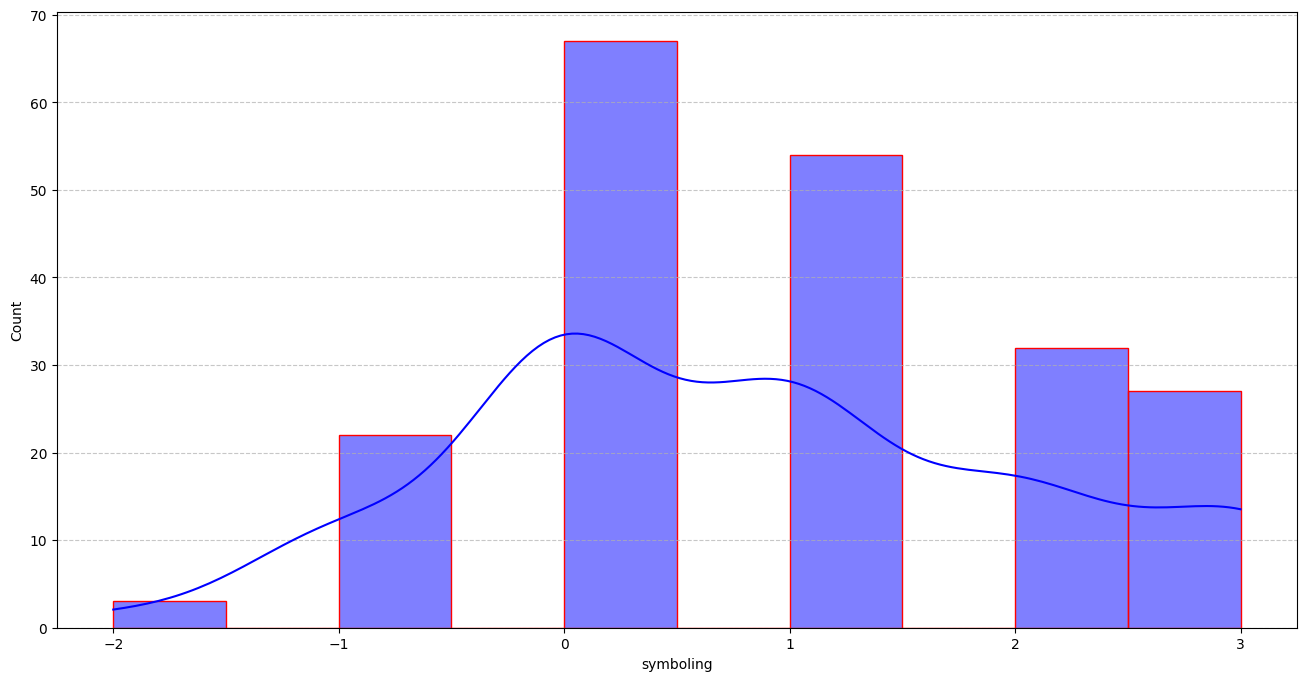

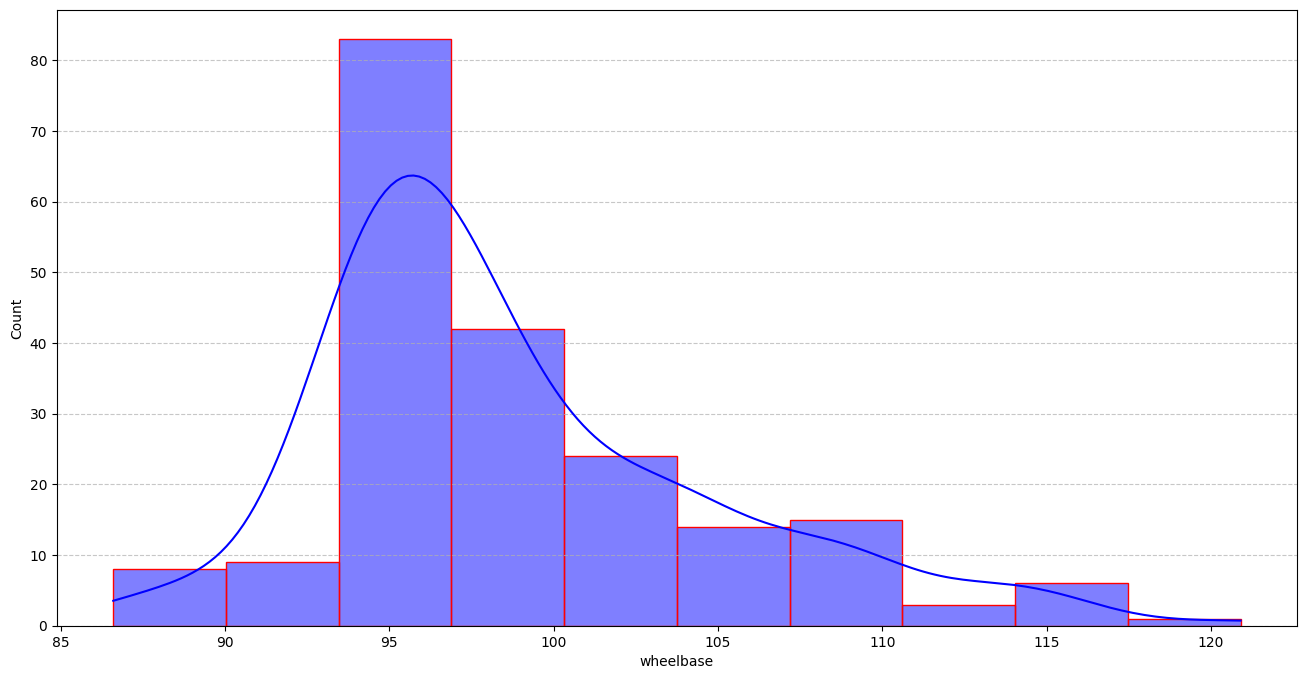

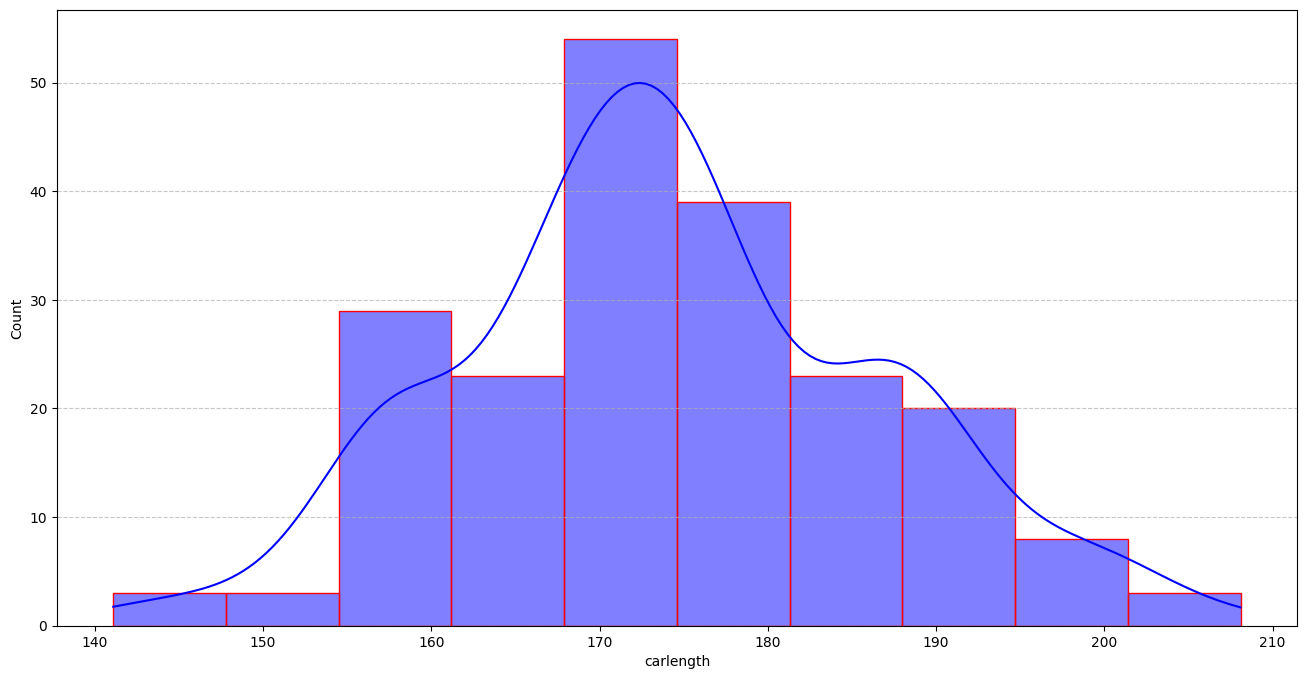

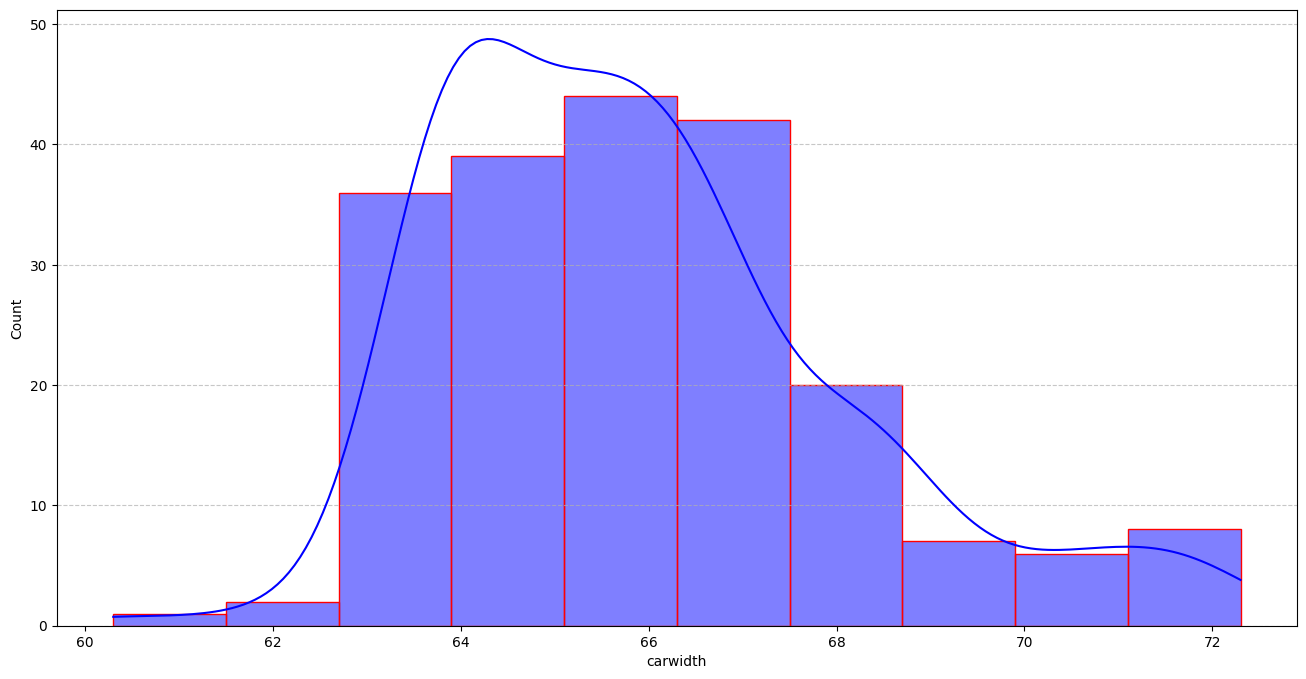

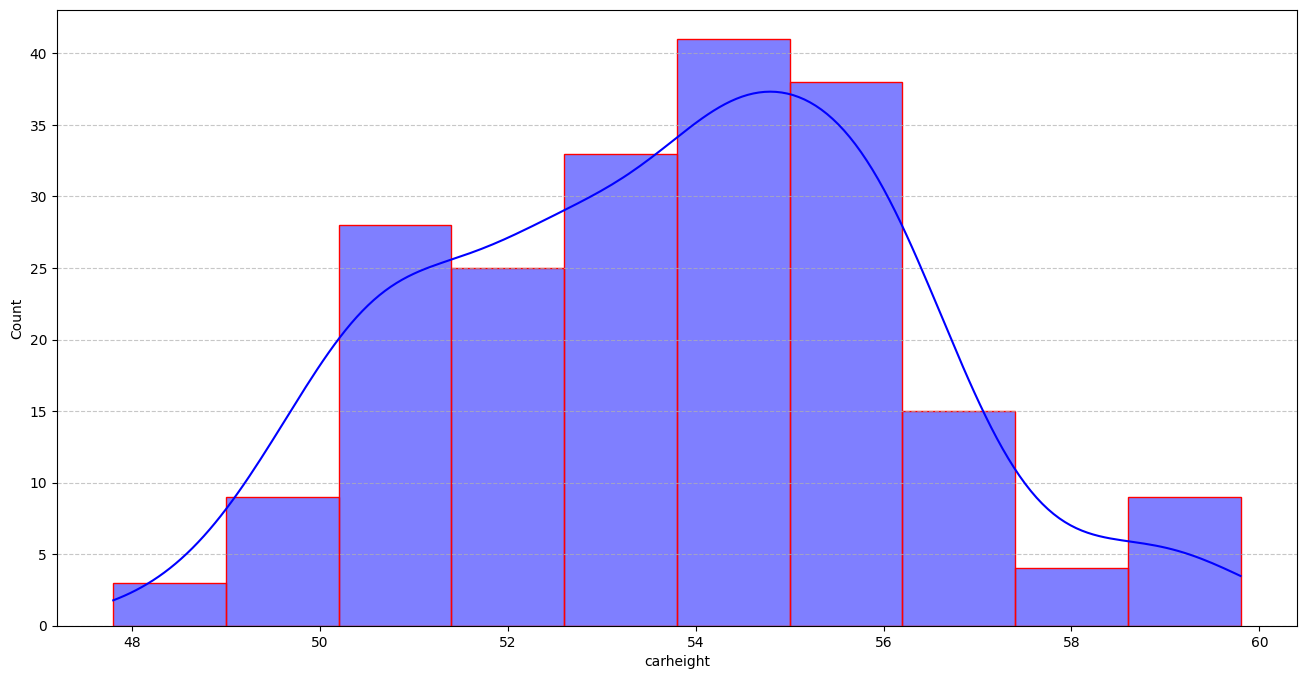

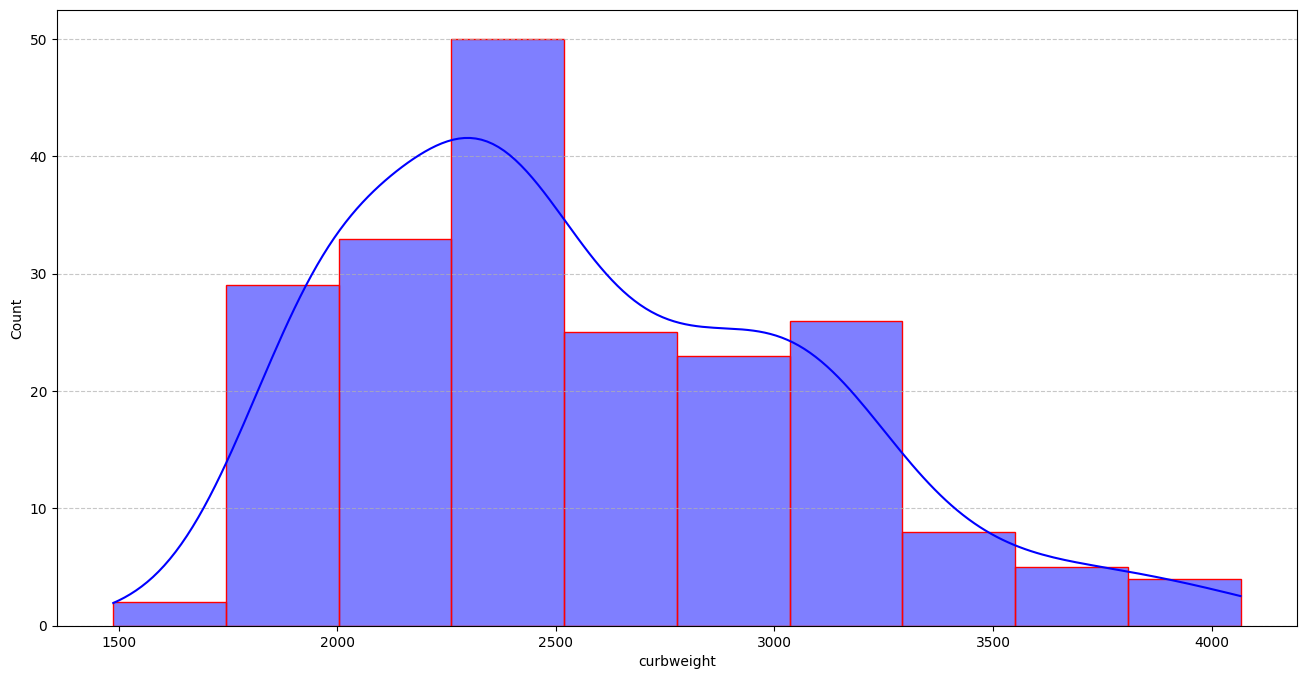

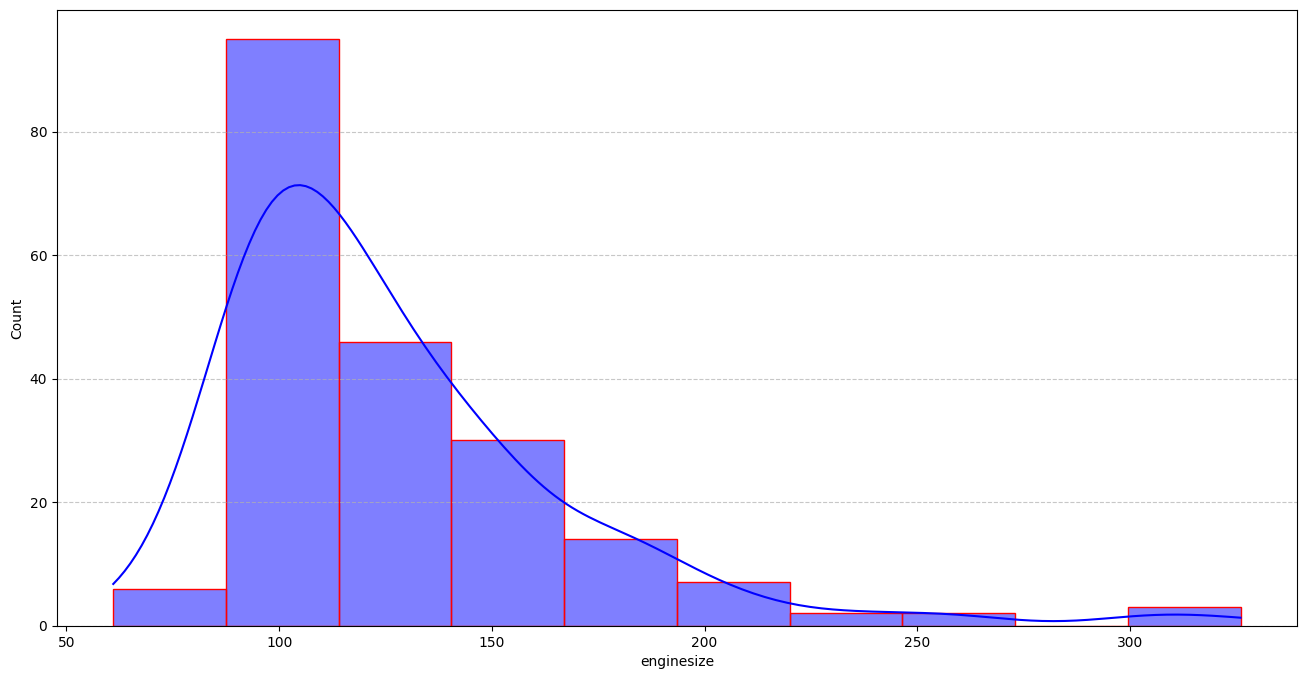

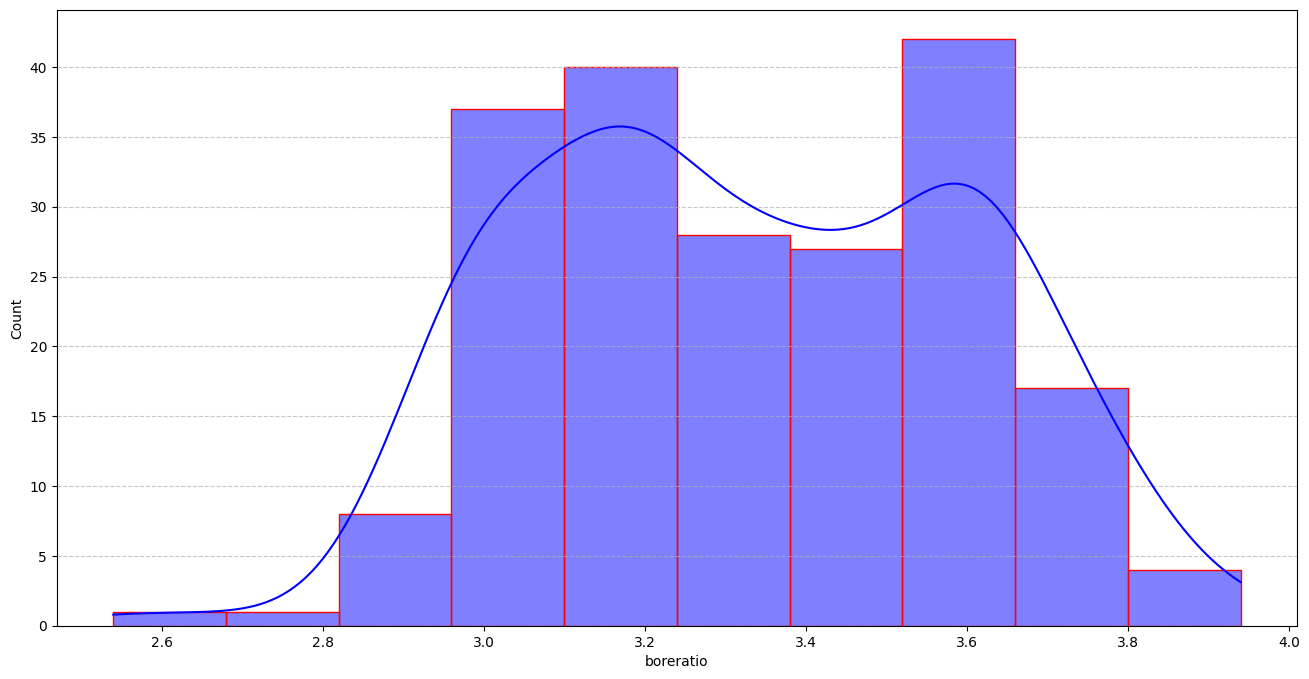

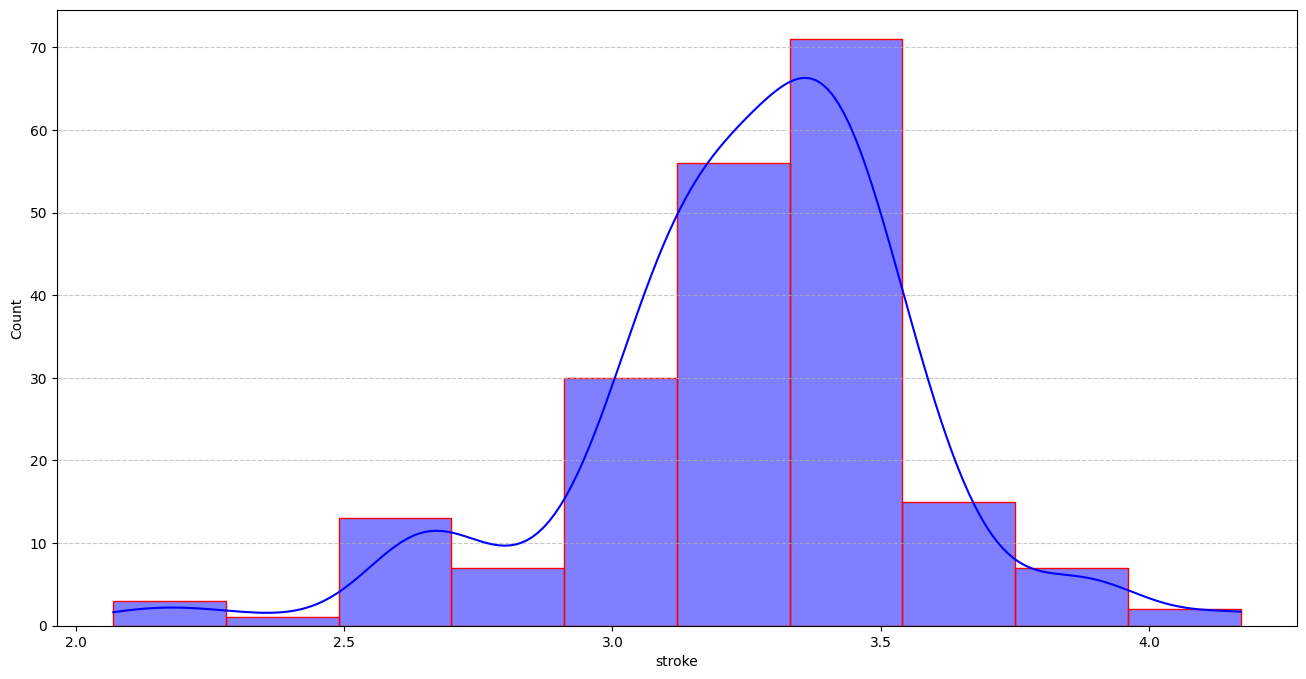

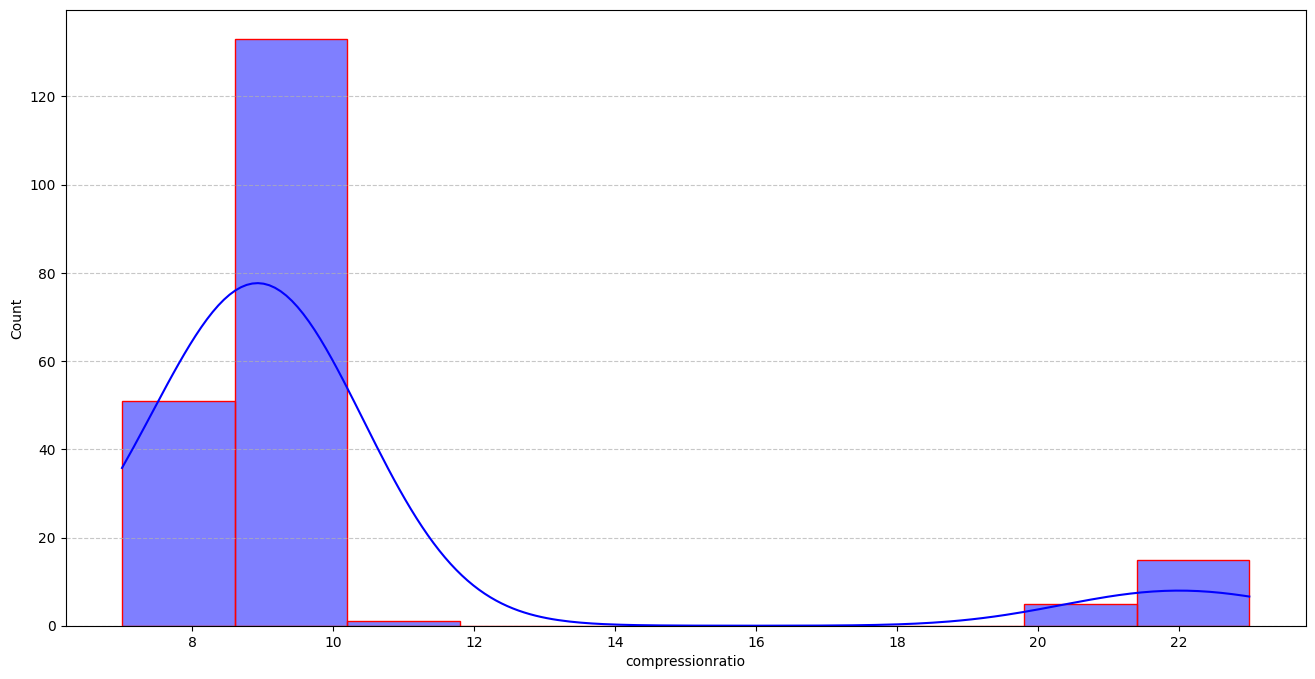

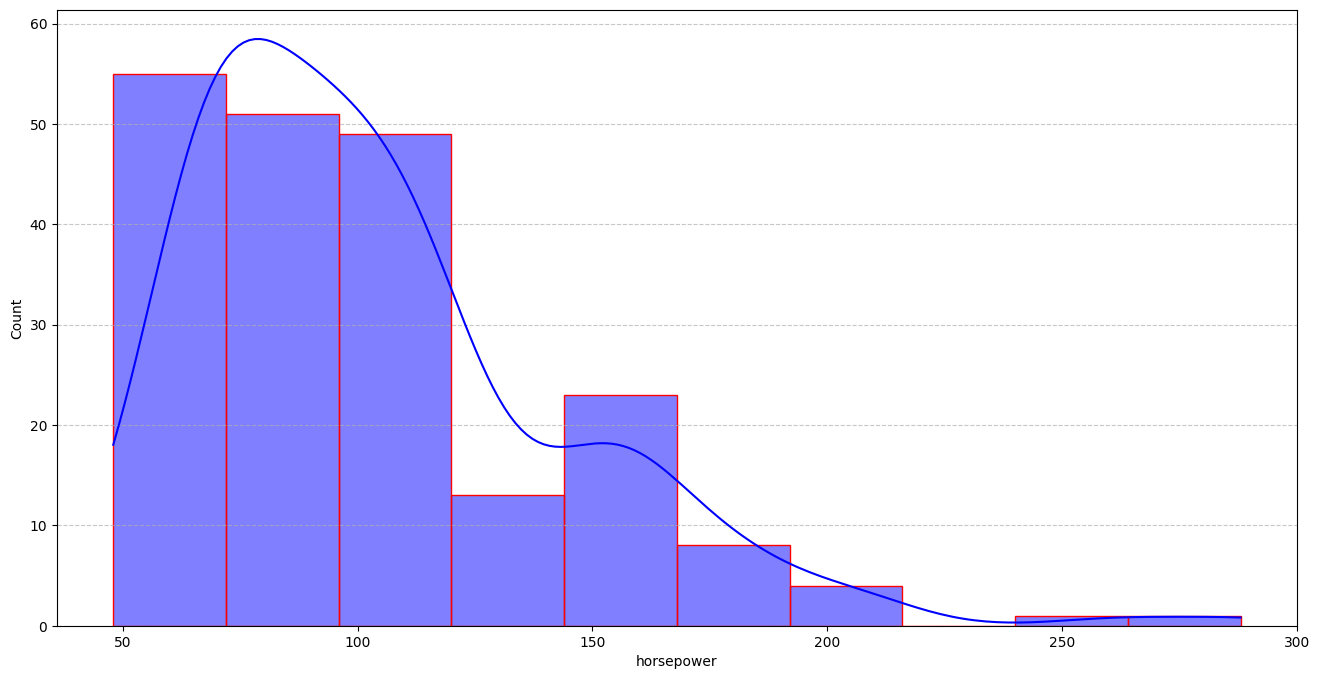

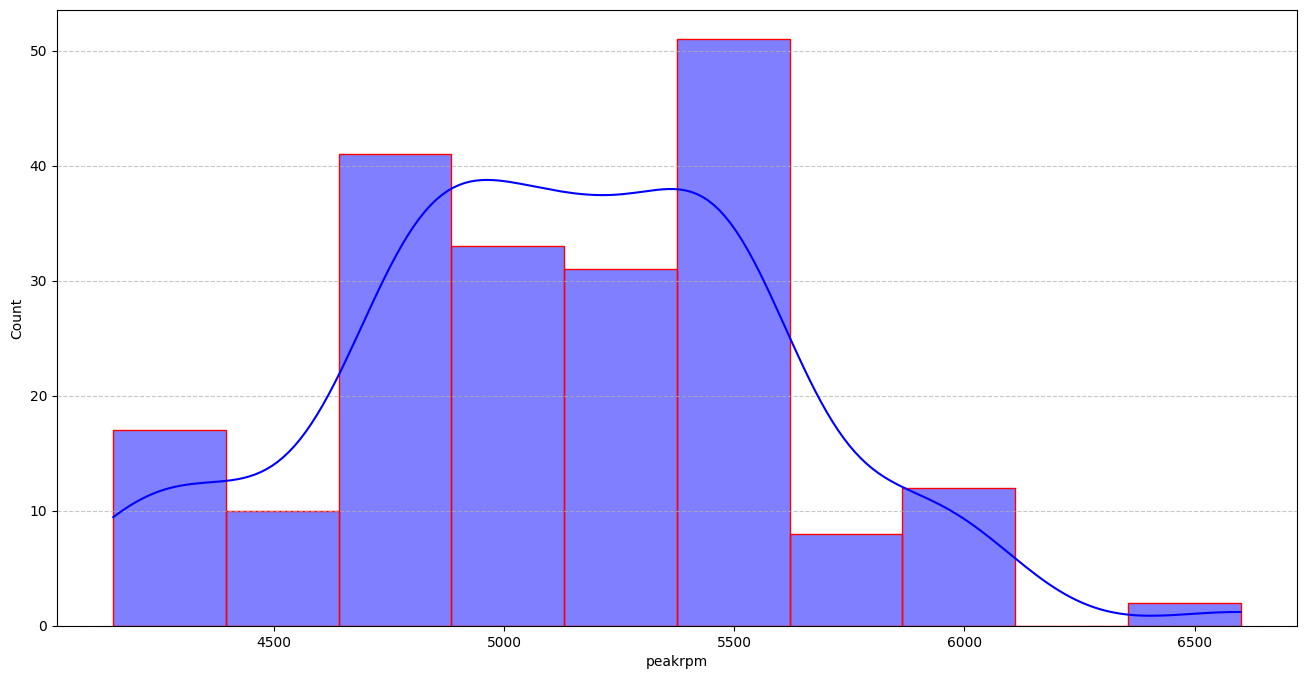

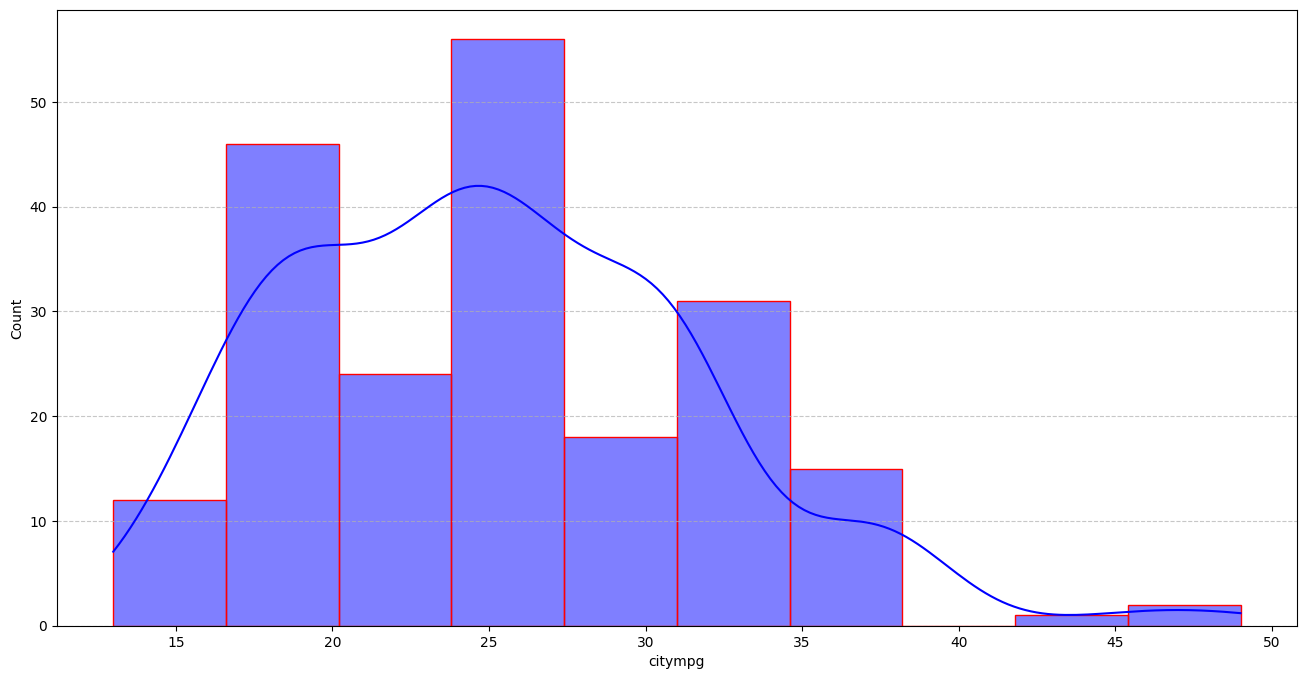

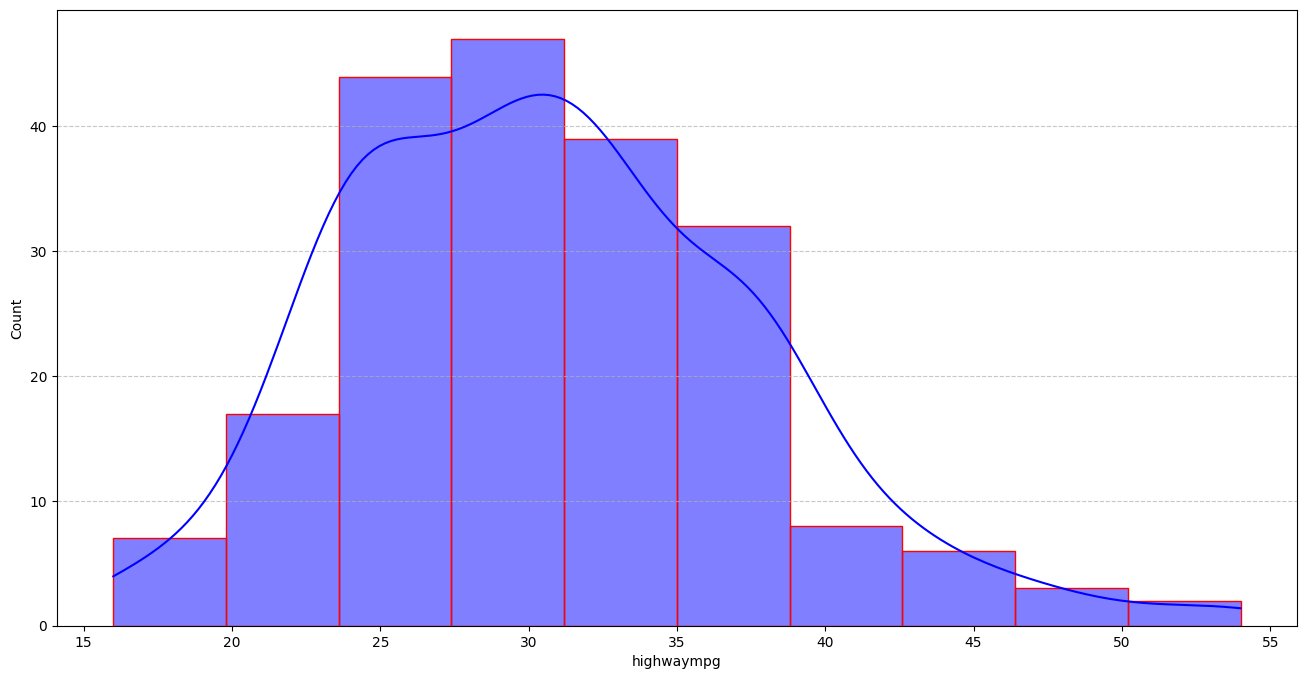

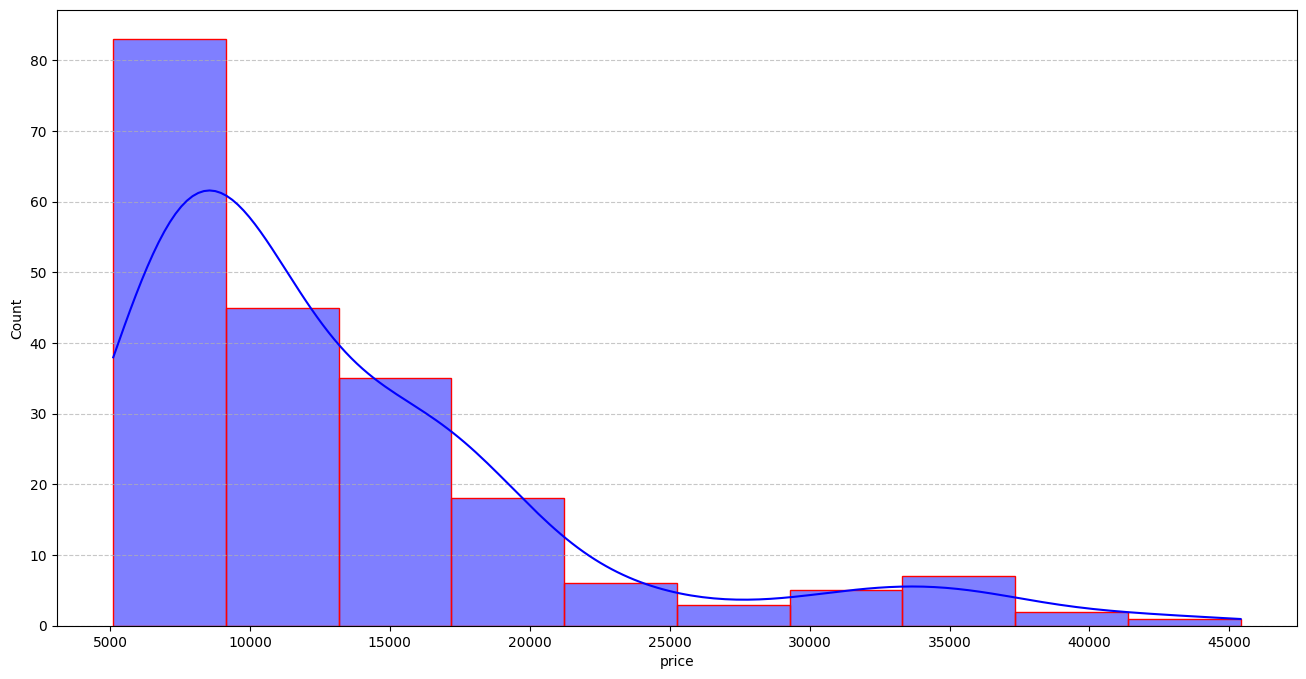

In [11]:
def histogram(column):
  sns.set_palette('mako')
  plt.figure(figsize=(16,8))
  sns.histplot(data=df[column],bins=10, kde=True, color='blue', edgecolor='red')
  plt.grid(axis='y', linestyle='--',alpha=0.7)
  plt.show()
for x in df.select_dtypes(include=['int64','float64']).columns.to_list()[1:]:
  histogram(x)

In [12]:
df.select_dtypes(include = ['float64', 'int64']).skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

> Our target variable and other variables are not normally distributed; we will later apply some statistical methods for transformation.

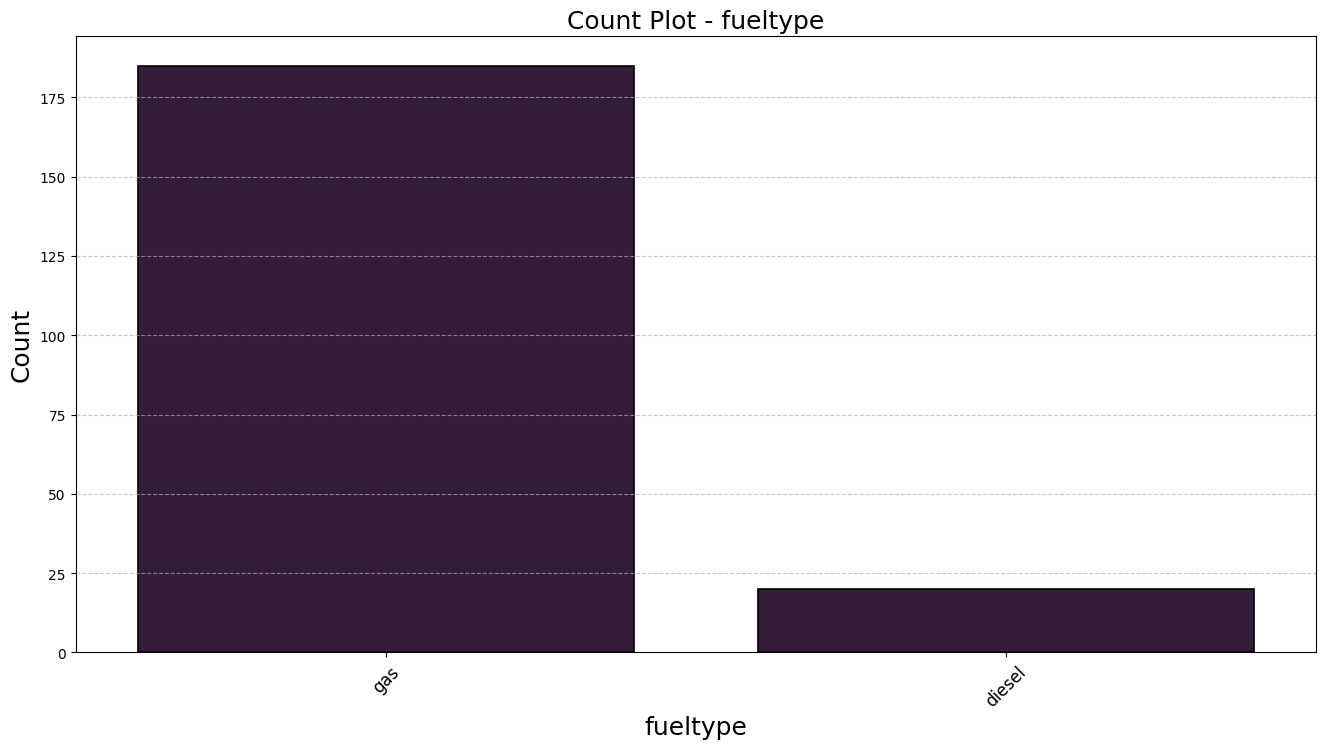

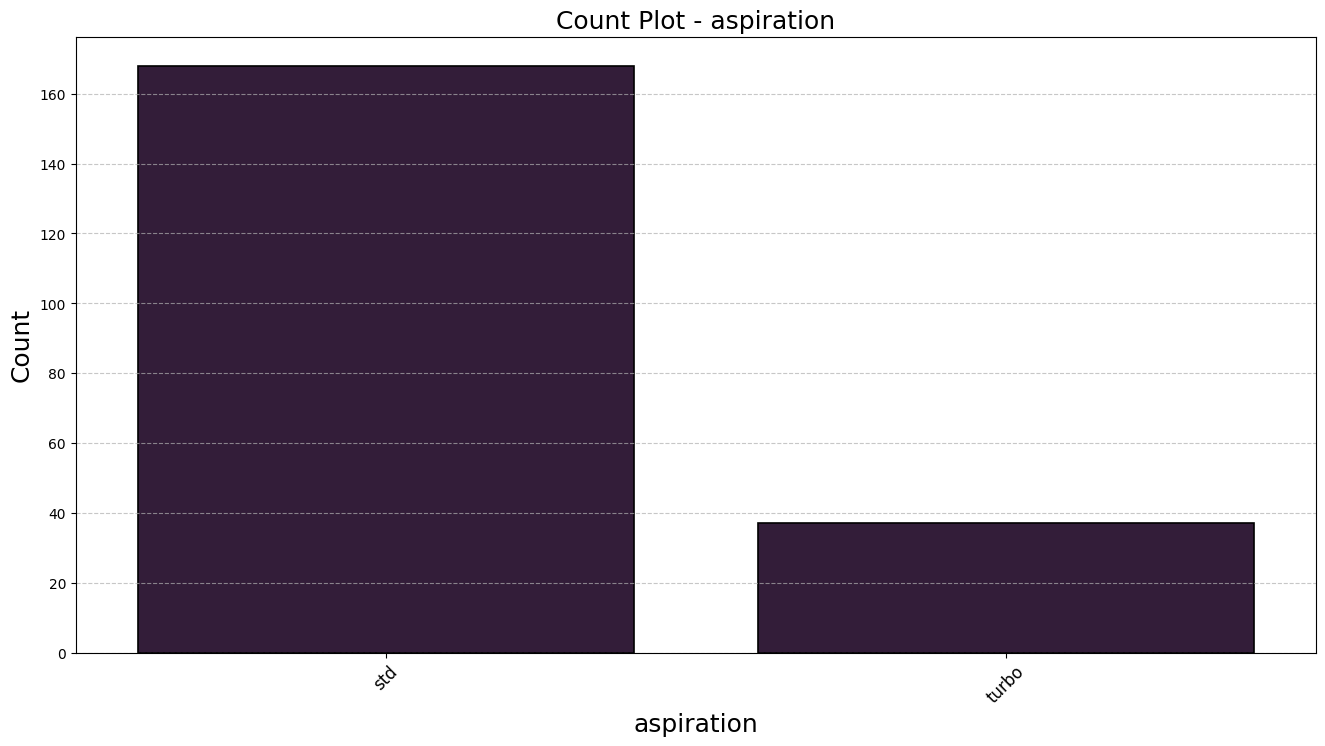

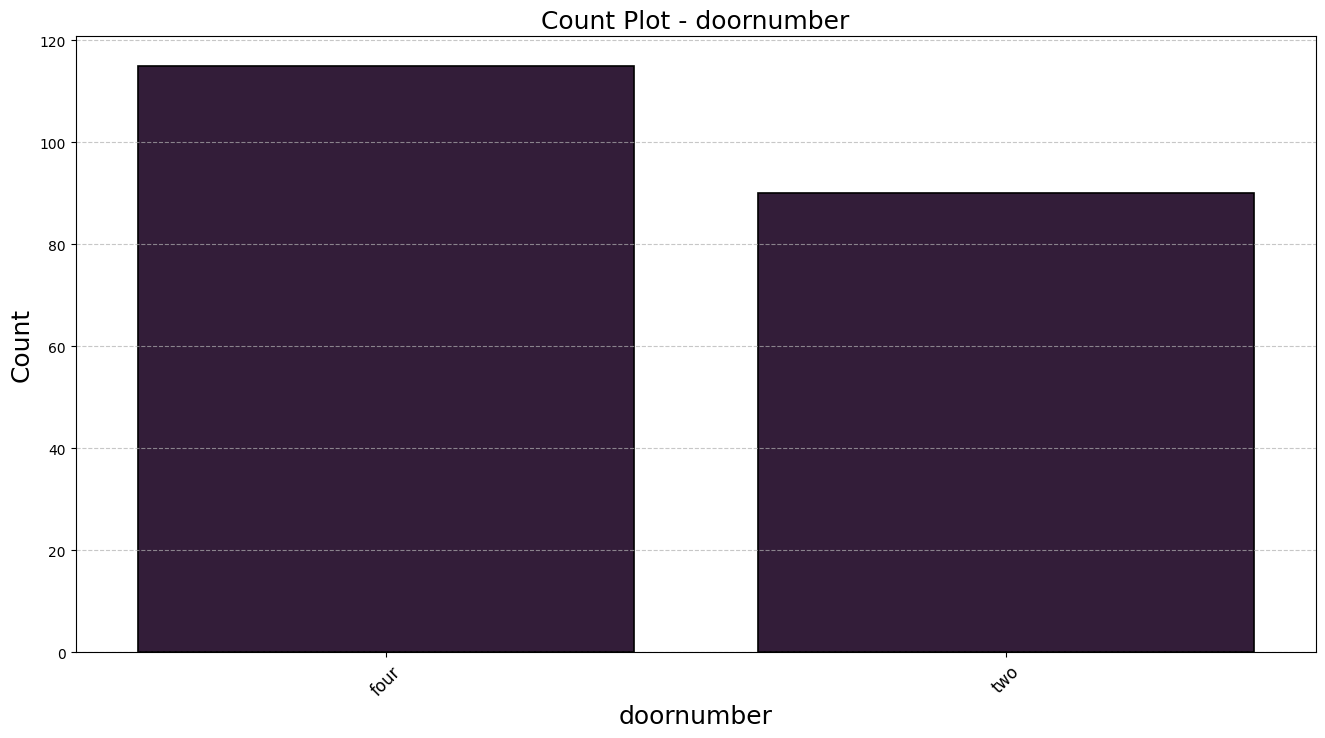

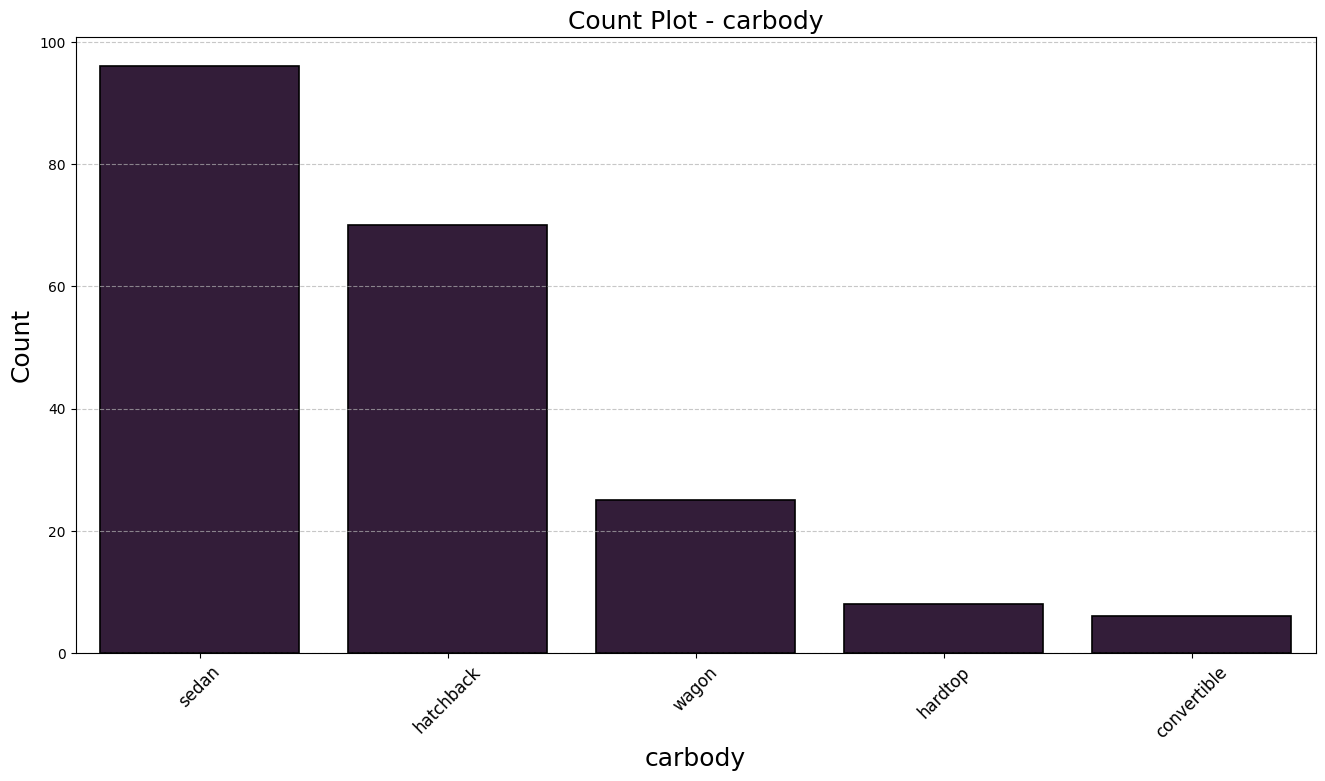

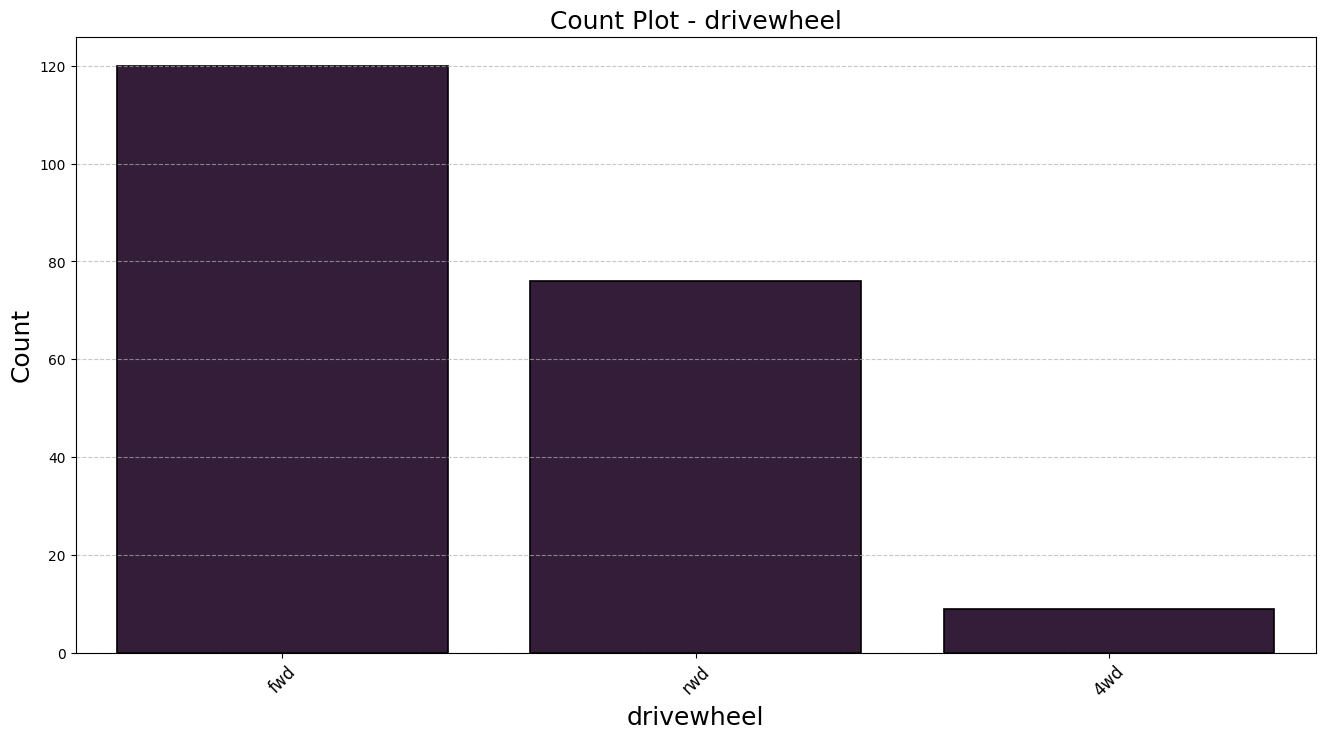

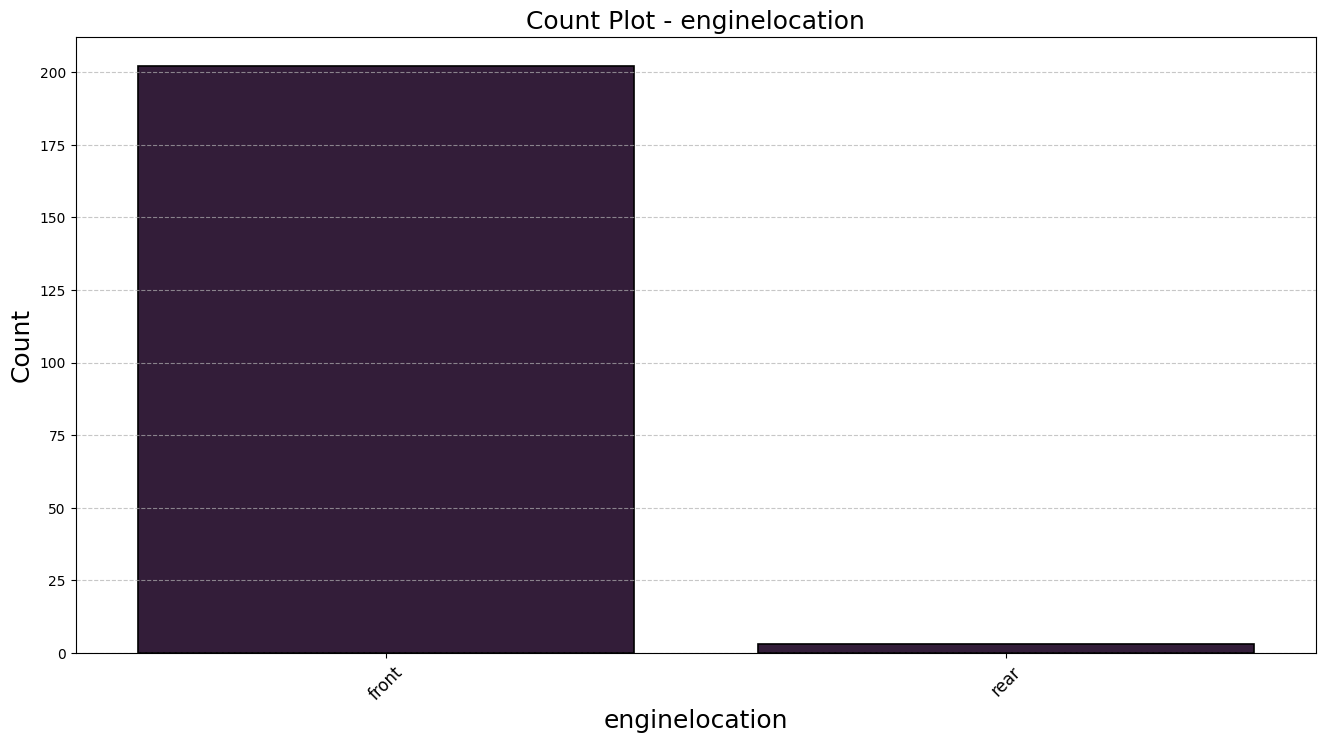

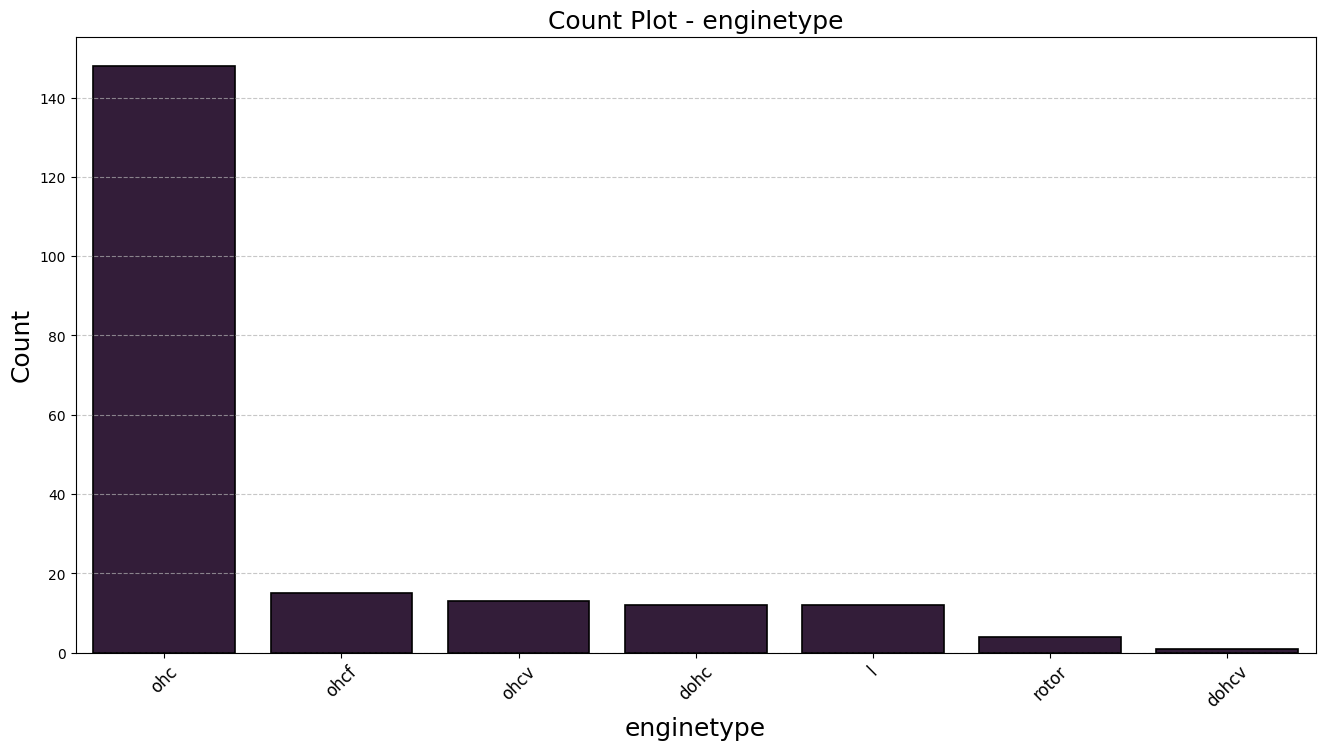

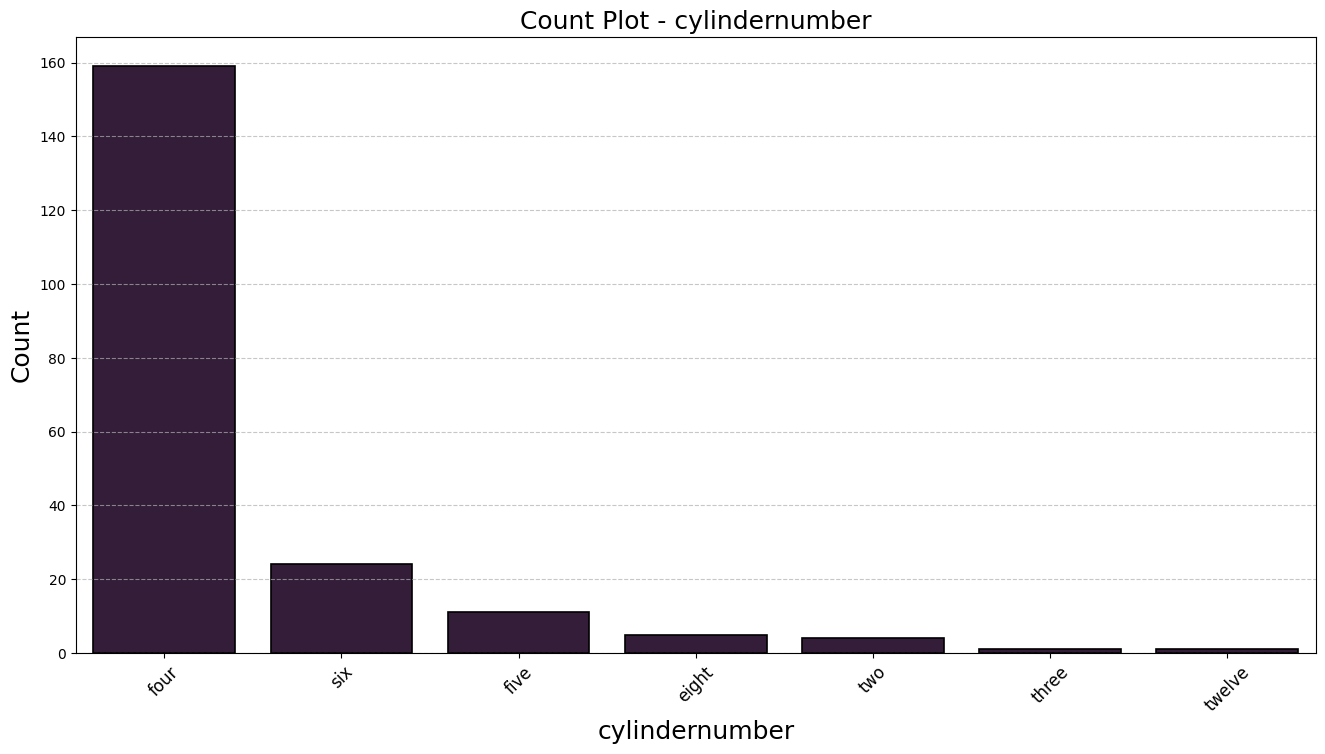

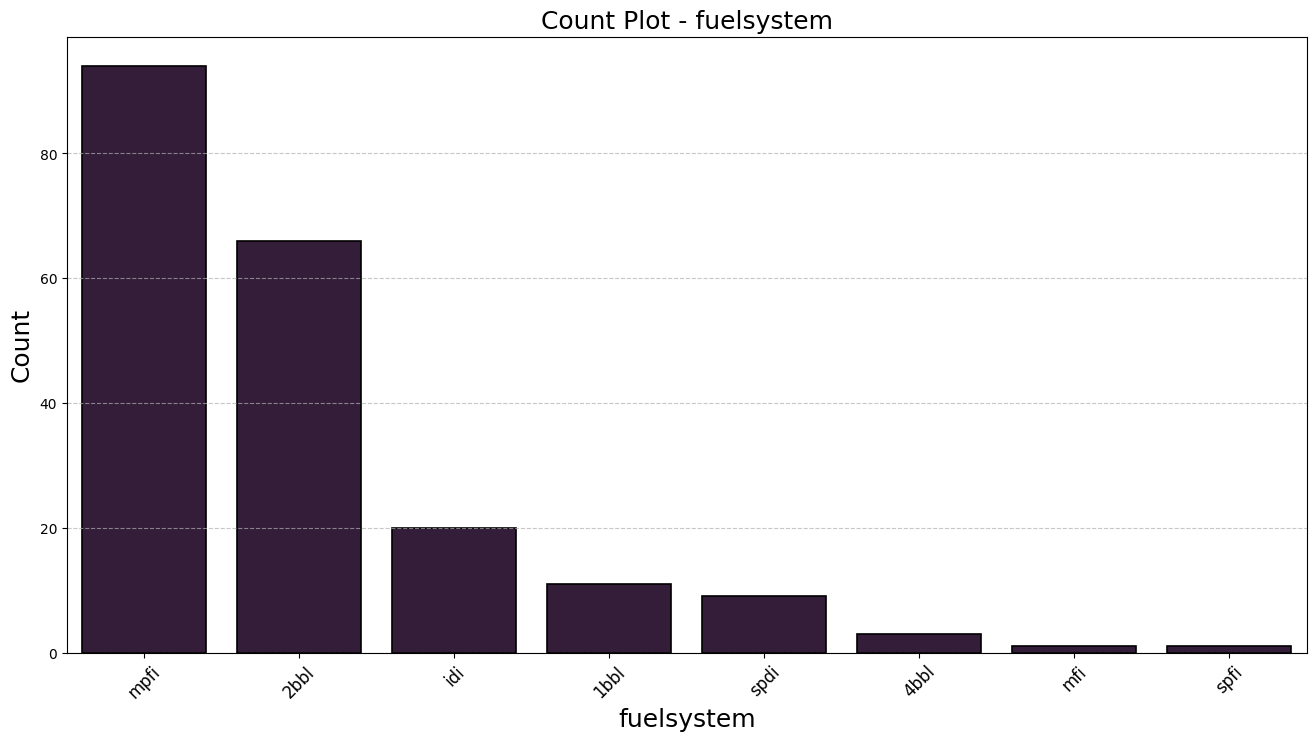

In [13]:
def count_plot(column):
  sns.set_palette('rocket')
  plt.figure(figsize=(16,8))
  sns.countplot(data=df,x=column, order=df[column].value_counts().index, edgecolor='black',linewidth=1.2)

  plt.title(f'Count Plot - {column}', fontsize=18)
  plt.xlabel(column,fontsize=18)
  plt.ylabel('Count',fontsize=18)

  plt.xticks(rotation=45, fontsize=12)
  plt.grid(axis='y',linestyle='--',alpha=0.7)
  plt.show()

for x in df.select_dtypes(include = ['object']).columns.to_list()[1:]:
    count_plot(x)

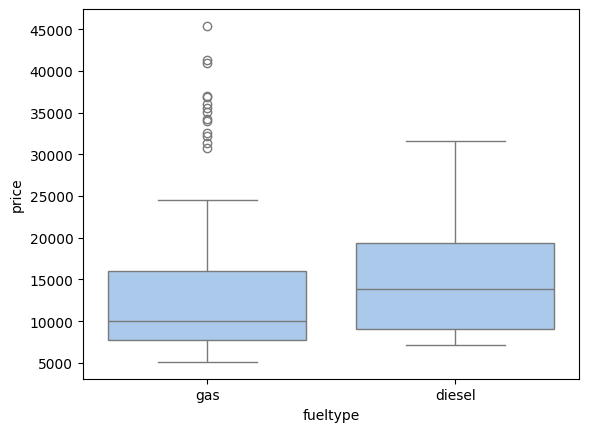

<Figure size 1600x800 with 0 Axes>

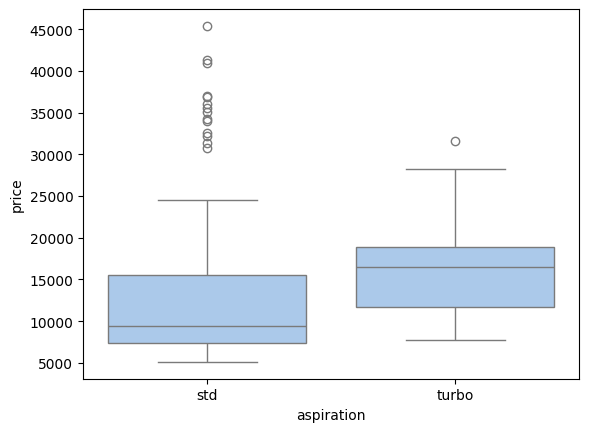

<Figure size 1600x800 with 0 Axes>

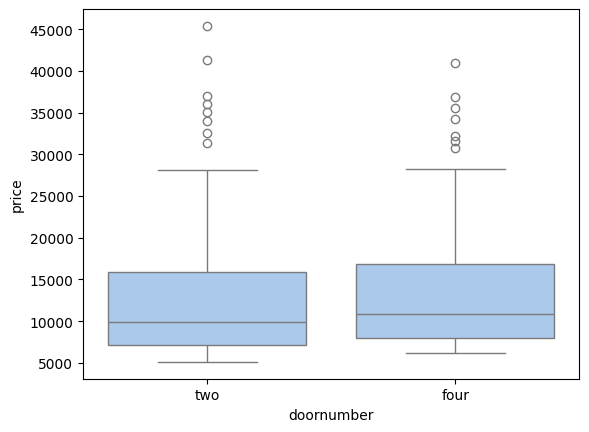

<Figure size 1600x800 with 0 Axes>

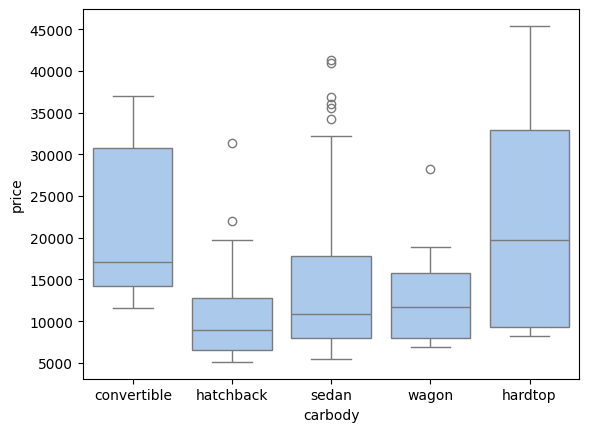

<Figure size 1600x800 with 0 Axes>

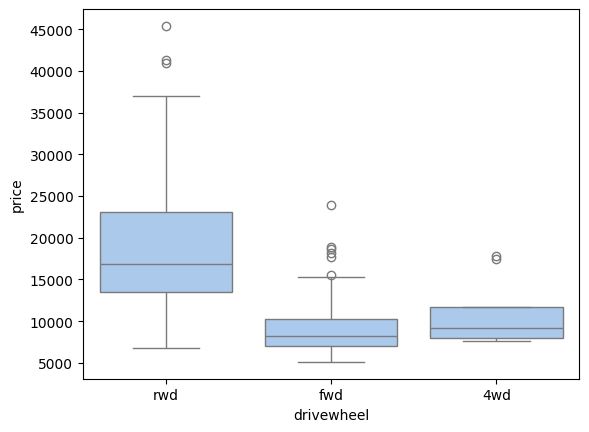

<Figure size 1600x800 with 0 Axes>

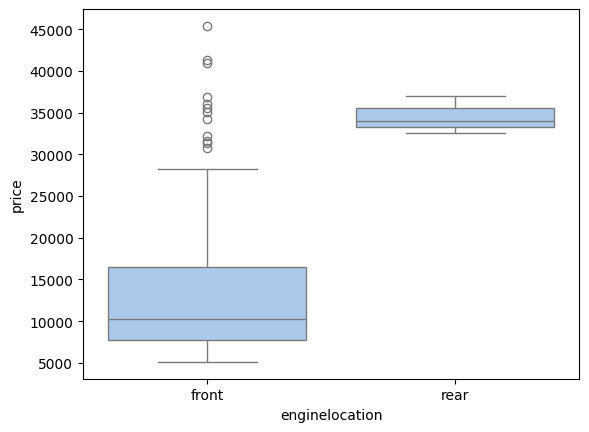

<Figure size 1600x800 with 0 Axes>

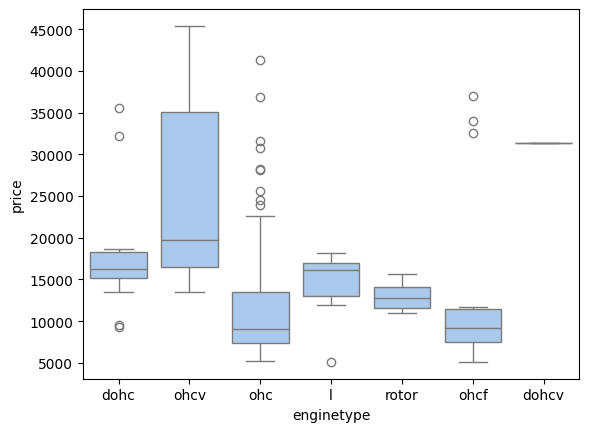

<Figure size 1600x800 with 0 Axes>

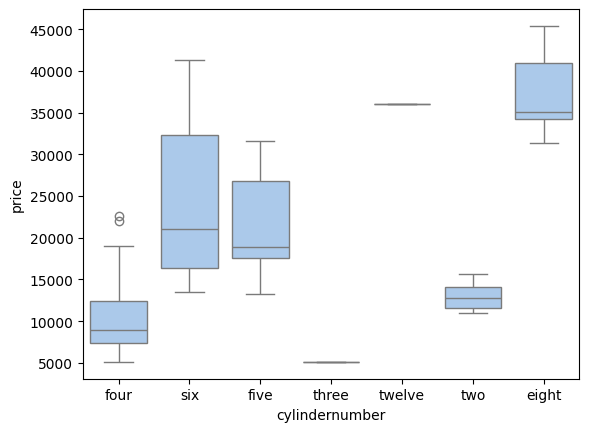

<Figure size 1600x800 with 0 Axes>

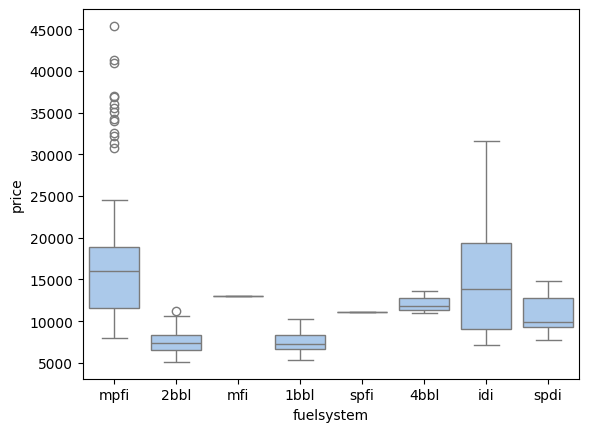

<Figure size 1600x800 with 0 Axes>

In [14]:
def box_plots(column):
    sns.set_palette('pastel')
    sns.boxplot(data = df, x = column, y = df['price'])
    plt.figure(figsize = (16,8))
    plt.show()

for x in df.select_dtypes(include = ['object']).columns.to_list()[1:]:
    box_plots(x)

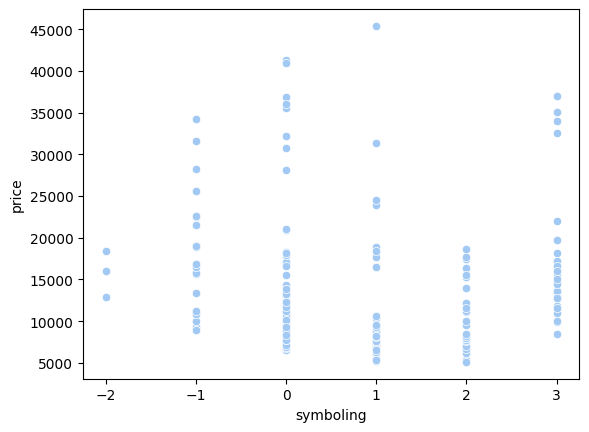

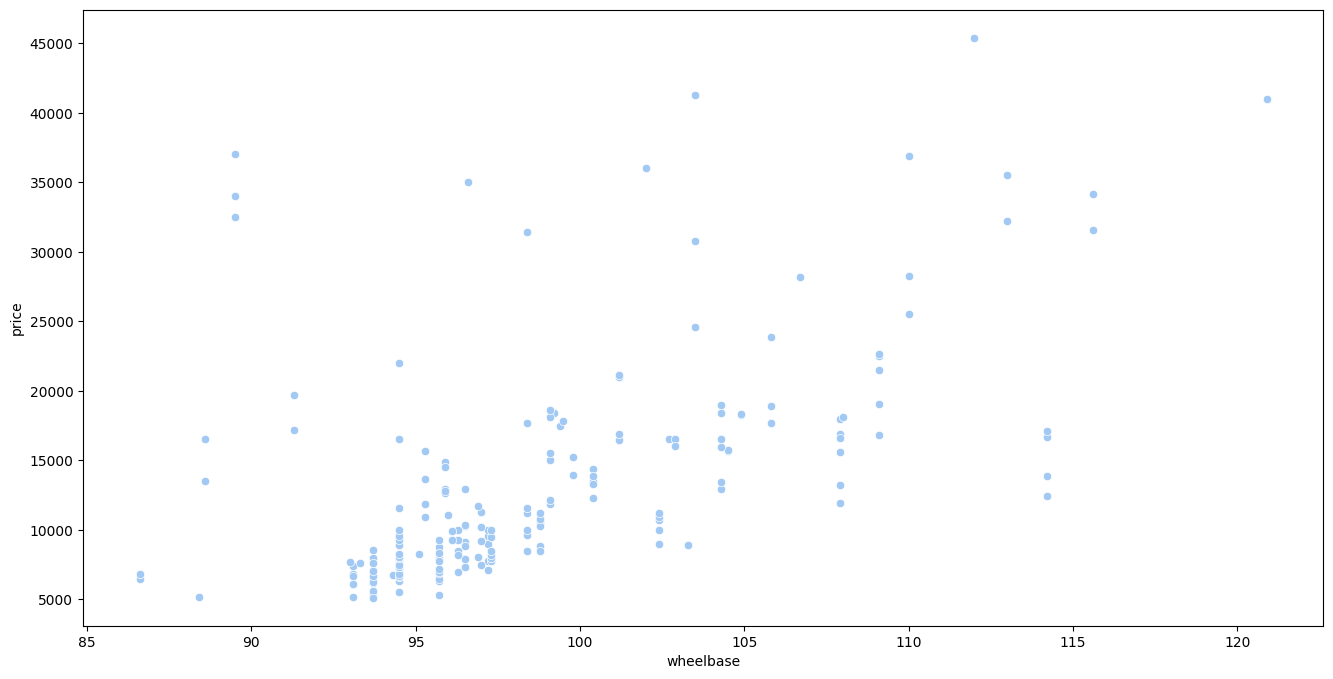

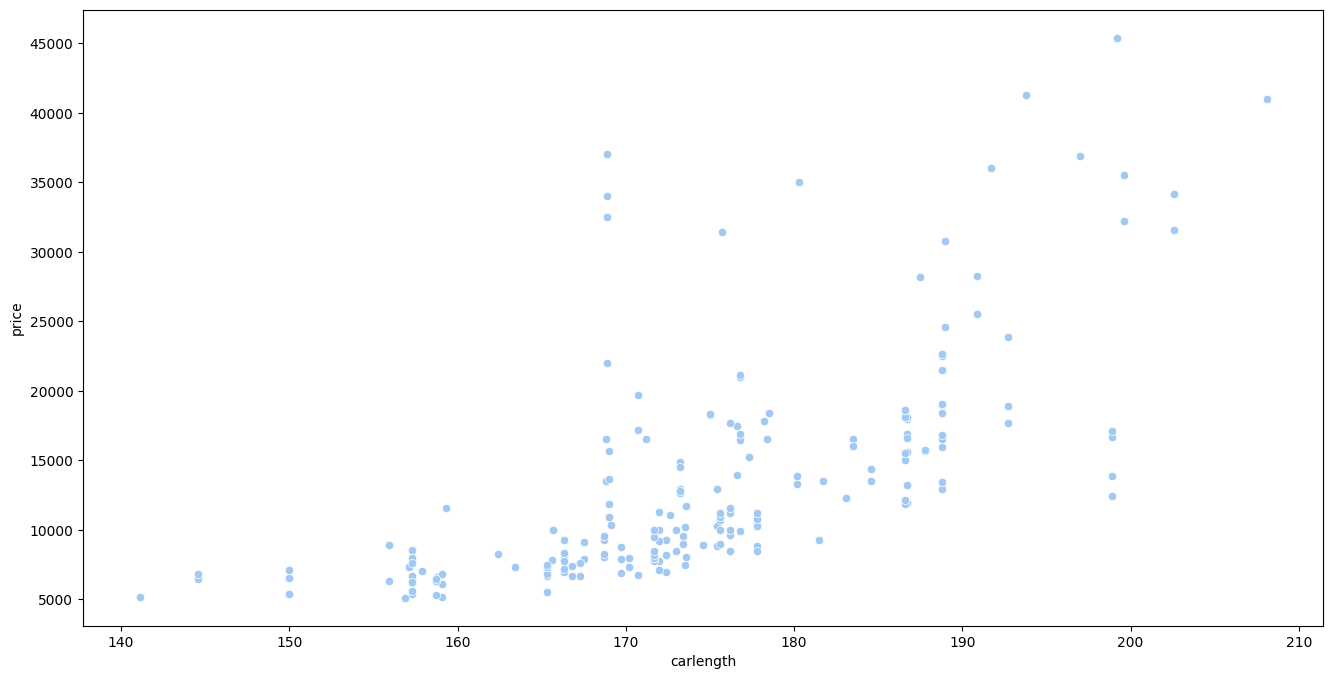

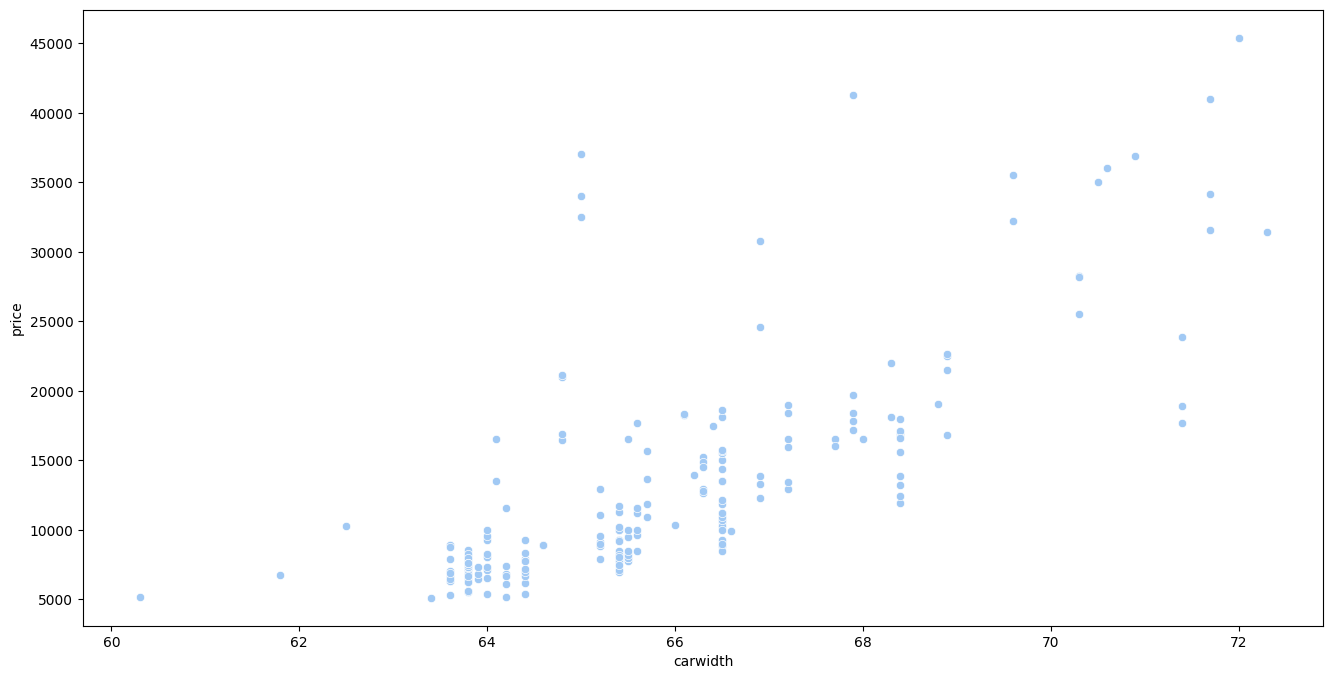

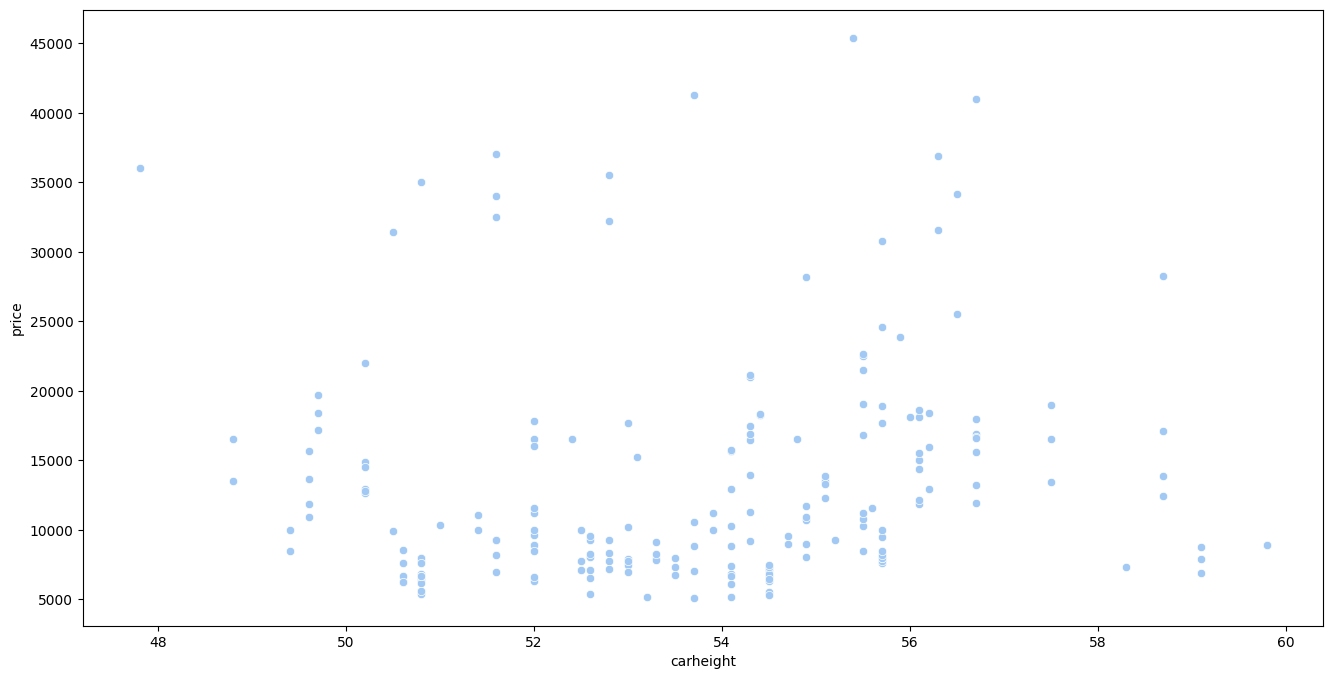

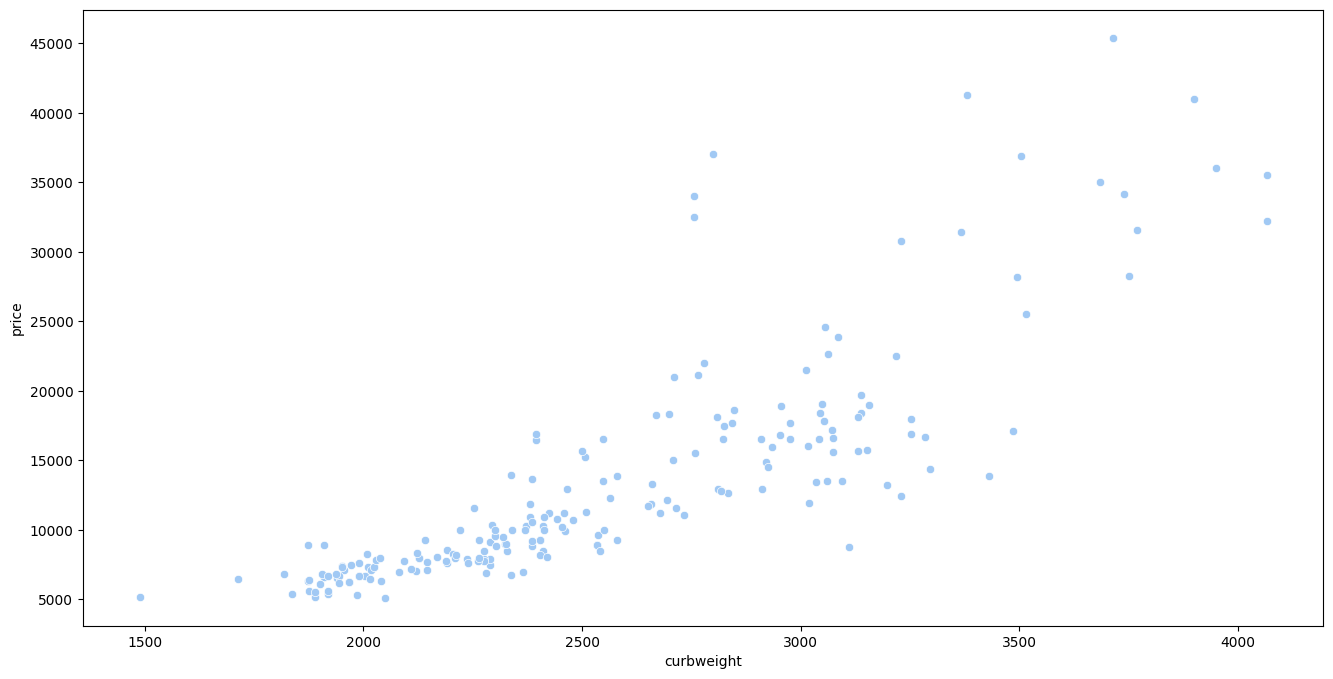

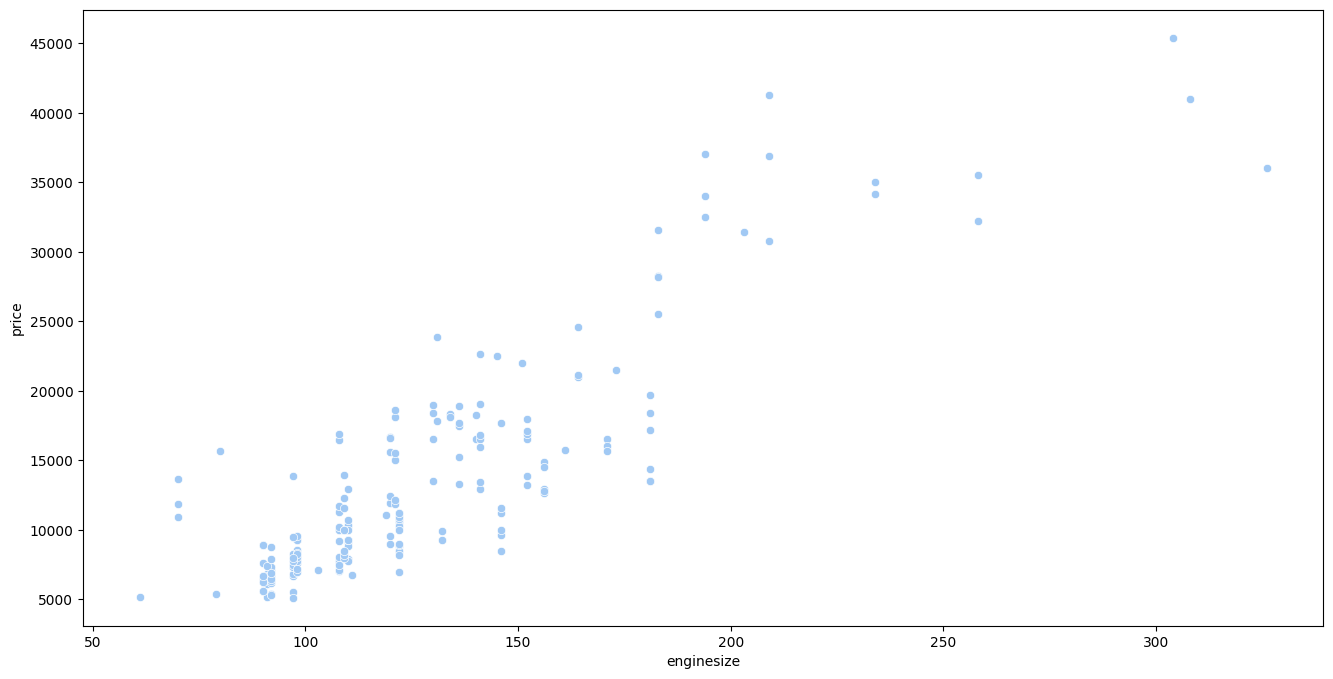

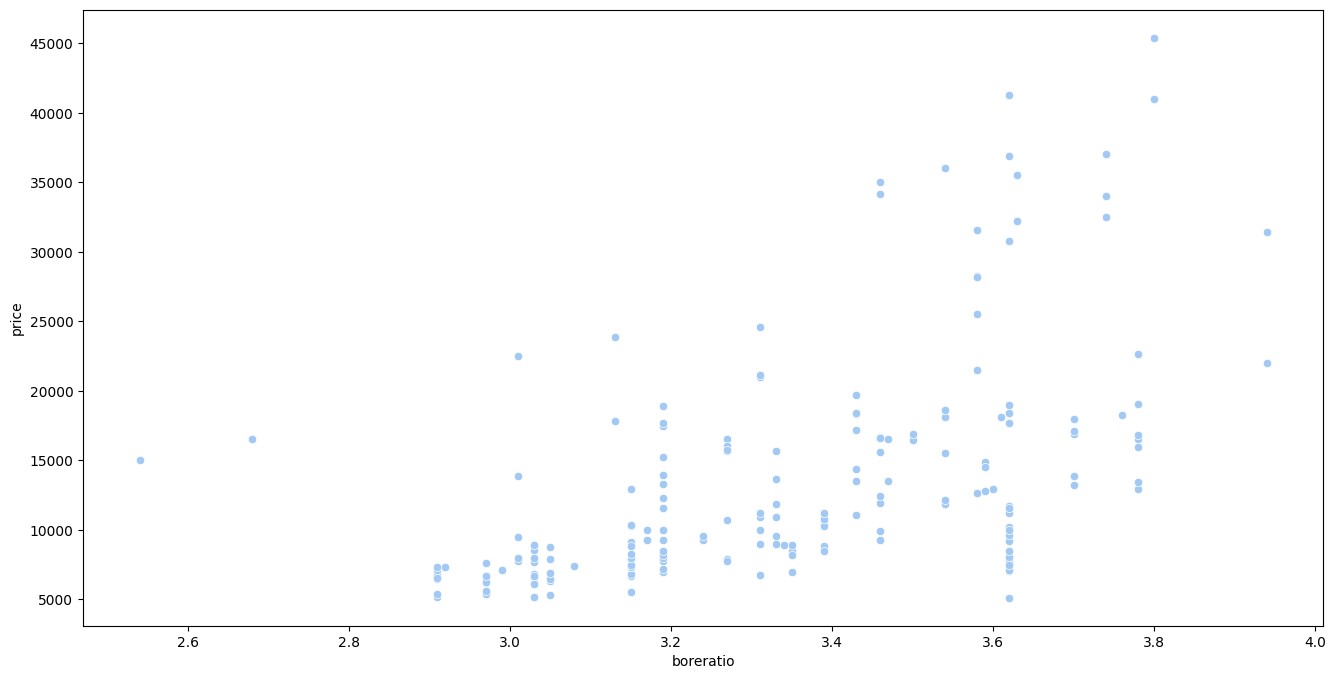

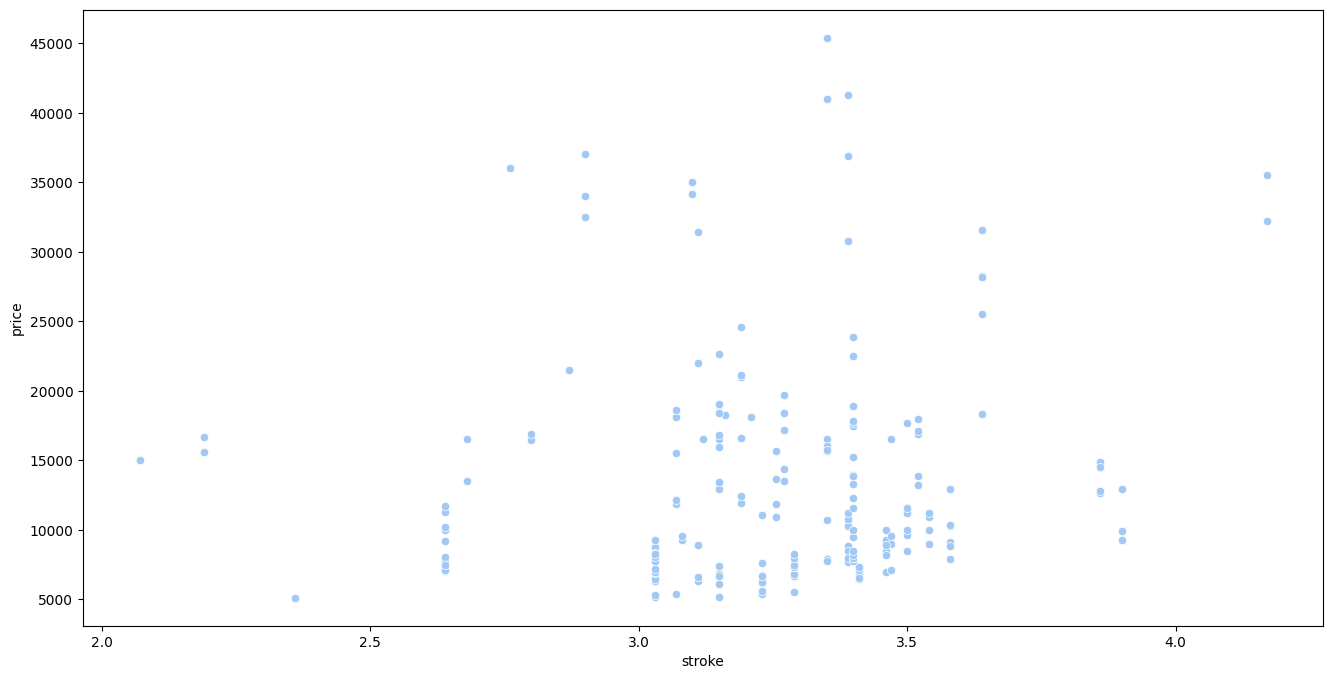

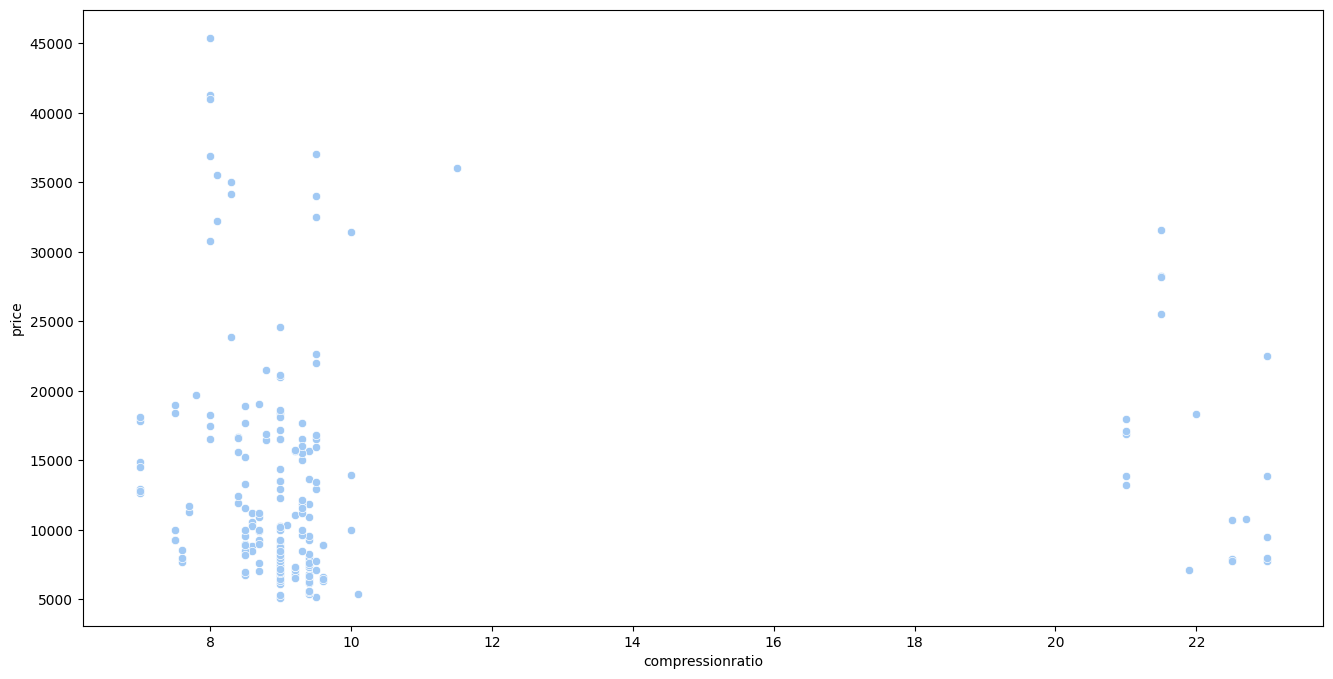

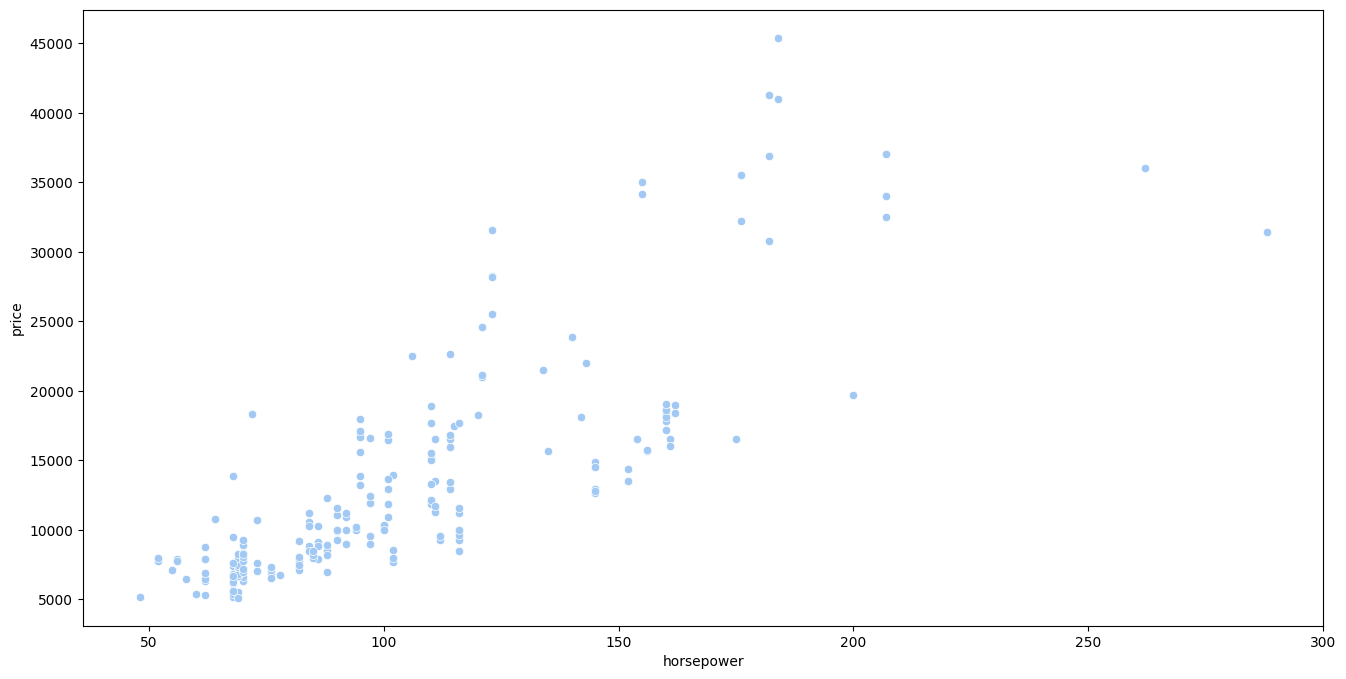

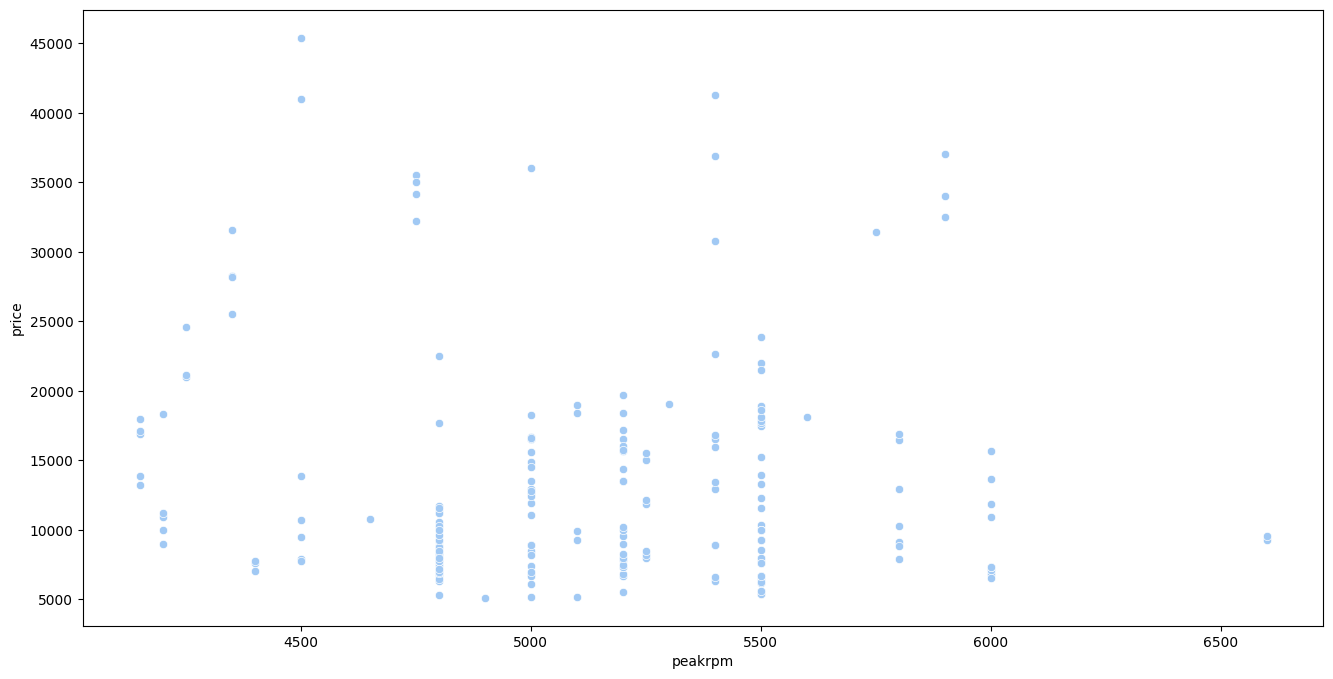

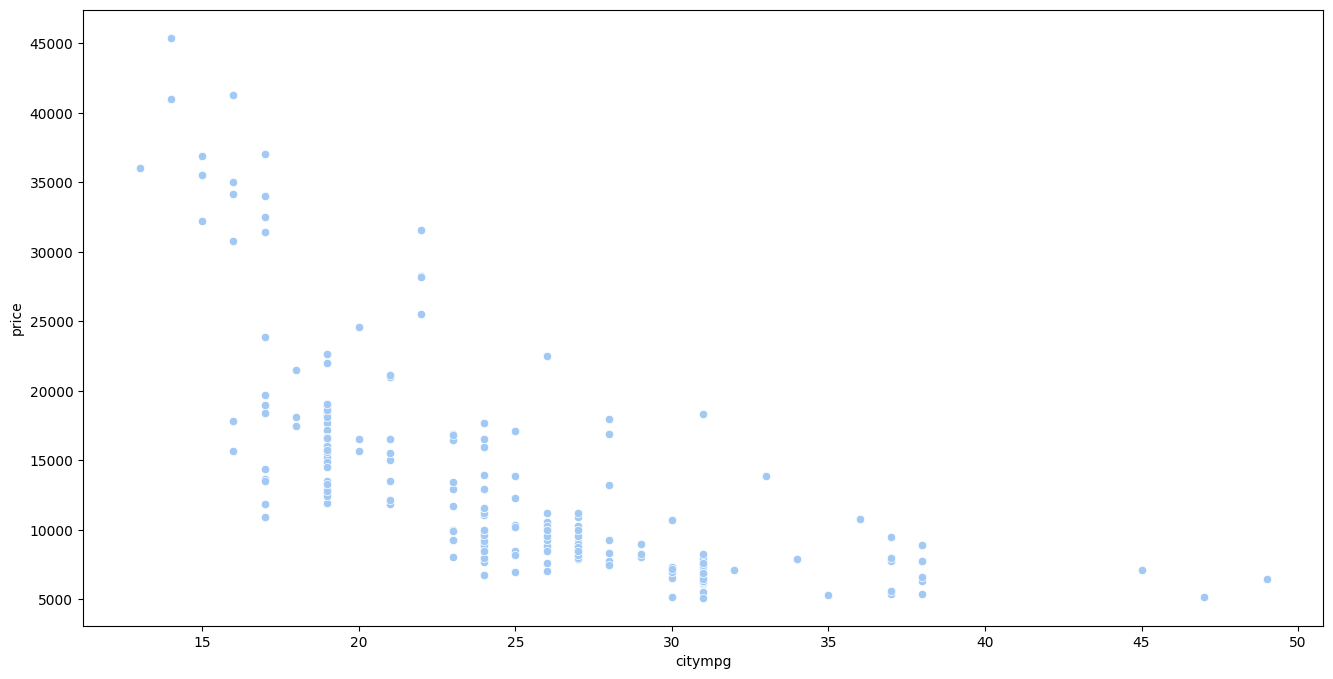

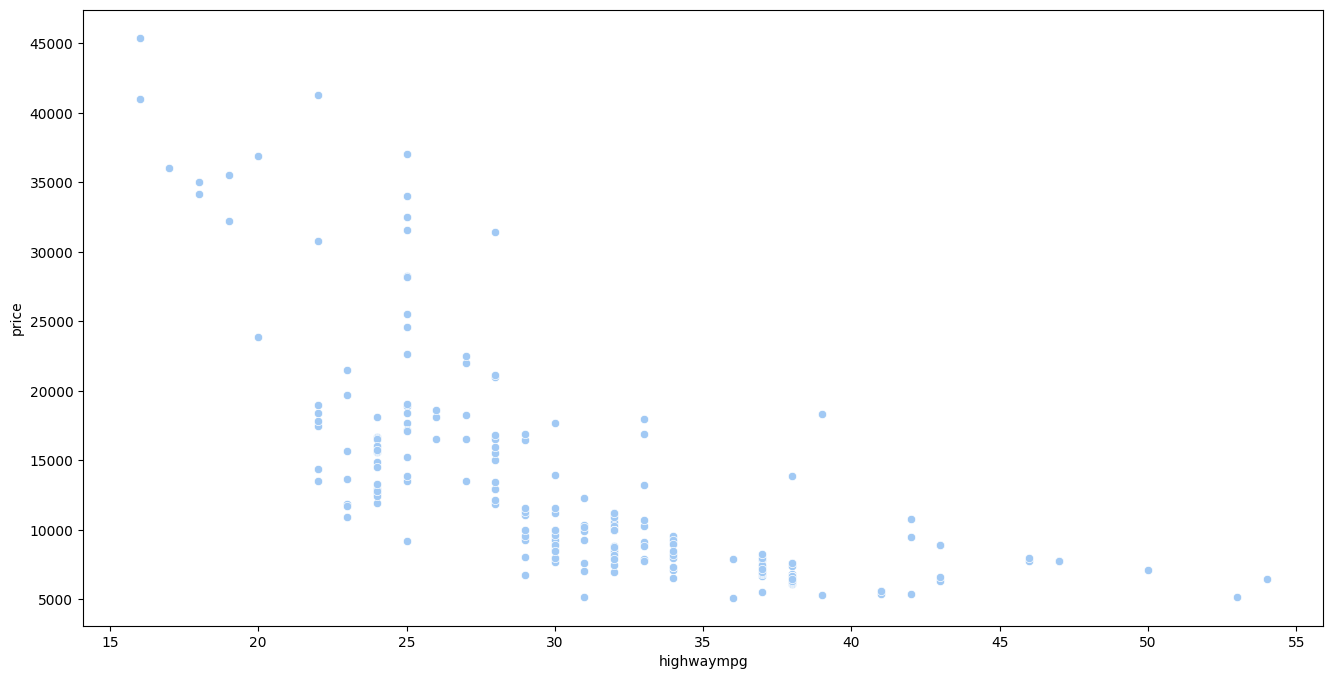

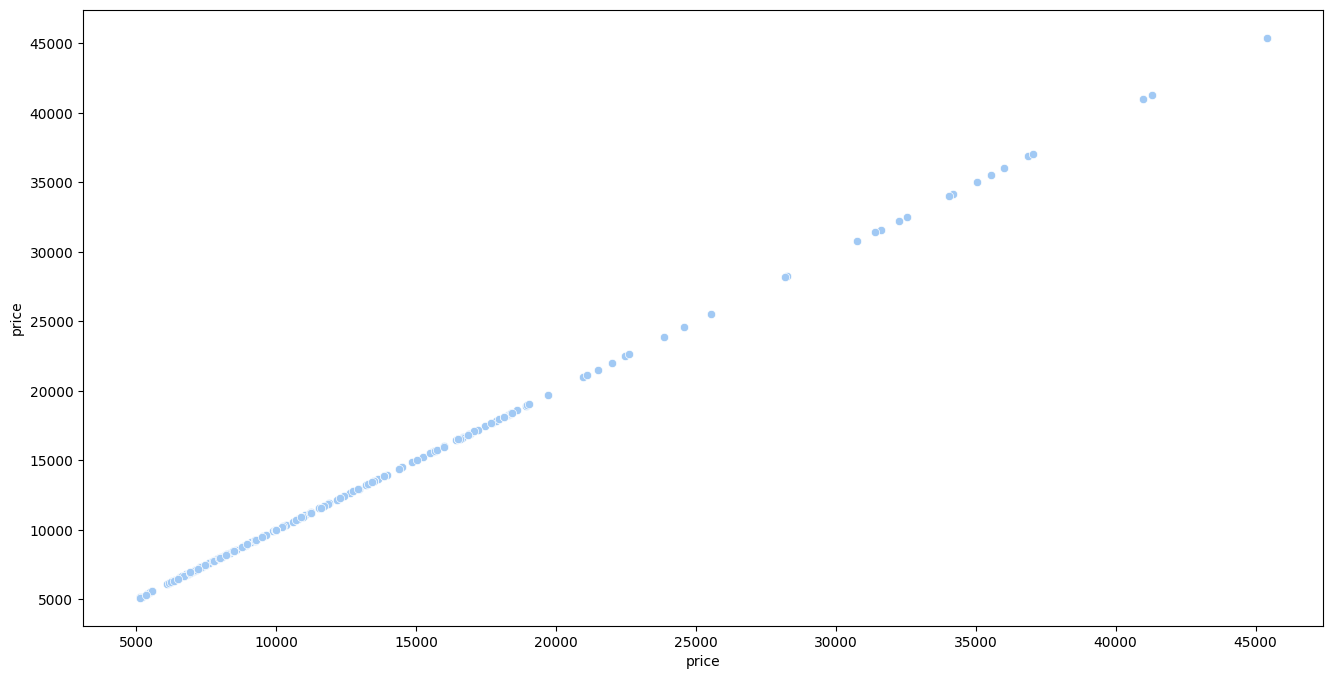

<Figure size 1600x800 with 0 Axes>

In [15]:
def scatter_plots(column):
    sns.scatterplot(data = df, x = column, y = 'price')
    plt.figure(figsize = (16,8))
    plt.show
for x in df.select_dtypes(include = ['float64', 'int64']).columns.to_list()[1:]:
    scatter_plots(x)

In [16]:
df['doornumber_num'] = df['doornumber']
df['doornumber_num'].replace('two', 0, inplace = True)
df['doornumber_num'].replace('four', 1, inplace = True)

df['fueltype_num'] = df['fueltype']
df['fueltype_num'].replace('gas', 0, inplace = True)
df['fueltype_num'].replace('diesel', 1, inplace = True)

df['aspiration_num'] = df['aspiration']
df['aspiration_num'].replace('std', 0, inplace = True)
df['aspiration_num'].replace('turbo', 1, inplace = True)

df['carbody_num'] = df['carbody']
df['carbody_num'].replace('sedan', 0, inplace = True)
df['carbody_num'].replace('hatchback', 1, inplace = True)
df['carbody_num'].replace('wagon', 2, inplace = True)
df['carbody_num'].replace('hardtop', 3, inplace = True)
df['carbody_num'].replace('convertible', 4, inplace = True)

df['drivewheel_num'] = df['drivewheel']
df['drivewheel_num'].replace('fwd', 0, inplace = True)
df['drivewheel_num'].replace('rwd', 1, inplace = True)
df['drivewheel_num'].replace('4wd', 2, inplace = True)

df['enginelocation_num'] = df['enginelocation']
df['enginelocation_num'].replace('front', 0, inplace = True)
df['enginelocation_num'].replace('rear', 1, inplace = True)

df['fuelsystem_num'] = df['fuelsystem']
df['fuelsystem_num'].replace('mpfi', 0, inplace = True)
df['fuelsystem_num'].replace('2bbl', 1, inplace = True)
df['fuelsystem_num'].replace('idi', 2, inplace = True)
df['fuelsystem_num'].replace('1bbl', 3, inplace = True)
df['fuelsystem_num'].replace('spdi', 4, inplace = True)
df['fuelsystem_num'].replace('4bbl', 5, inplace = True)
df['fuelsystem_num'].replace('mfi', 6, inplace = True)
df['fuelsystem_num'].replace('spfi', 7, inplace = True)

df['enginetype_num'] = df['enginetype']
df['enginetype_num'].replace('ohc', 0, inplace = True)
df['enginetype_num'].replace('ohcf', 1, inplace = True)
df['enginetype_num'].replace('ohcv', 2, inplace = True)
df['enginetype_num'].replace('dohc', 3, inplace = True)
df['enginetype_num'].replace('l', 4, inplace = True)
df['enginetype_num'].replace('rotor', 5, inplace = True)
df['enginetype_num'].replace('dohcv', 6, inplace = True)

df['cylindernumber_num'] = df['cylindernumber']
df['cylindernumber_num'].replace('four', 0, inplace = True)
df['cylindernumber_num'].replace('six', 1, inplace = True)
df['cylindernumber_num'].replace('five', 2, inplace = True)
df['cylindernumber_num'].replace('eight', 3, inplace = True)
df['cylindernumber_num'].replace('two', 4, inplace = True)
df['cylindernumber_num'].replace('three', 5, inplace = True)
df['cylindernumber_num'].replace('twelve', 6, inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_ID              205 non-null    int64  
 1   symboling           205 non-null    int64  
 2   CarName             205 non-null    object 
 3   fueltype            205 non-null    object 
 4   aspiration          205 non-null    object 
 5   doornumber          205 non-null    object 
 6   carbody             205 non-null    object 
 7   drivewheel          205 non-null    object 
 8   enginelocation      205 non-null    object 
 9   wheelbase           205 non-null    float64
 10  carlength           205 non-null    float64
 11  carwidth            205 non-null    float64
 12  carheight           205 non-null    float64
 13  curbweight          205 non-null    int64  
 14  enginetype          205 non-null    object 
 15  cylindernumber      205 non-null    object 
 16  enginesi

In [18]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [19]:
def clean_carname(car_name):
  return car_name.split(" ")[0].lower()
df['CarName'] = df['CarName'].apply(clean_carname)
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [20]:
df['CarName'] = df['CarName'].str.replace("vw","volkswagen")
df['CarName'] = df['CarName'].str.replace('maxda','mazda')
df['CarName'] = df['CarName'].str.replace('toyouta','toyota')
df['CarName'] = df['CarName'].str.replace('porcshce', 'porsche')
df['CarName'] = df['CarName'].str.replace('vokswagen', 'volkswagen')

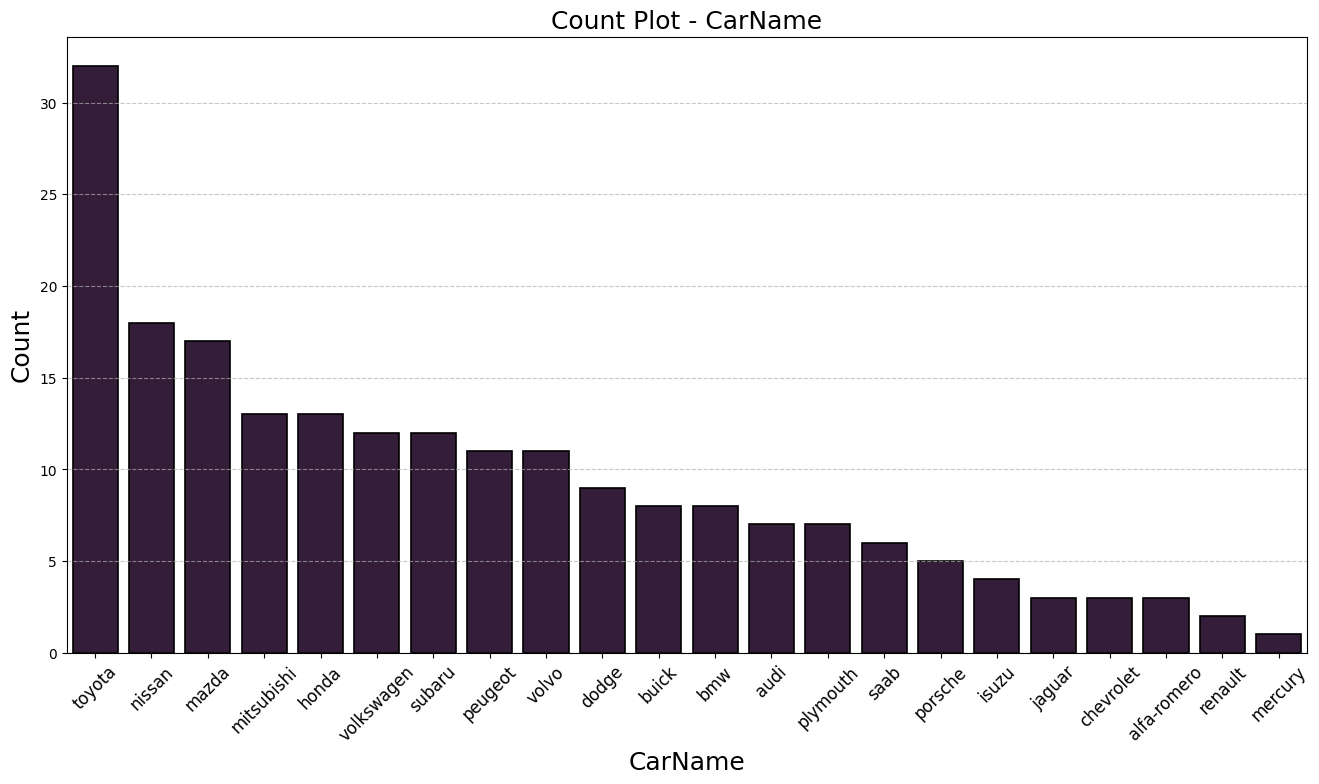

In [21]:
count_plot('CarName')

In [22]:
features_eda = df[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
                       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'doornumber_num', 'fueltype_num',
                       'aspiration_num', 'carbody_num', 'drivewheel_num', 'enginelocation_num', 'fuelsystem_num', 'enginetype_num',
                       'cylindernumber_num', 'price']]

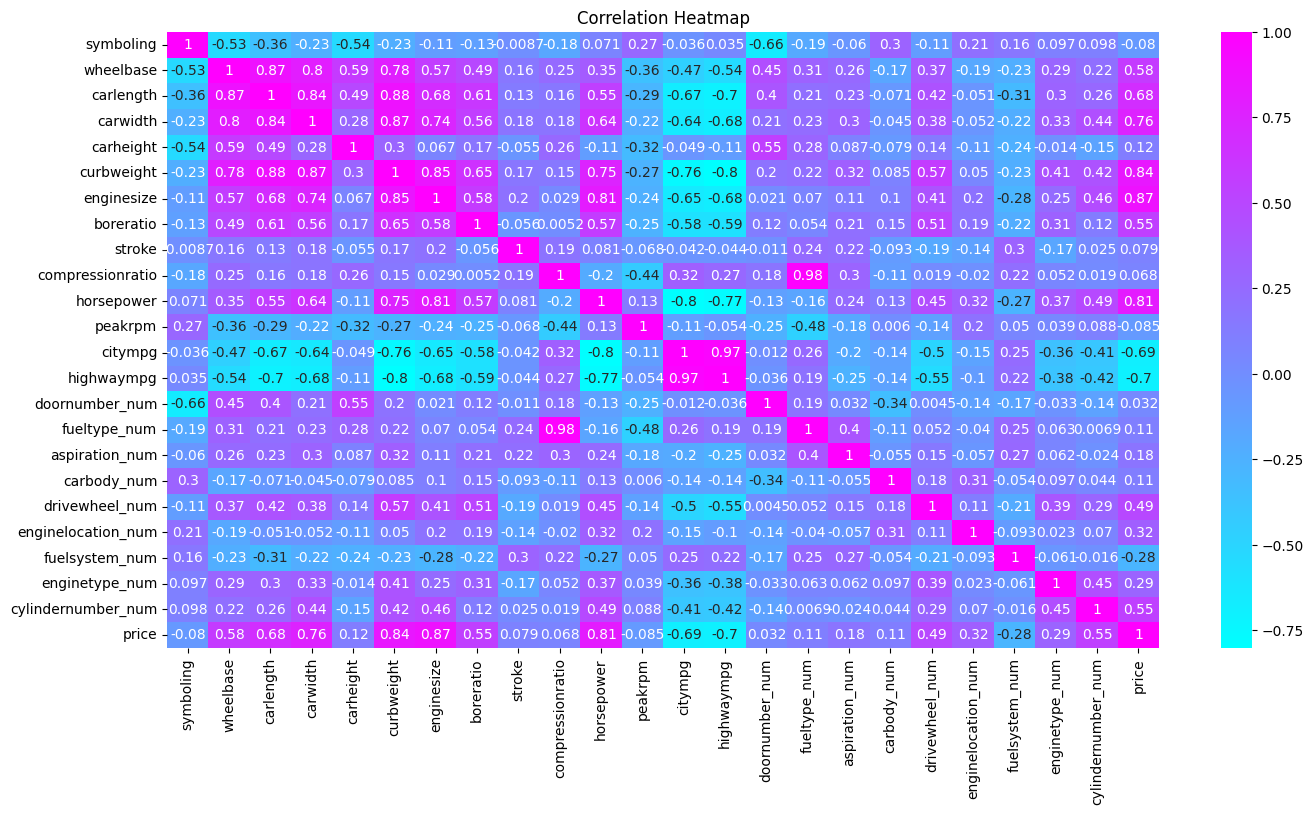

In [23]:
corr = features_eda.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, cmap='cool')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
features_eda.corrwith(df['price'])

symboling            -0.079978
wheelbase             0.577816
carlength             0.682920
carwidth              0.759325
carheight             0.119336
curbweight            0.835305
enginesize            0.874145
boreratio             0.553173
stroke                0.079443
compressionratio      0.067984
horsepower            0.808139
peakrpm              -0.085267
citympg              -0.685751
highwaympg           -0.697599
doornumber_num        0.031835
fueltype_num          0.105679
aspiration_num        0.177926
carbody_num           0.107031
drivewheel_num        0.490739
enginelocation_num    0.324973
fuelsystem_num       -0.275217
enginetype_num        0.290890
cylindernumber_num    0.549198
price                 1.000000
dtype: float64

In [25]:
VIF = pd.DataFrame()
VIF['Variable'] = features_eda.columns
VIF["VIF"] = [variance_inflation_factor(features_eda.values, i) for i in range(features_eda.shape[1])]

print(VIF)

              Variable          VIF
0            symboling     4.099265
1            wheelbase  2841.161880
2            carlength  2385.604897
3             carwidth  3496.510234
4            carheight  1119.203103
5           curbweight   635.855869
6           enginesize   152.623715
7            boreratio   396.231642
8               stroke   195.481671
9     compressionratio   620.561192
10          horsepower   114.333845
11             peakrpm   301.127322
12             citympg   540.412144
13          highwaympg   632.184057
14      doornumber_num     5.895012
15        fueltype_num   101.702795
16      aspiration_num     4.368246
17         carbody_num     2.732932
18      drivewheel_num     3.655750
19  enginelocation_num     2.097422
20      fuelsystem_num     2.809840
21      enginetype_num     3.031066
22  cylindernumber_num     3.036735
23               price    34.279670


>There is very strong multicollinearity; we will try using regularization, and if that doesn't help, we will consider the possibility of removing variables.

In [26]:
X = df[['symboling','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
    'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'doornumber_num',
    'fueltype_num', 'aspiration_num', 'carbody_num', 'drivewheel_num', 'enginelocation_num', 'fuelsystem_num',
    'enginetype_num', 'cylindernumber_num']]

In [27]:
y = df['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regression', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

cross_val_score_train = cross_val_score(pipeline, X_train, y_train, cv = 5)
cross_val_score_test = pipeline.score(X_test, y_test)
std_deviation = np.std(cross_val_score_train)

print(f'Mean Val score on a traine data LinearRegression: ', np.mean(cross_val_score_train))
print(f'Mean Val score on a test data LinearRegression: ', np.mean(cross_val_score_test))
std_deviation = np.std(cross_val_score_train)
print(f'Std_deviation LinearRegression: {std_deviation}')

print(f'\nMean Squared Error LinearRegression: ', mse)
print('R2 score LinearRegression: ', r2)

Mean Val score on a traine data LinearRegression:  0.813383265907482
Mean Val score on a test data LinearRegression:  0.8688775368513598
Std_deviation LinearRegression: 0.03198790031340104

Mean Squared Error LinearRegression:  9084738.38123365
R2 score LinearRegression:  0.8688775368513598


Following were used:
> Model: Standard Linear Regression

>Reguralization: None

>Variables: None preproccesed variables (includes: Multicorr, Non-normally distributed data)

<Axes: >

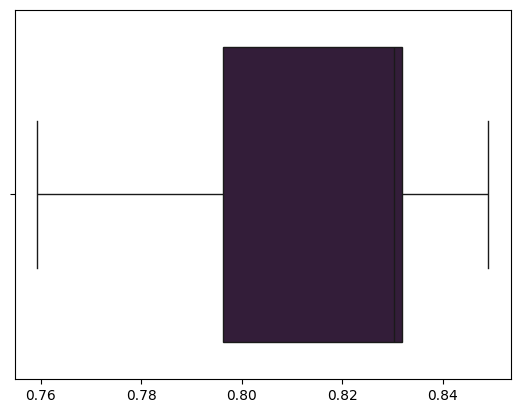

In [29]:
sns.boxplot(x=cross_val_score_train)

In [30]:
X_Lasso_train, X_Lasso_test, y_Lasso_train, y_Lasso_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

pipeline_Lasso = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lasso', Lasso())
])

param_grid_Lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]

}

grid_search_Lasso = GridSearchCV(pipeline_Lasso, param_grid_Lasso, cv = 5, scoring = 'neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_Lasso.fit(X_Lasso_train, y_Lasso_train)

y_Lasso_pred = grid_search_Lasso.predict(X_Lasso_test)

cross_val_score_Lasso_train = cross_val_score(pipeline_Lasso, X_Lasso_train, y_Lasso_train, cv = 5)
std_deviation_Lasso = np.std(cross_val_score_Lasso_train)
MSE_Lasso = mean_squared_error(y_Lasso_test, y_Lasso_pred)

R2_score_Lasso = r2_score(y_Lasso_test, y_Lasso_pred)

print(f'Best_Params Lasso: ', grid_search_Lasso.best_params_)
print(f'Best MSE Lasso: ', -grid_search_Lasso.best_score_)
print(f'R2 score Lasso: ', R2_score_Lasso)
print(f'\nMean score on a traine data Lasso: ', np.mean(cross_val_score_Lasso_train))
print(f'Std_crossval_Lasso: ', std_deviation_Lasso)
print(f'MSE Lasso: ', MSE_Lasso)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best_Params Lasso:  {'lasso__alpha': 10}
Best MSE Lasso:  9986538.112969806
R2 score Lasso:  0.8603191422210479

Mean score on a traine data Lasso:  0.8191608348503587
Std_crossval_Lasso:  0.02953690998078711
MSE Lasso:  9677701.435104907


<Axes: >

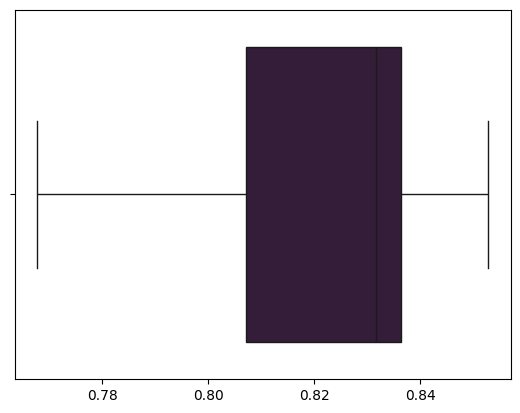

In [31]:
sns.boxplot(x=cross_val_score_Lasso_train)

In [32]:
X_ridge_train, X_ridge_test, y_ridge_train, y_ridge_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Pipeline_Ridge = Pipeline([
    ('scaler', MinMaxScaler()),
    ('ridge', Ridge())
])

param_grid_Ridge = {
    'ridge__alpha' : [0.1, 1.0, 10.0],
    'ridge__solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

grid_search_Ridge = GridSearchCV(Pipeline_Ridge, param_grid_Ridge, cv = 5, scoring = 'neg_mean_squared_error', n_jobs=-1)
grid_search_Ridge.fit(X_ridge_train, y_ridge_train)
y_pred_ridge = grid_search_Ridge.predict(X_ridge_test)

cross_val_score_ridge_train = cross_val_score(Pipeline_Ridge, X_ridge_train, y_ridge_train, cv = 5)
std_deviation_ridge = np.std(cross_val_score_ridge_train)
MSE_Ridge = mean_squared_error(y_ridge_test, y_pred_ridge)

r2_score_ridge = r2_score(y_ridge_test, y_pred_ridge)

print(f'Best Params Ridge: ', grid_search_Ridge.best_params_)
print(f'Best Score Ridge: ', -grid_search_Ridge.best_score_)
print(f'\nR2 score Ridge: ', r2_score_ridge)
print(f'\nCross Val on a traine Data Ridge: ', np.mean(cross_val_score_ridge_train))
print(f'STD Deviation cross_val Ridge: ', std_deviation_ridge)
print(f'MSE Ridge: ', MSE_Ridge)

Best Params Ridge:  {'ridge__alpha': 1.0, 'ridge__solver': 'saga'}
Best Score Ridge:  9500561.137050454

R2 score Ridge:  0.8281762746104157

Cross Val on a traine Data Ridge:  0.840866971944758
STD Deviation cross_val Ridge:  0.025217289192079457
MSE Ridge:  11904700.044292115


<Axes: >

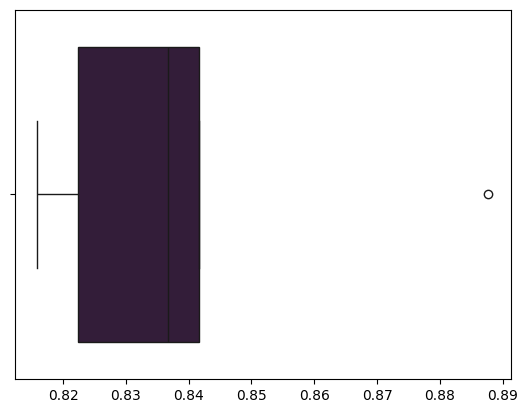

In [33]:
sns.boxplot(x = cross_val_score_ridge_train)

In [34]:
X_XGboost_train, X_XGBBoost_test, y_XGBBoost_train, y_XGBBoost_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Pipeline_XGB = Pipeline([
    ('scaler', MinMaxScaler()),
    ('xgbreg', xgb.XGBRegressor(objective='reg:squarederror'))
])

param_grid_xgb = {
    'xgbreg__n_estimators': [100, 200],
    'xgbreg__max_depth': [3, 4, 5],
    'xgbreg__learning_rate': [0.01, 0.1],
    'xgbreg__subsample': [0.8, 1.0]
}

grid_search_XGB = GridSearchCV(Pipeline_XGB, param_grid_xgb, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_XGB.fit(X_XGboost_train, y_XGBBoost_train)
y_XGB_pred = grid_search_XGB.predict(X_XGBBoost_test)

cross_val_score_XGB_train = cross_val_score(Pipeline_XGB, X_XGboost_train, y_XGBBoost_train, cv = 5)
std_deviation_XGB = np.std(cross_val_score_XGB_train)
MSE_XGB = mean_squared_error(y_XGBBoost_test, y_XGB_pred)
R2_score_XGB = r2_score(y_XGBBoost_test, y_XGB_pred)

print(f'Best Params XGB: ', grid_search_XGB.best_params_)
print(f'Best Score XGB: ', grid_search_XGB.best_score_)
print(f'\nCross Val on a traine Data XGB: ', np.mean(cross_val_score_XGB_train))
print(f'STD Deviation cross_val XGB: ', std_deviation_XGB)
print(f'MSE XGB: ', MSE_XGB)
print(f'\nR2 score XGB: ', R2_score_XGB )

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params XGB:  {'xgbreg__learning_rate': 0.1, 'xgbreg__max_depth': 4, 'xgbreg__n_estimators': 200, 'xgbreg__subsample': 1.0}
Best Score XGB:  -5996505.59785291

Cross Val on a traine Data XGB:  0.8909531115829754
STD Deviation cross_val XGB:  0.04159436007387772
MSE XGB:  6122812.623873649

R2 score XGB:  0.9116278049020845


<Axes: >

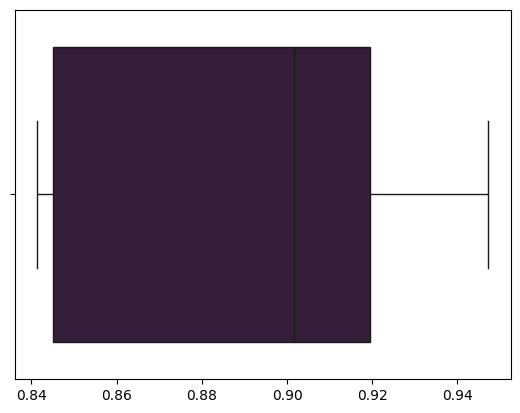

In [35]:
sns.boxplot(x = cross_val_score_XGB_train)

In [36]:
y_BOXCOX = df['price']

In [37]:
y_BOXCOX_transformed, lambda_value = boxcox(y_BOXCOX)
print(lambda_value)

-0.6280809555716815


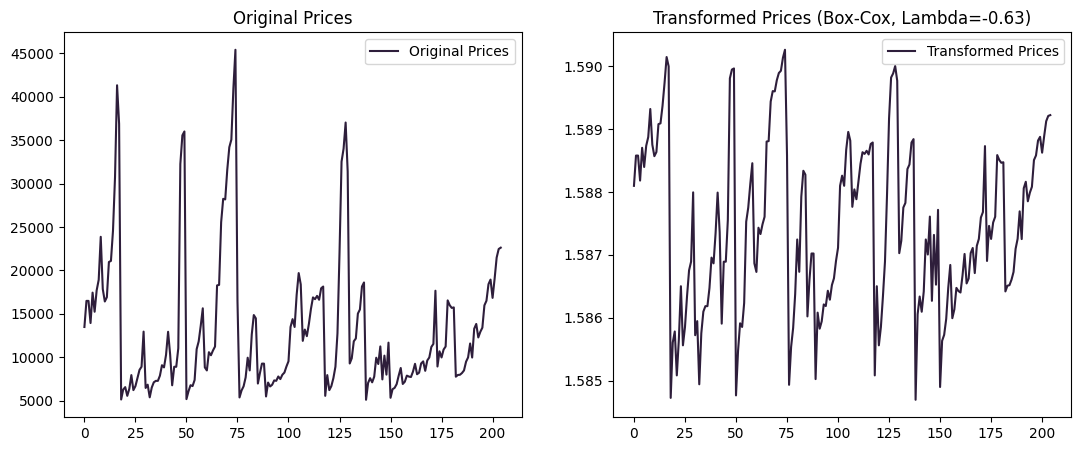

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
axs[0].plot(y_BOXCOX, label='Original Prices')
axs[0].set_title('Original Prices')
axs[0].legend()  # Добавление легенды

# Используйте метод plot объекта осей для второго графика
axs[1].plot(y_BOXCOX_transformed, label='Transformed Prices')
axs[1].set_title(f'Transformed Prices (Box-Cox, Lambda={lambda_value:.2f})')
axs[1].legend()  # Добавление легенды

plt.show()

<Axes: ylabel='Count'>

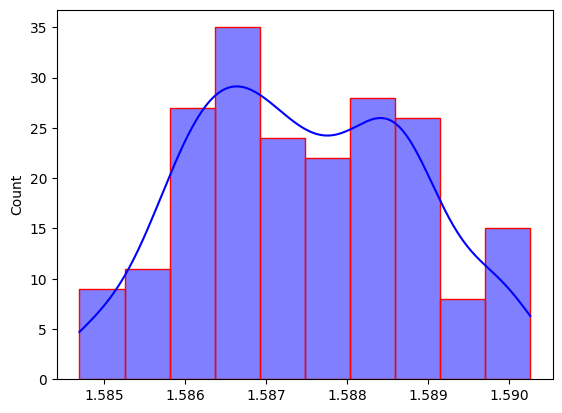

In [39]:
sns.histplot(data=y_BOXCOX_transformed,bins=10, kde=True, color='blue', edgecolor='red')

In [40]:
skeew = skew(y_BOXCOX_transformed)
print(f'Skewness = {skeew}')

Skewness = 0.09346385309949919


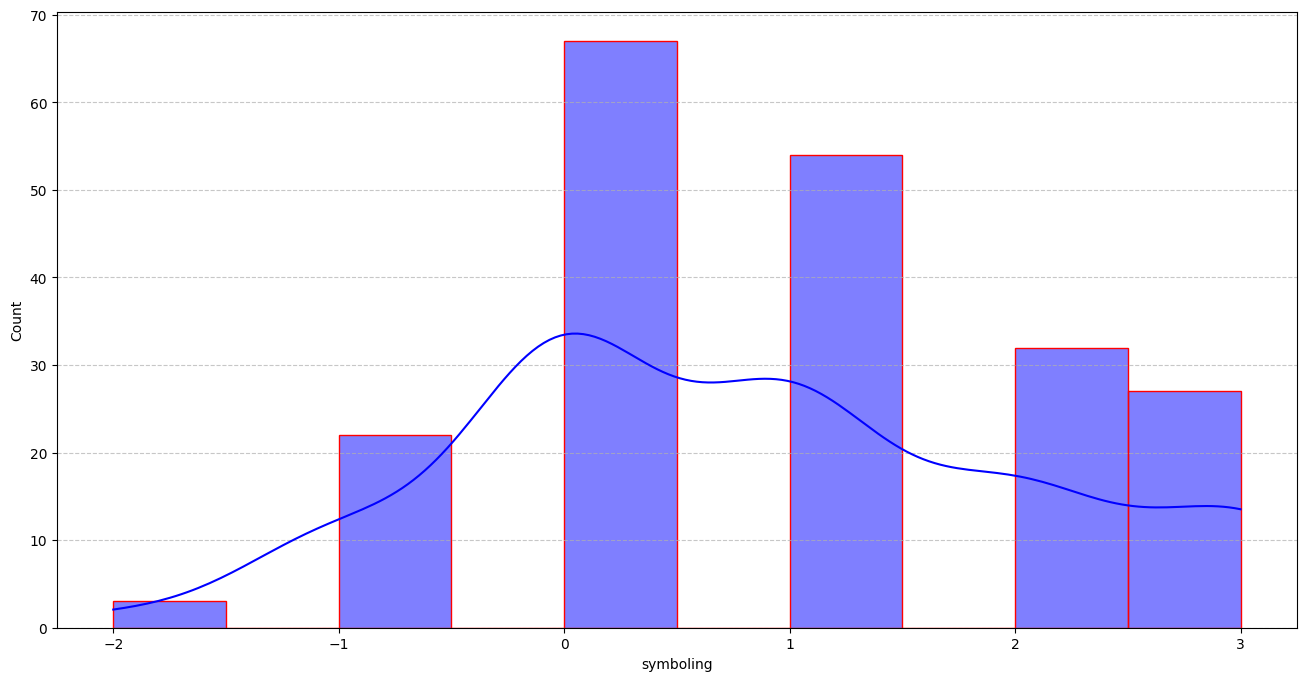

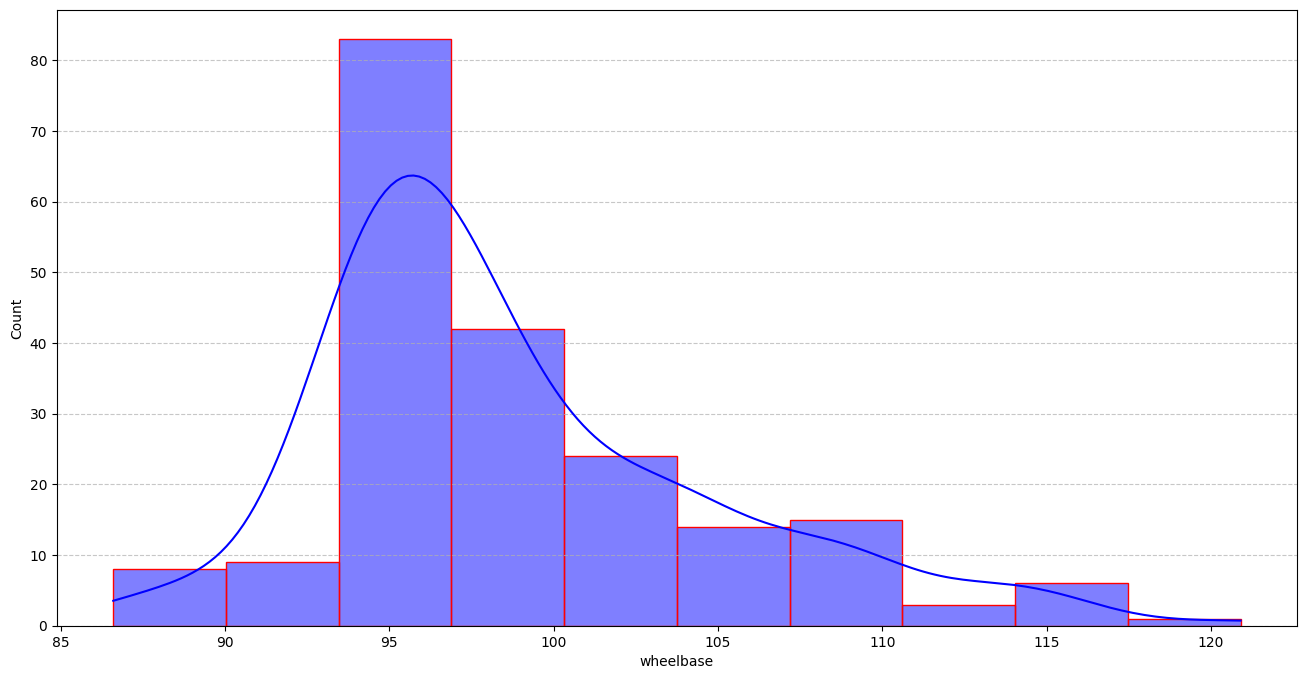

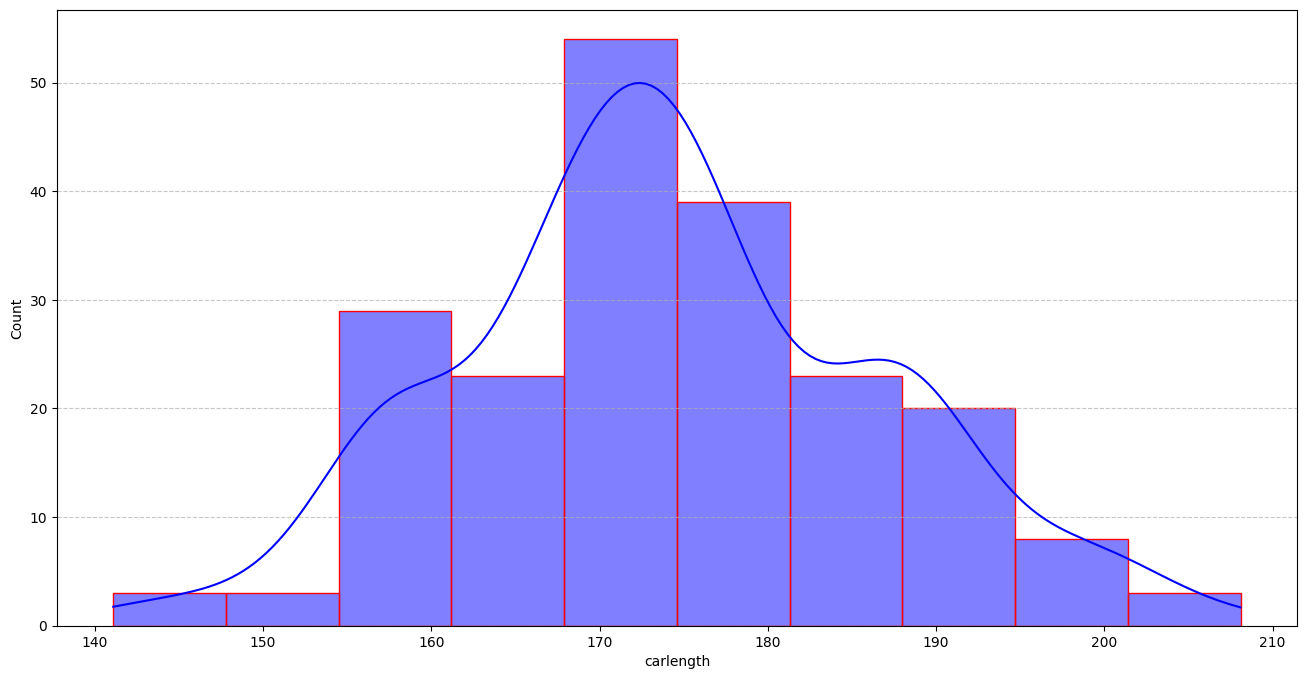

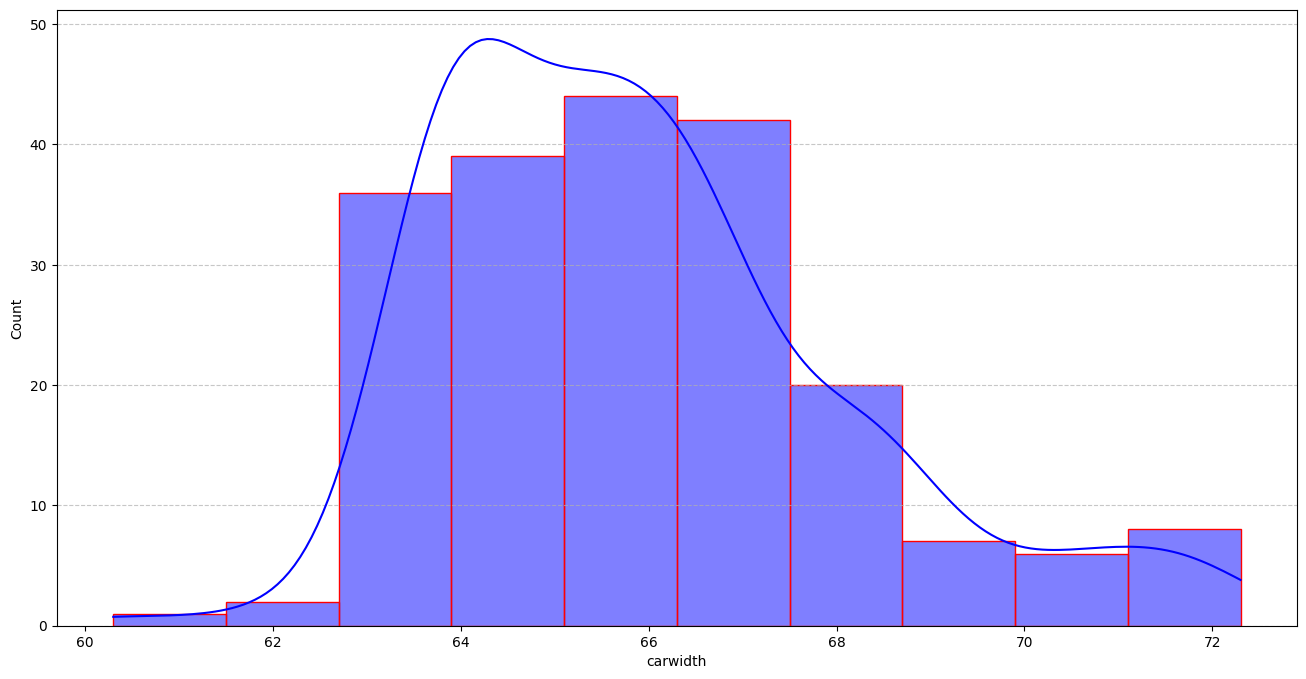

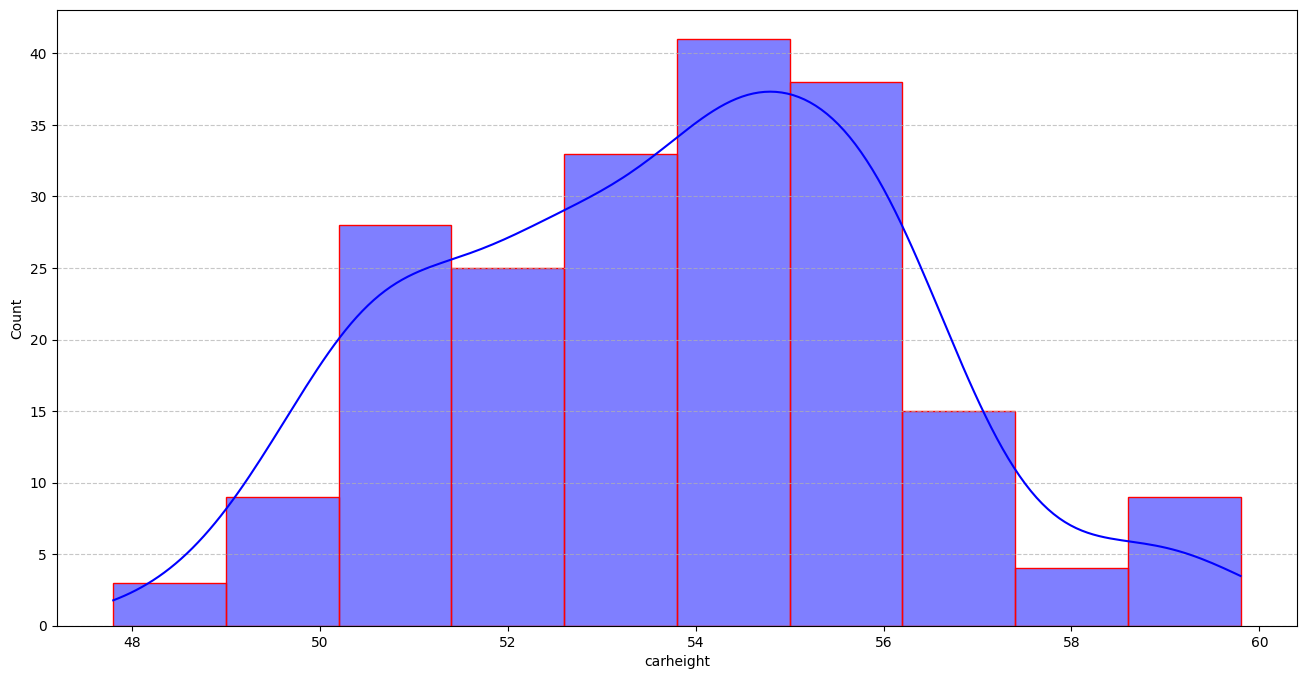

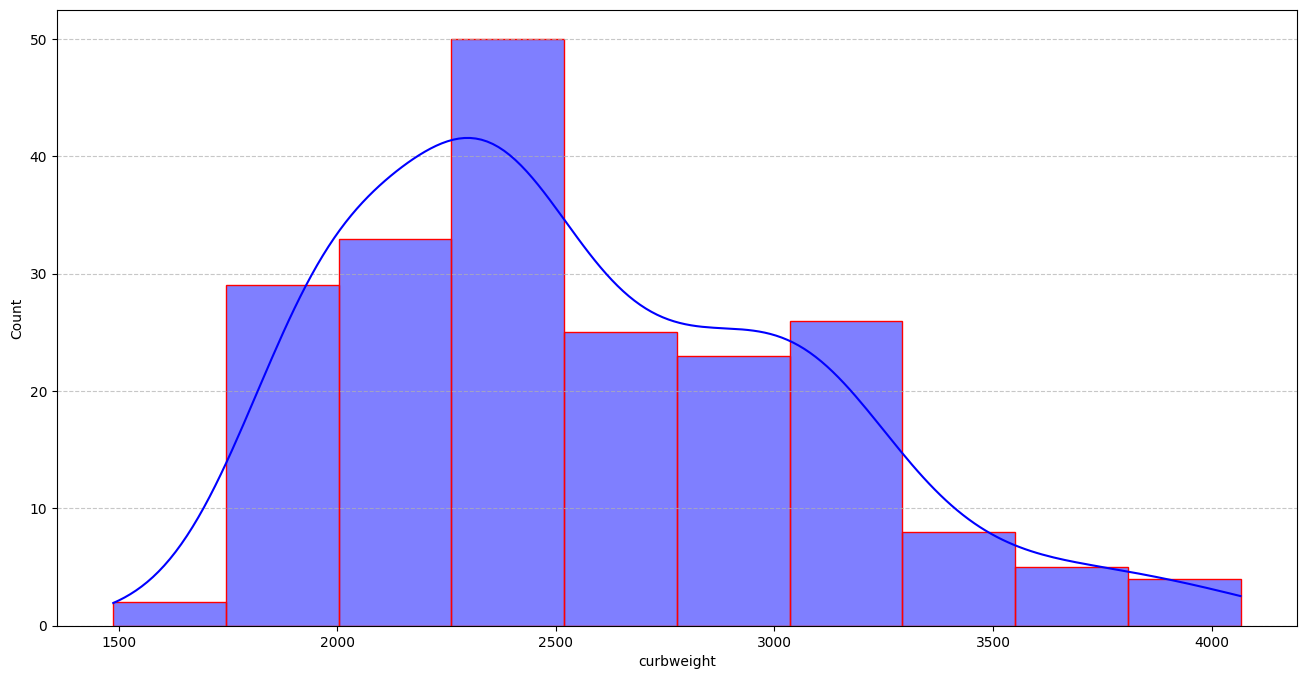

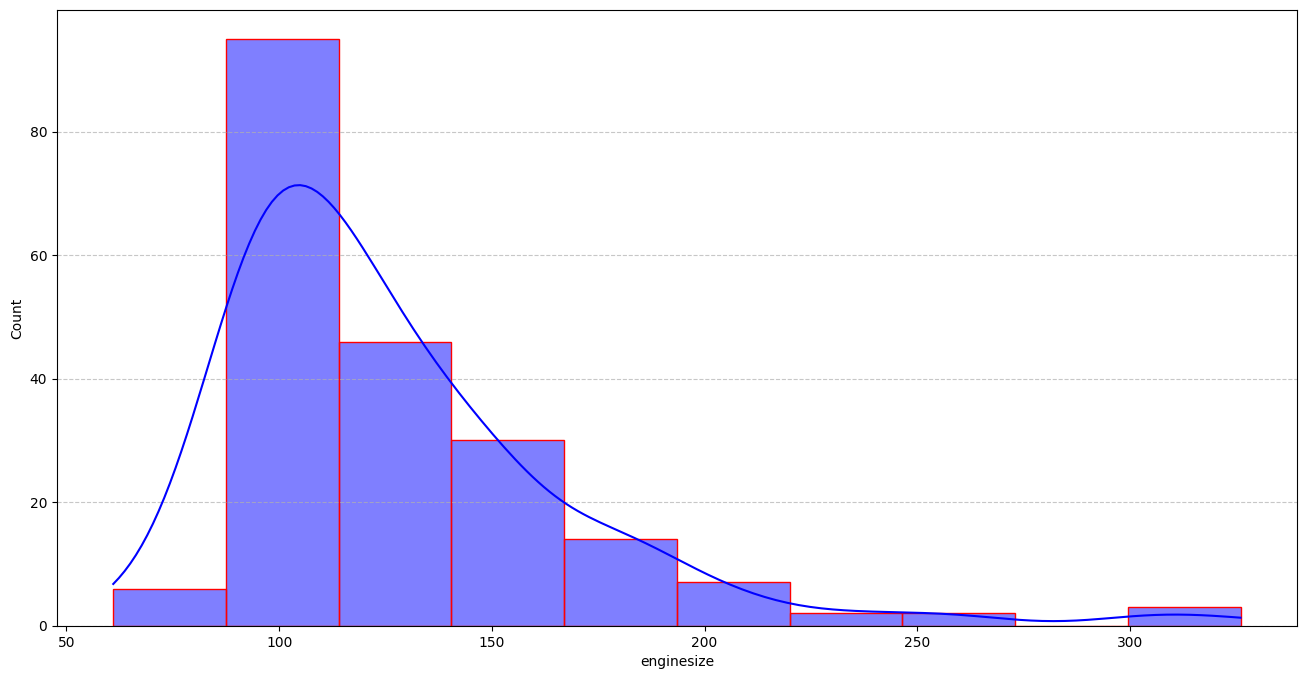

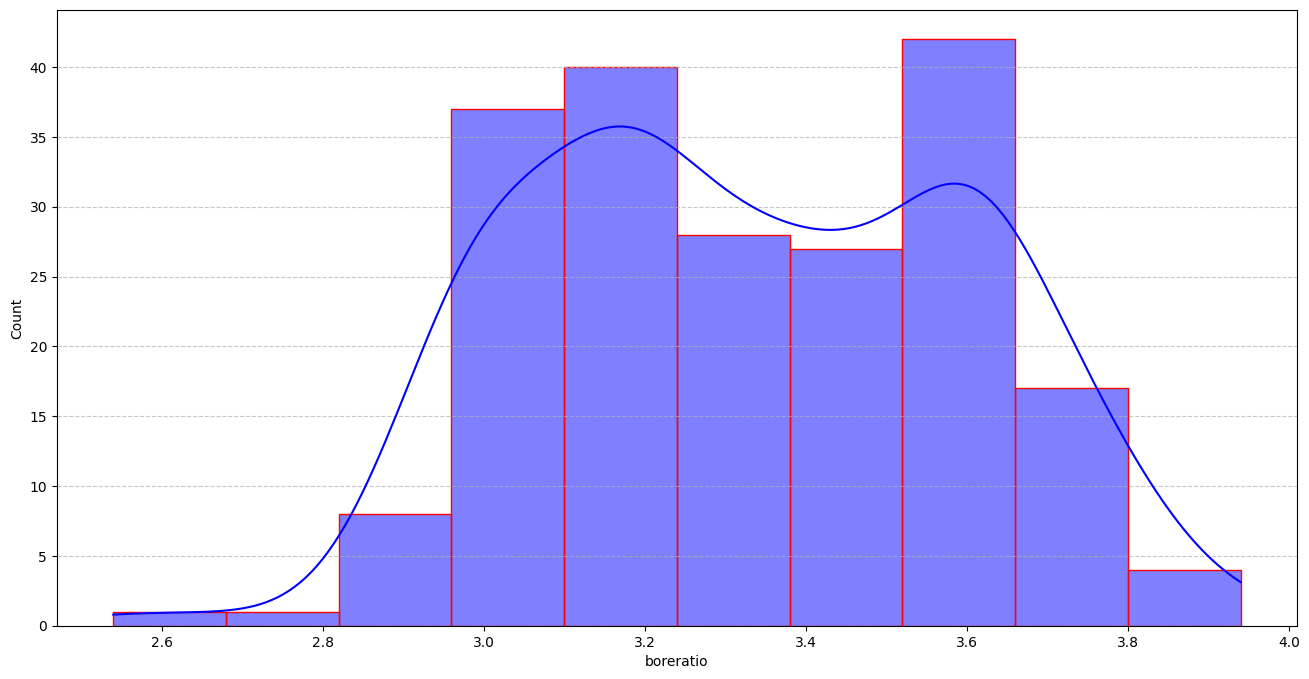

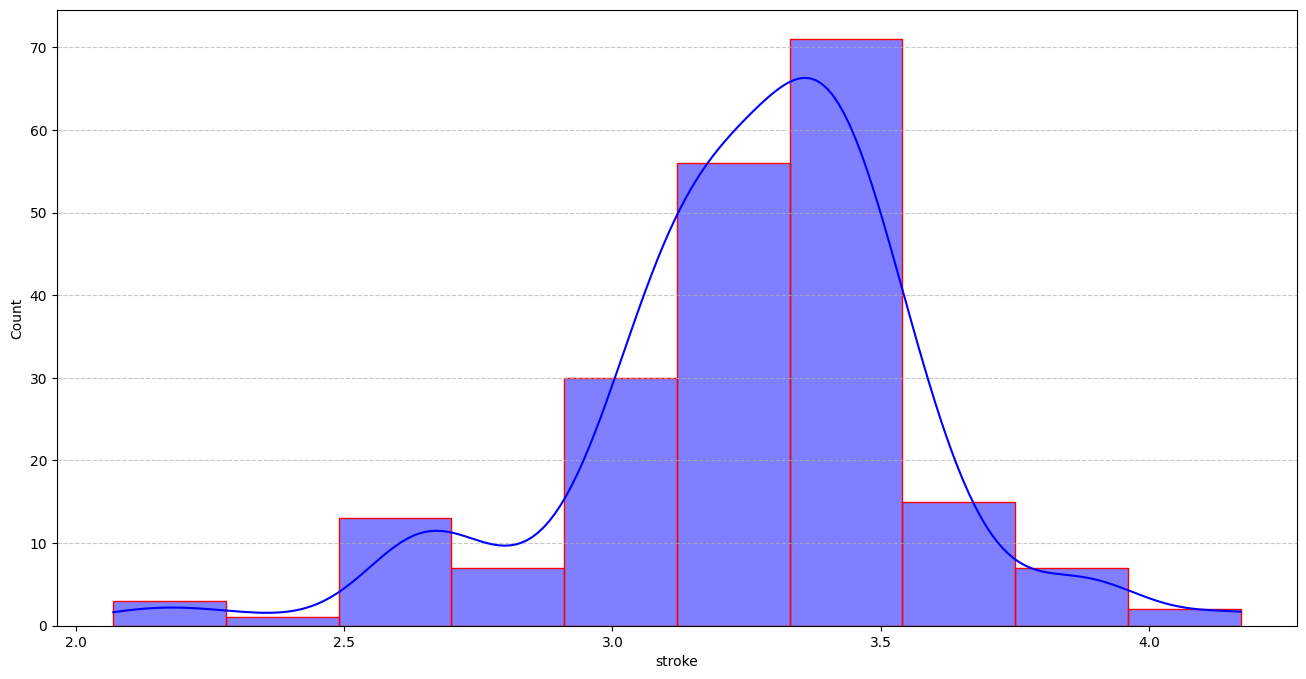

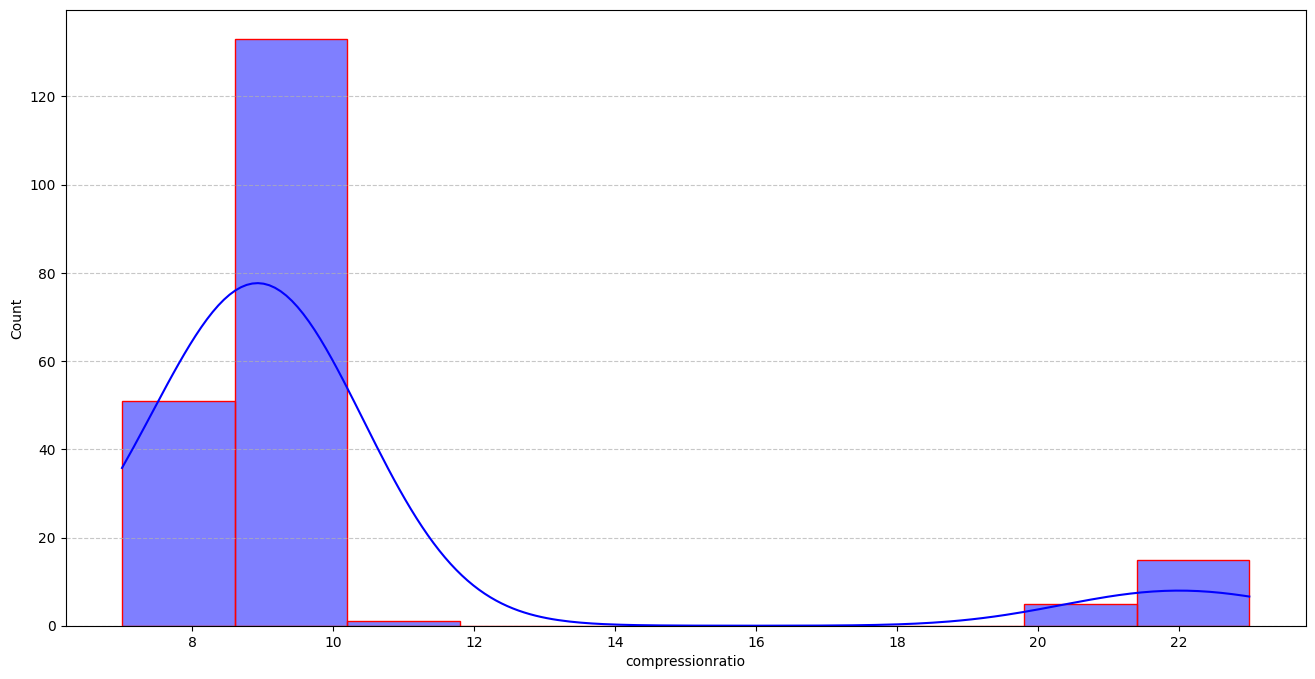

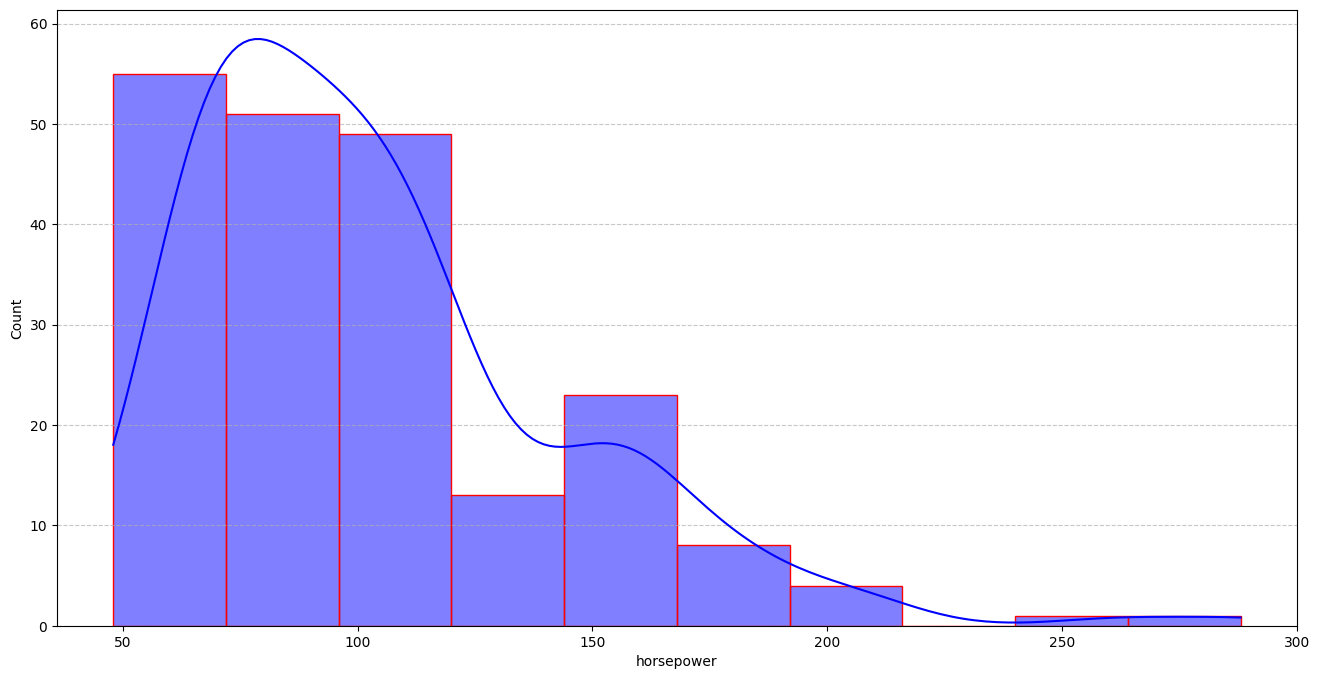

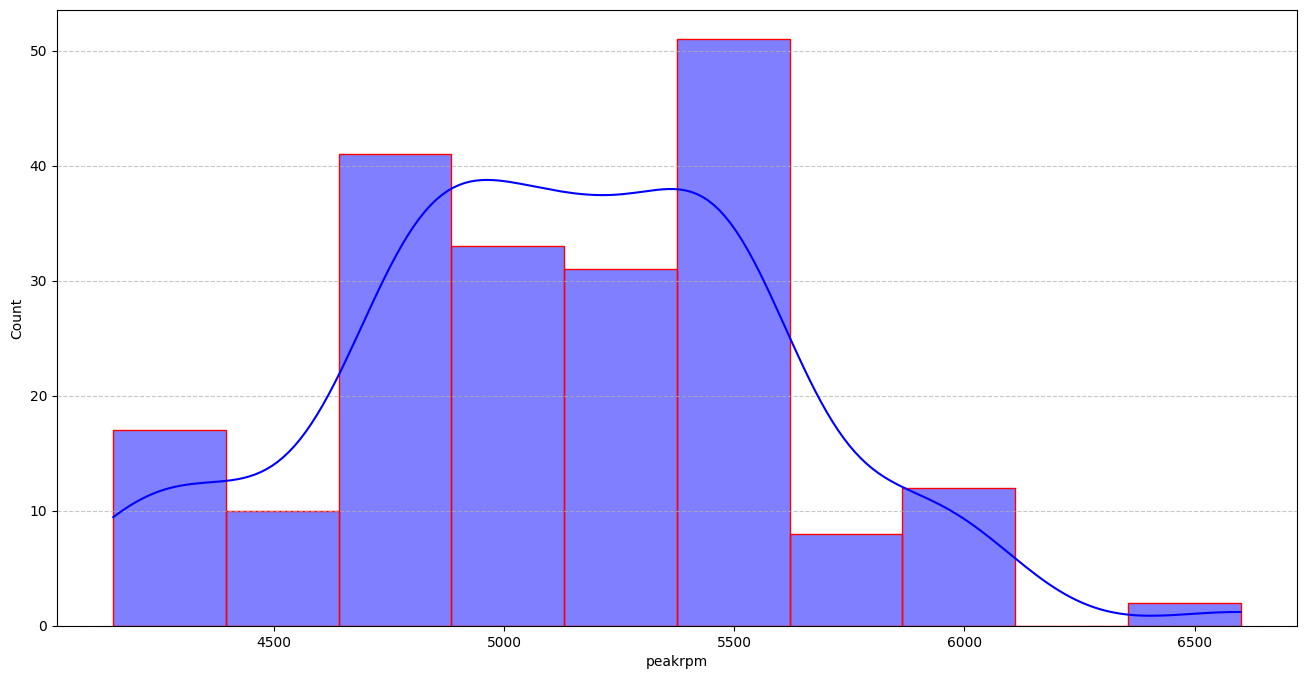

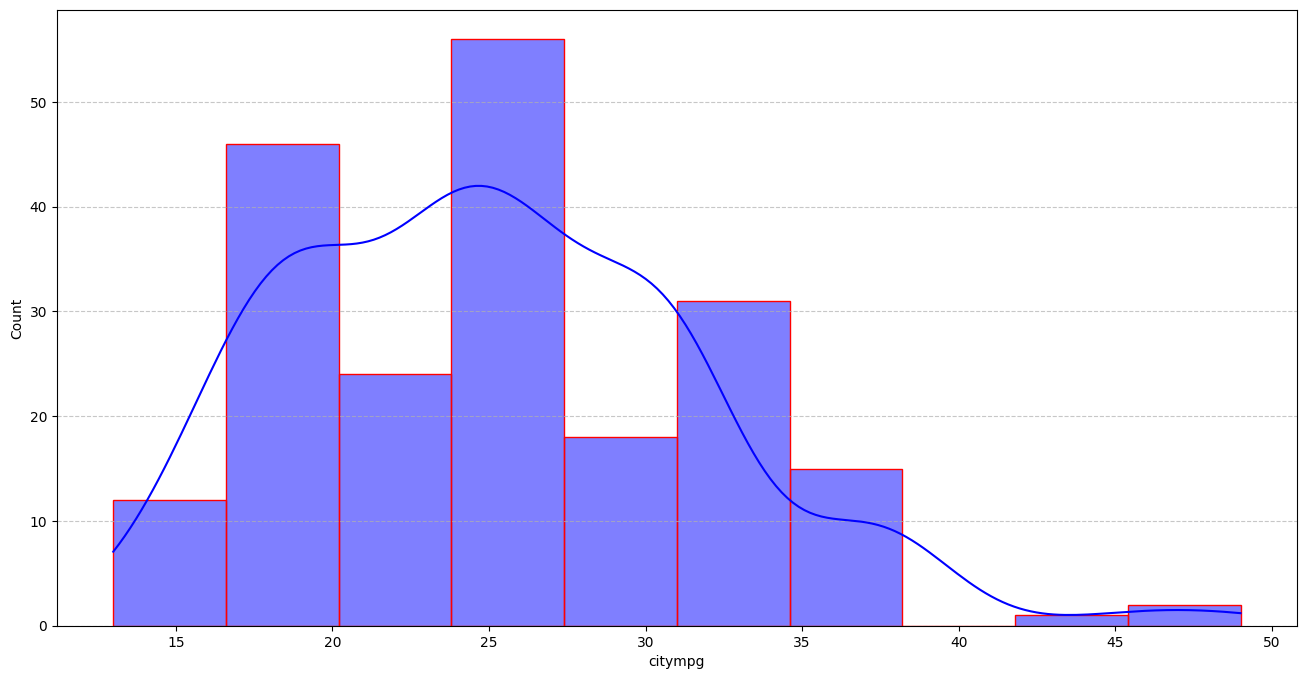

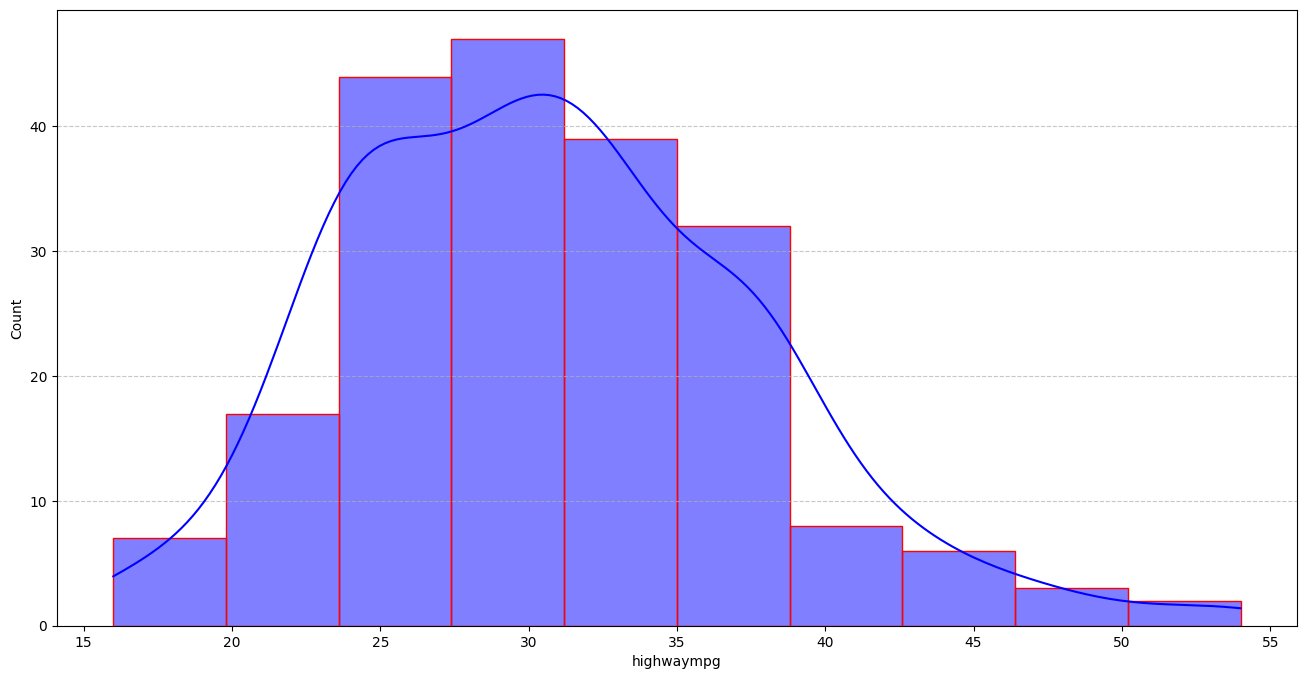

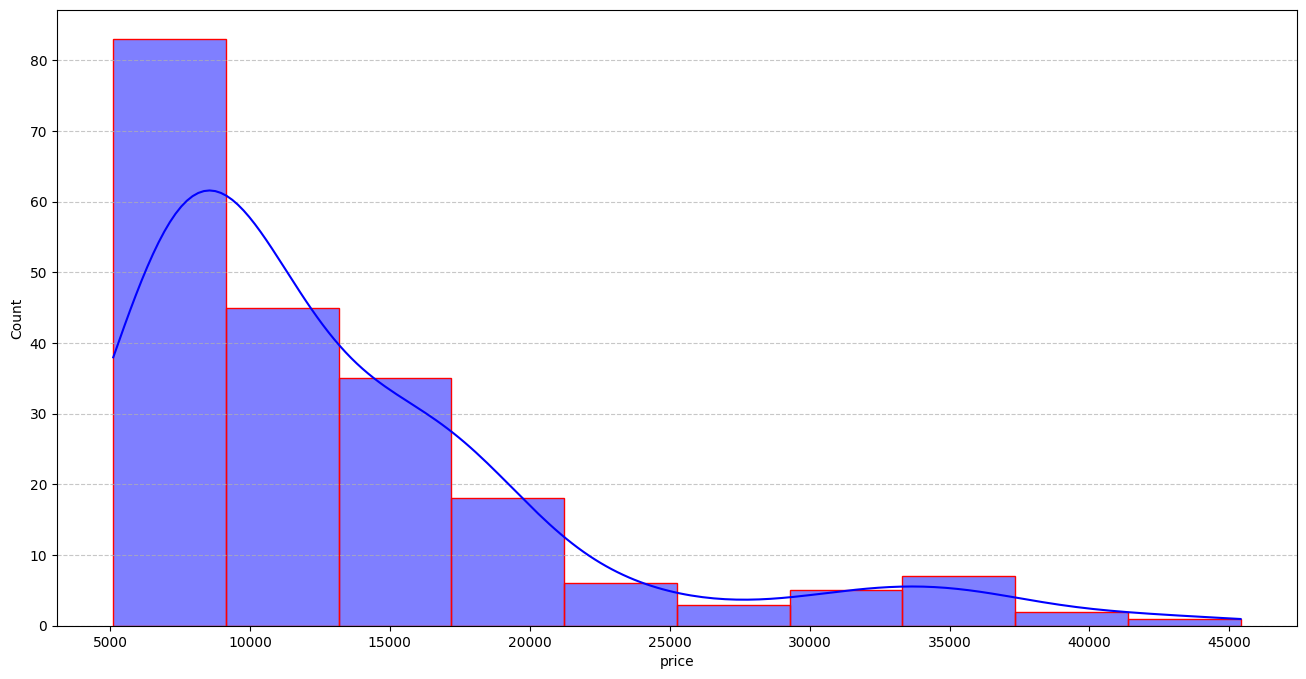

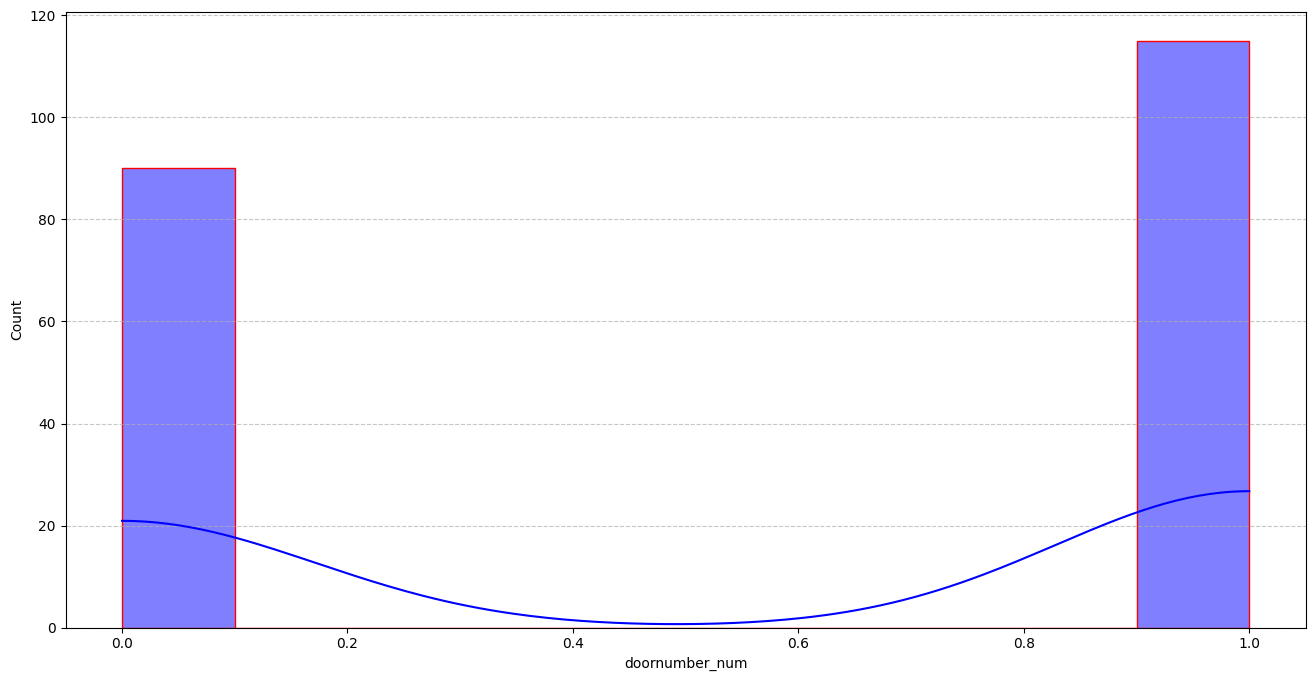

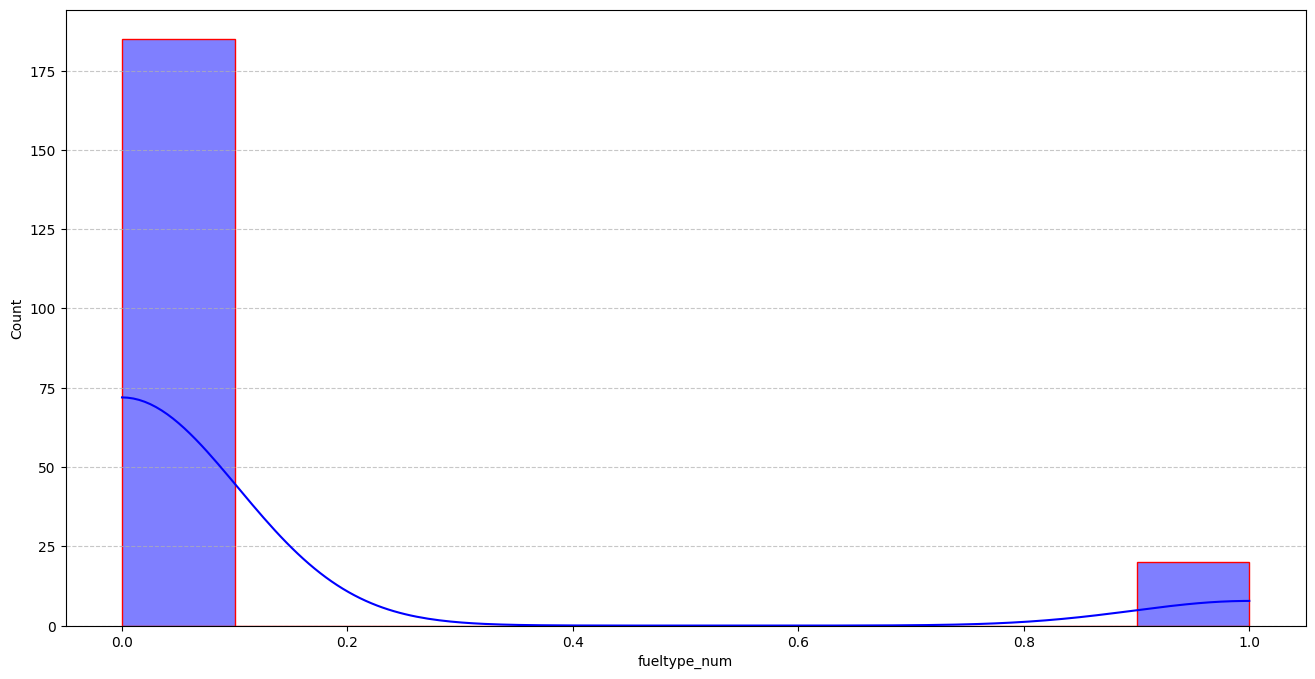

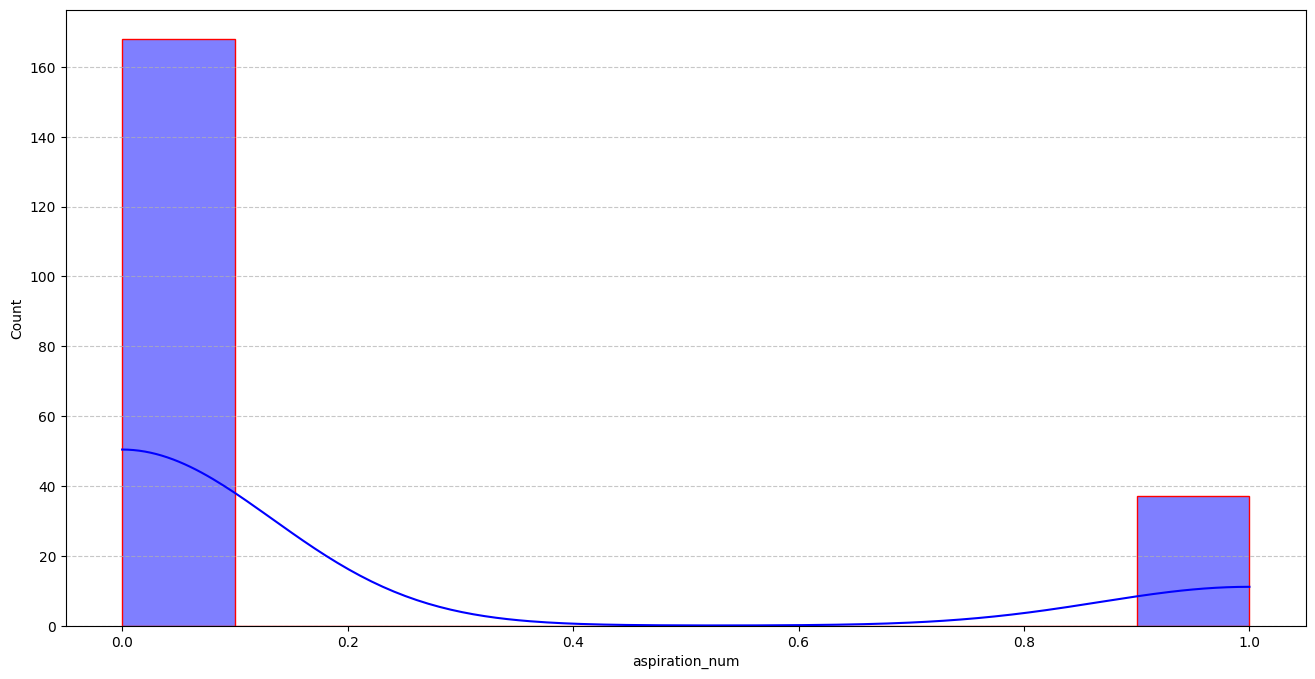

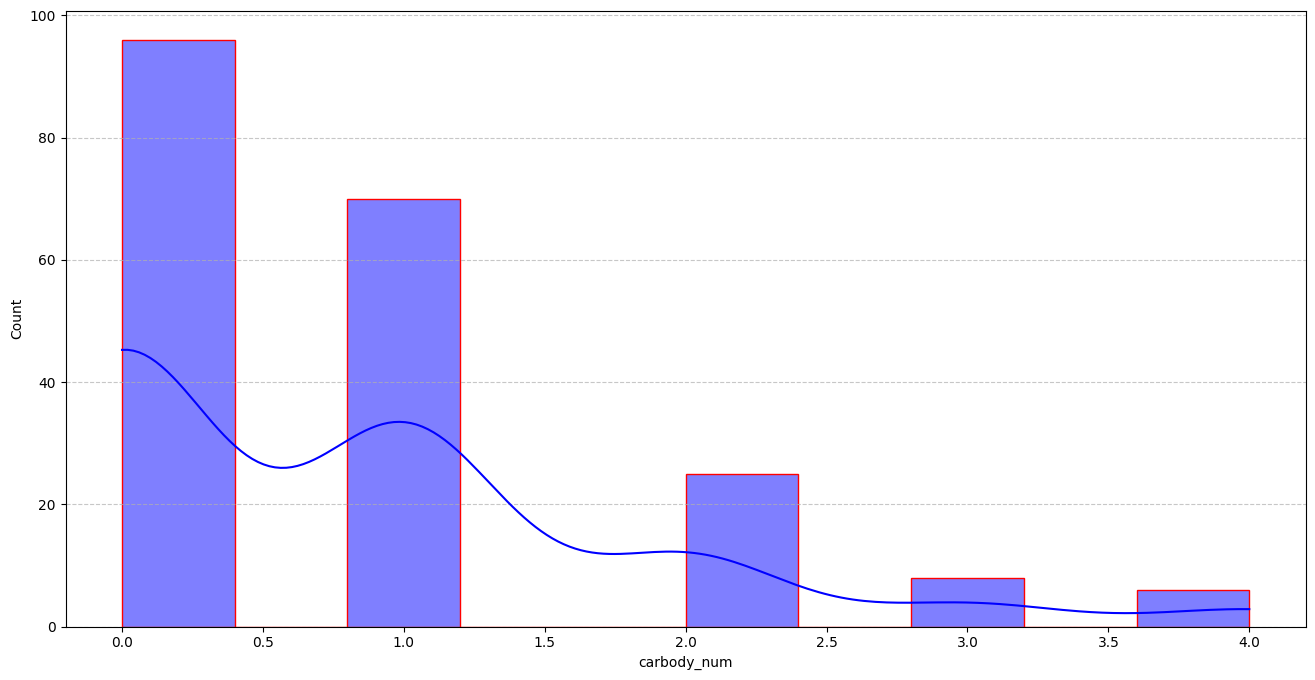

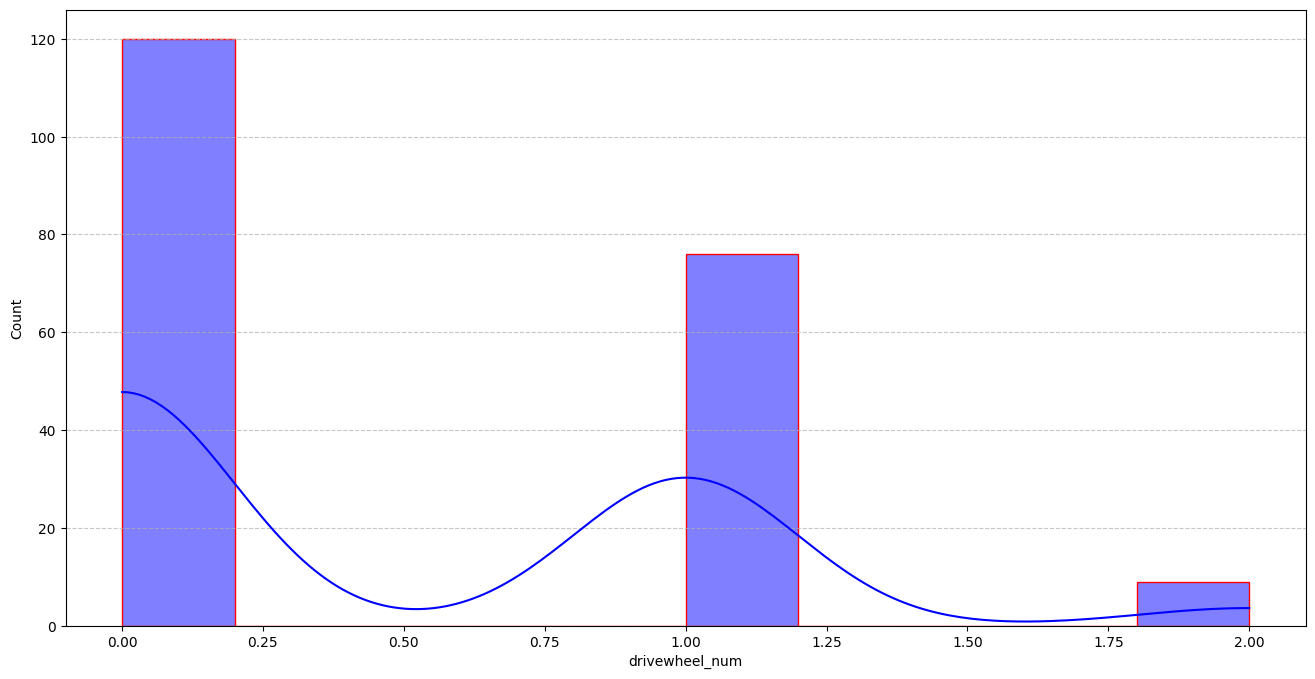

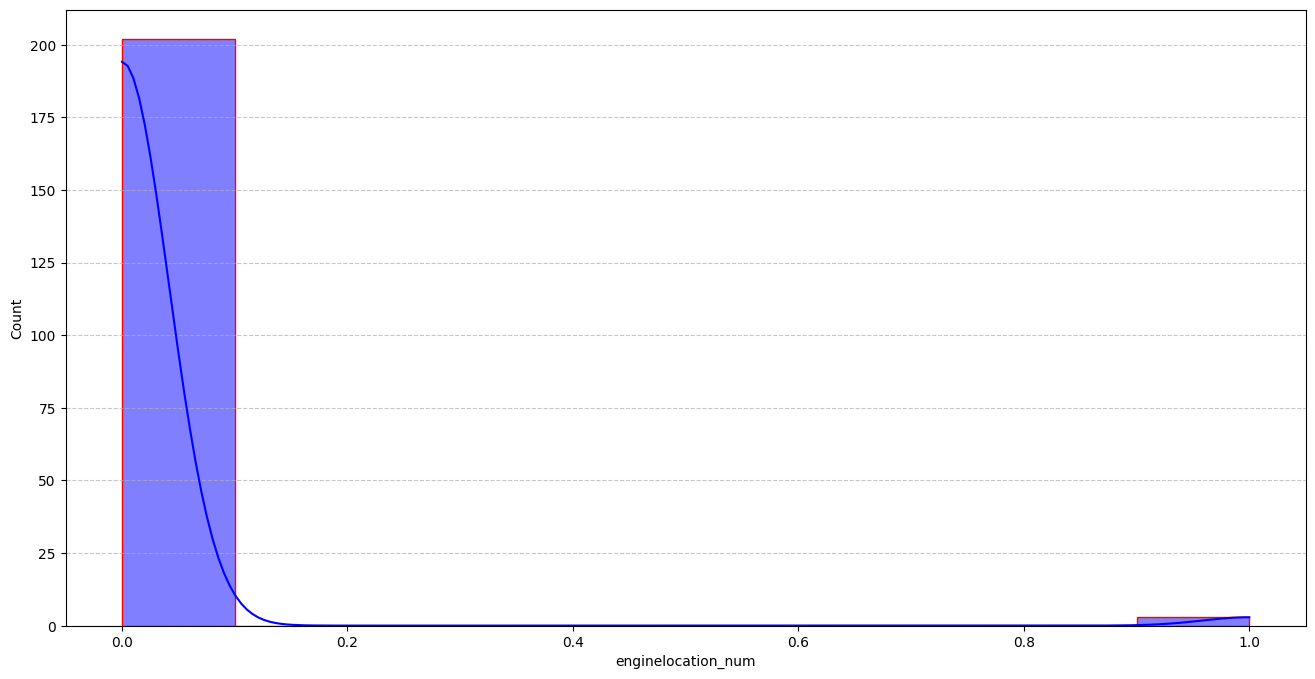

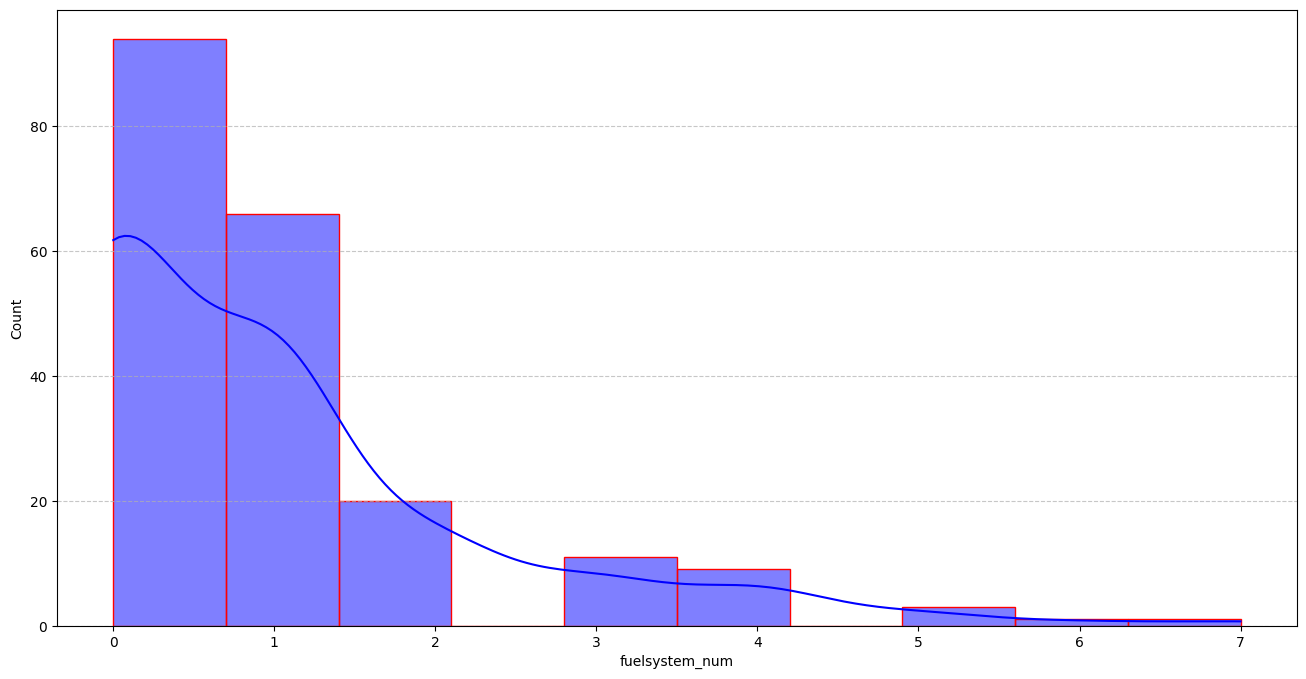

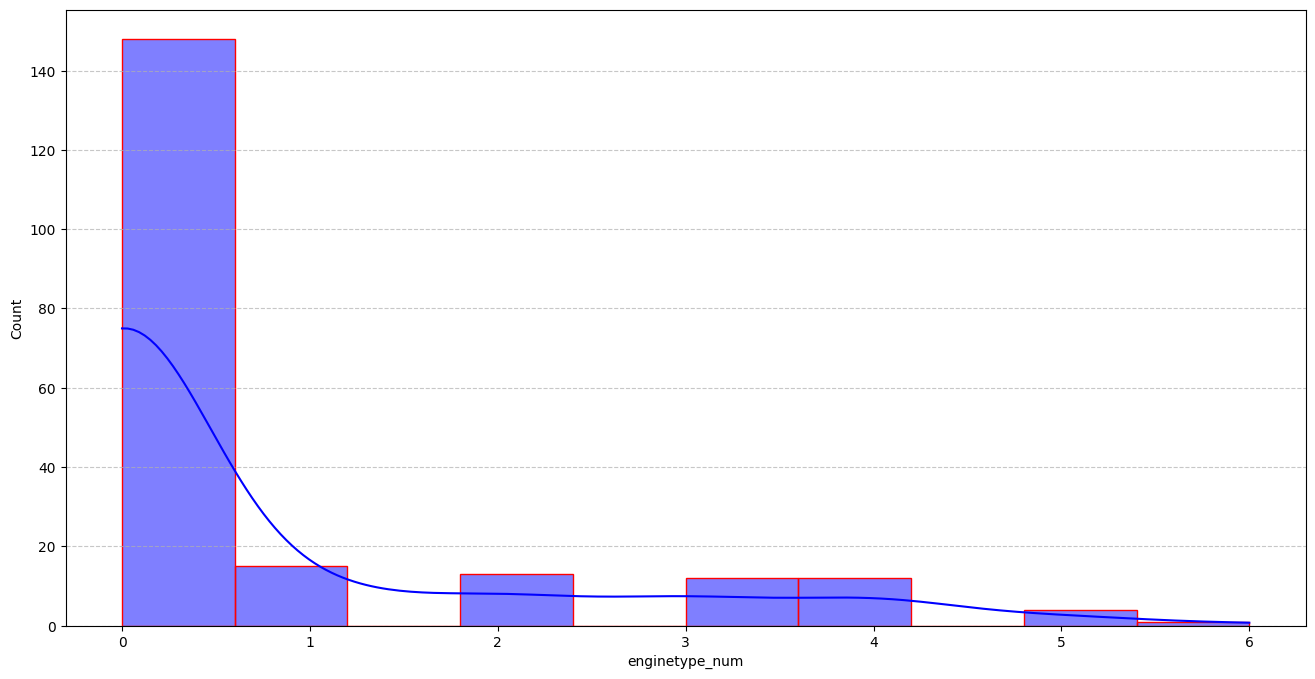

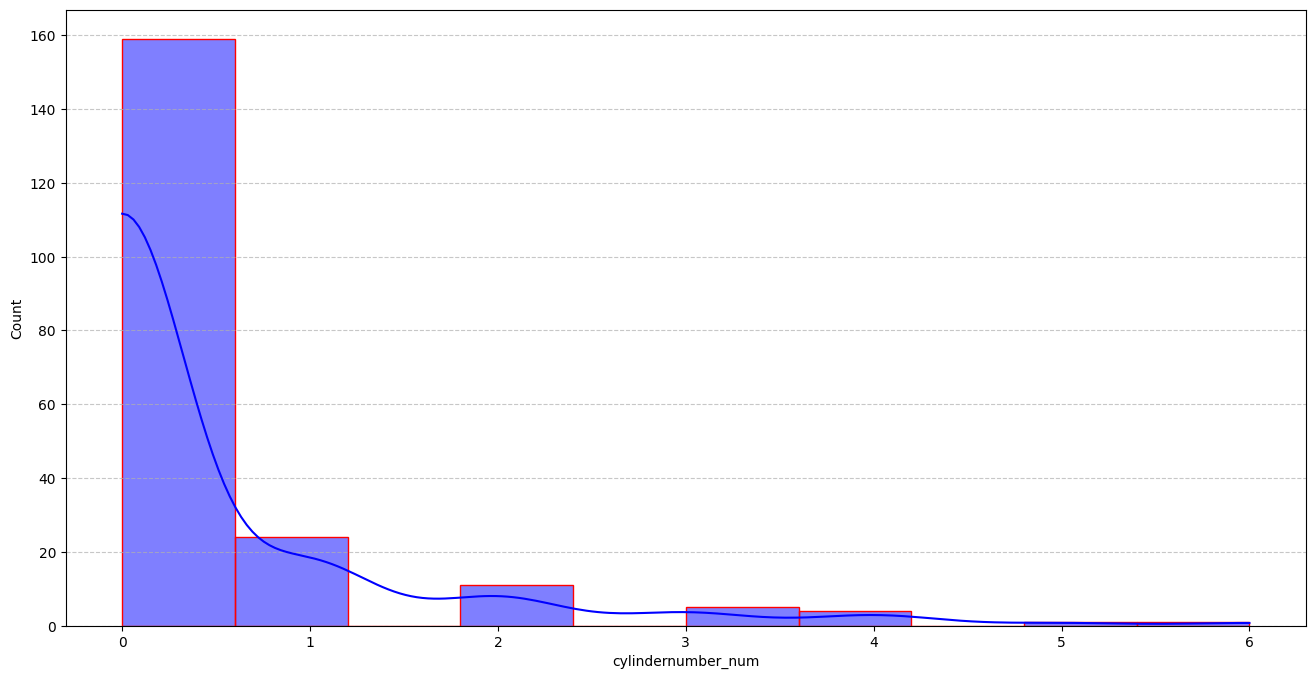

In [41]:
for x in df.select_dtypes(include=['int64','float64']).columns.to_list()[1:]:
  histogram(x)

In [42]:
df.select_dtypes(include = (['float64', 'int64'])).skew()

car_ID                0.000000
symboling             0.211072
wheelbase             1.050214
carlength             0.155954
carwidth              0.904003
carheight             0.063123
curbweight            0.681398
enginesize            1.947655
boreratio             0.020156
stroke               -0.689705
compressionratio      2.610862
horsepower            1.405310
peakrpm               0.075159
citympg               0.663704
highwaympg            0.539997
price                 1.777678
doornumber_num       -0.247552
fueltype_num          2.732619
aspiration_num        1.673832
carbody_num           1.346445
drivewheel_num        0.843899
enginelocation_num    8.143531
fuelsystem_num        1.777997
enginetype_num        1.821598
cylindernumber_num    2.901497
dtype: float64

In [43]:
df['transformed_wheelbase'], lambda_value_wheelbase = boxcox(df['wheelbase'])
print(f'Lambda Wheelbase:', lambda_value_wheelbase)
df['curbweight_transformed'], lambda_value_curbweight = boxcox(df['curbweight'])
print(f'Lambda curbweight:', lambda_value_curbweight)
df['transformed_enginesize'], lambda_value_enginesize = boxcox(df['enginesize'])
print(f'Lambda enginesize:', lambda_value_enginesize)
df['stroke_transformed'], lambda_value_stroke = boxcox(df['stroke'])
print(f'Lambda stroke:', lambda_value_stroke)
df['compression_ratio_tranfromed'], lambda_value_compression_ratio = boxcox(df['compressionratio'])
print(f'Lambda compression ratio:', lambda_value_compression_ratio)
df['horsepower_tranformed'], lambda_value_horsepower = boxcox(df['horsepower'])
print(f'Lambda compression ratio:', lambda_value_horsepower)
df['peakrpm_transformed'], lambda_value_peakrpm = boxcox(df['peakrpm'])
print(f'Lambda peakrpm:', lambda_value_peakrpm)
df['citympg_transformed'], lambda_value_citympg = boxcox(df['citympg'])
print(f'Lambda citympg:', lambda_value_citympg)
df['highwaympg_transformed'], lambda_value_highwaympg = boxcox(df['highwaympg'])
print(f'Lambda highwaympg:', lambda_value_highwaympg)

Lambda Wheelbase: -5.069774018826096
Lambda curbweight: -0.6006007081957044
Lambda enginesize: -0.9617338982169858
Lambda stroke: 2.511511600839133
Lambda compression ratio: -3.0701036111613083
Lambda compression ratio: -0.604574799202489
Lambda peakrpm: 0.7293978621720419
Lambda citympg: -0.004858542484576192
Lambda highwaympg: 0.18308918978048283


In [44]:
X_BOXCOX = df[['boreratio', 'carwidth', 'carlength', 'symboling', 'carheight', 'doornumber_num', 'fueltype_num', 'aspiration_num',
              'carbody_num', 'drivewheel_num', 'enginelocation_num', 'fuelsystem_num', 'enginetype_num', 'cylindernumber_num',
              'highwaympg_transformed', 'citympg_transformed', 'peakrpm_transformed', 'horsepower_tranformed',
              'compression_ratio_tranfromed', 'stroke_transformed', 'transformed_enginesize', 'curbweight_transformed',
              'transformed_wheelbase']]

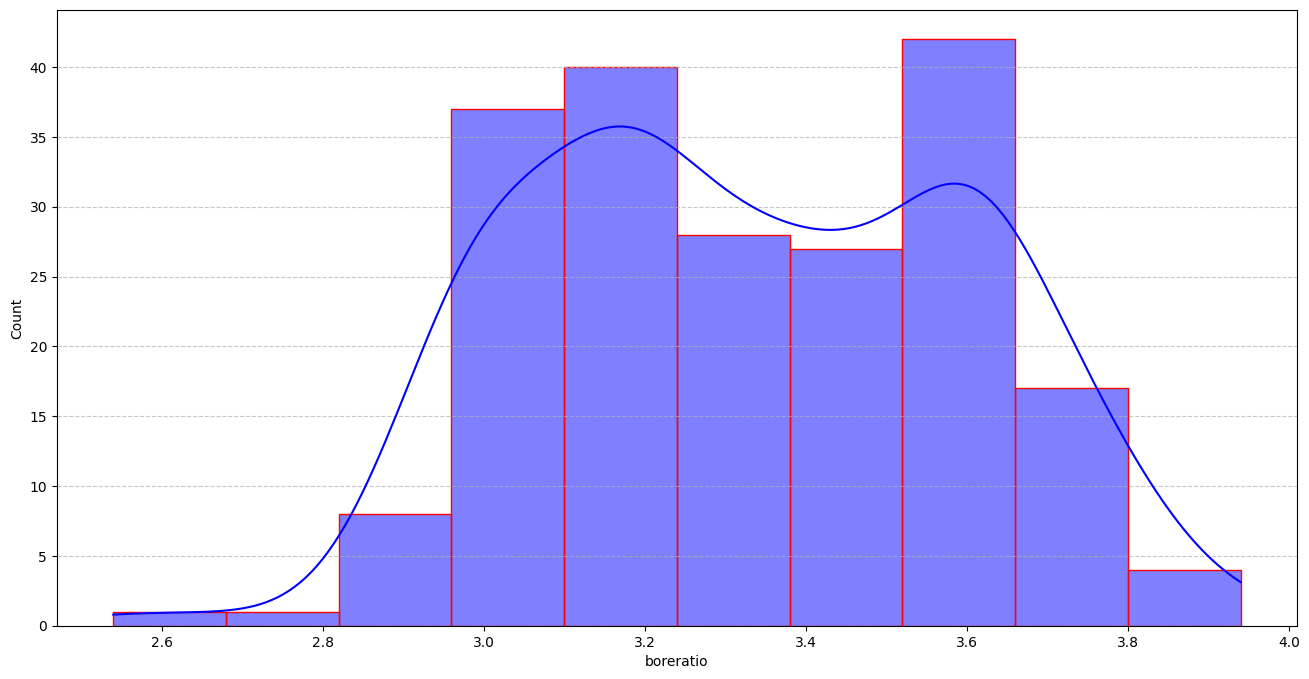

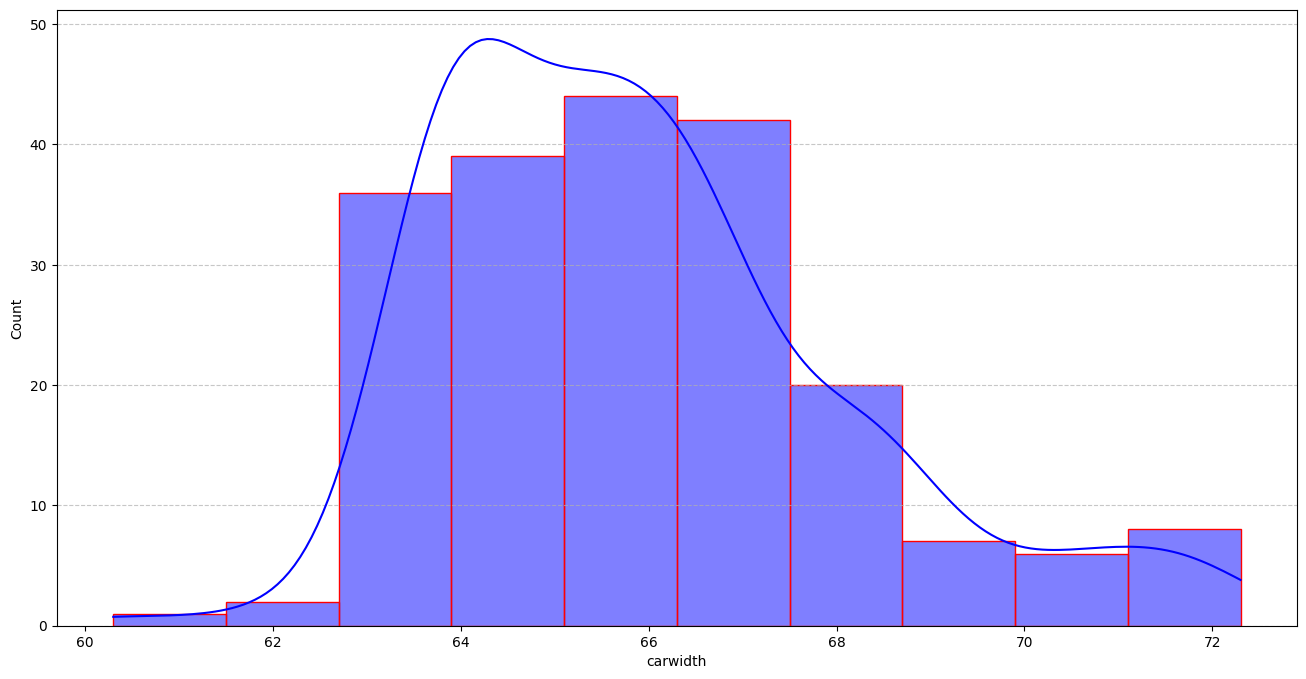

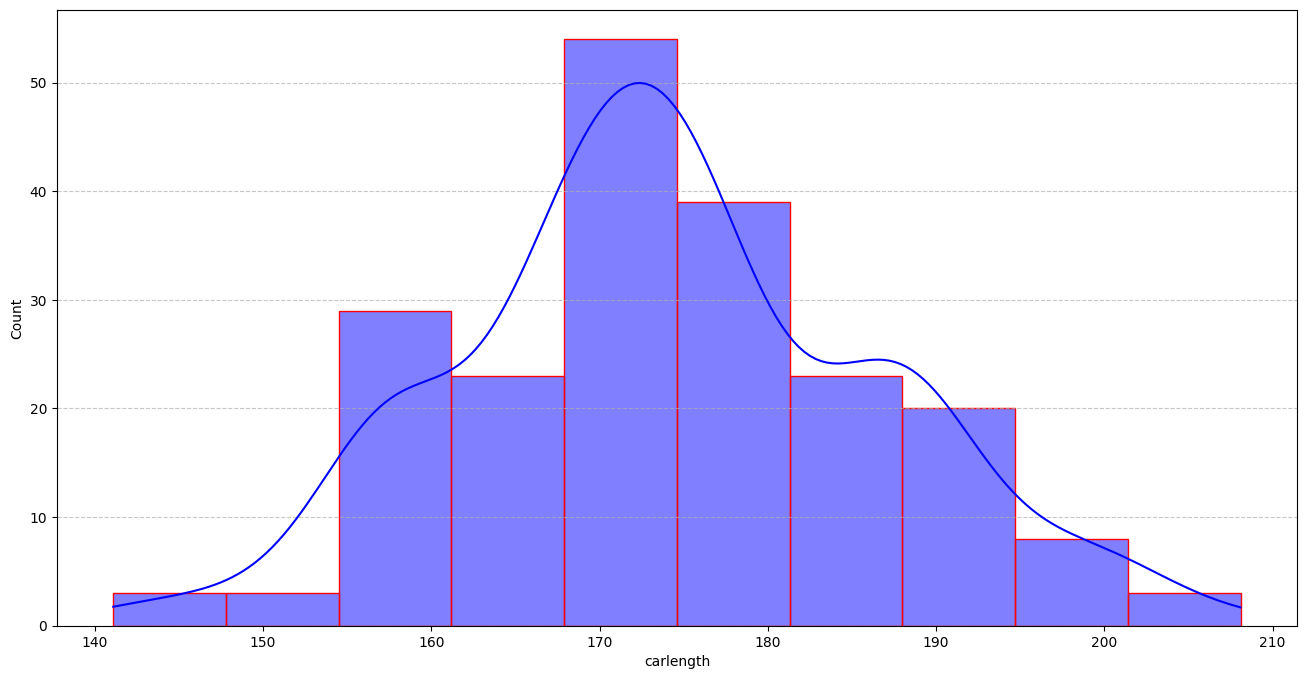

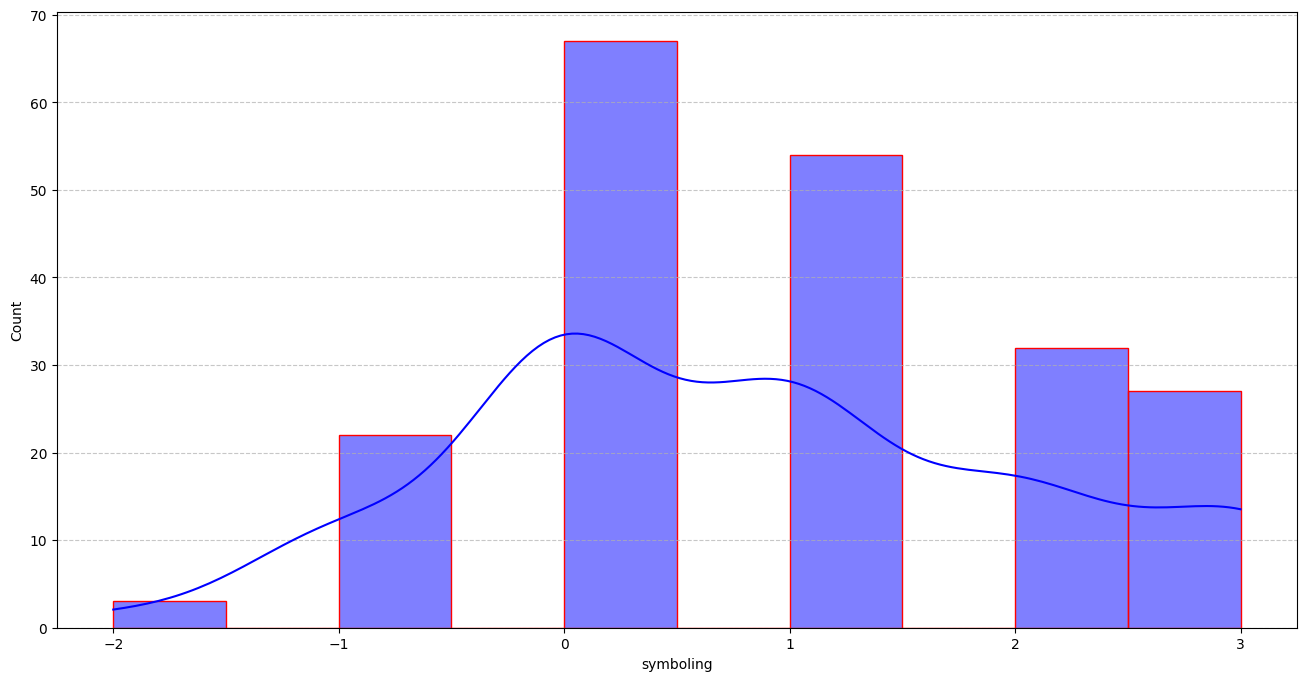

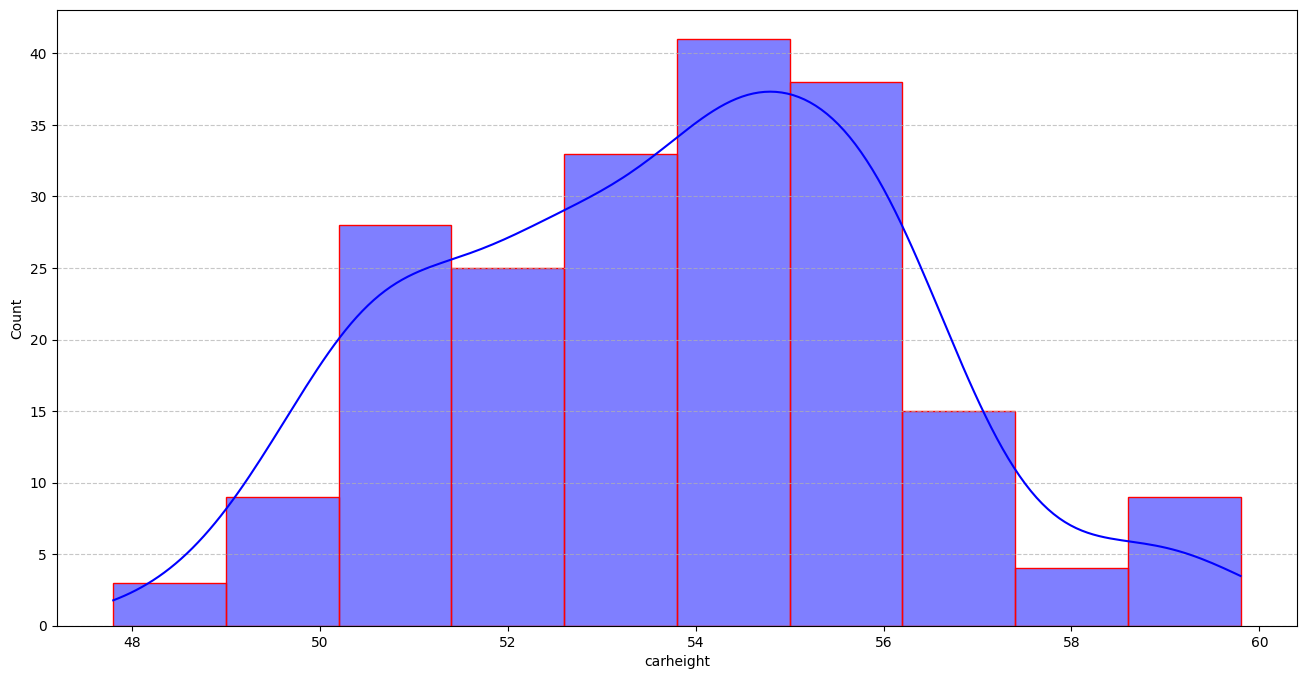

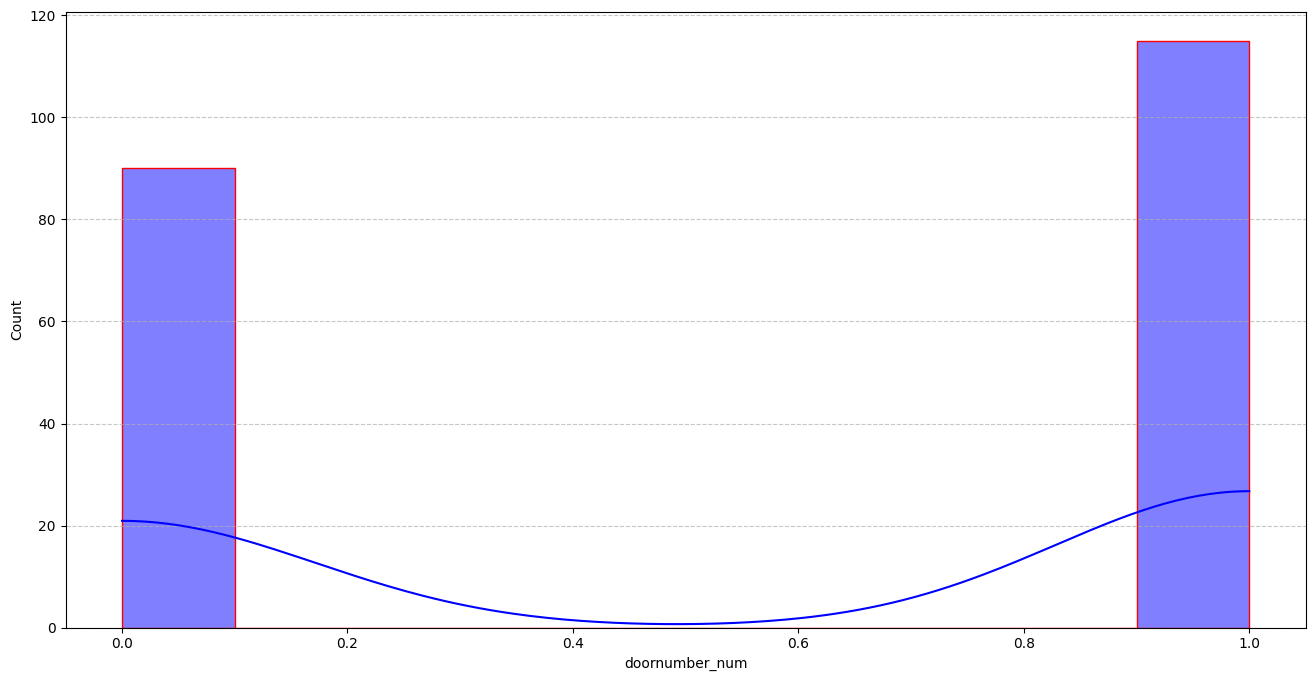

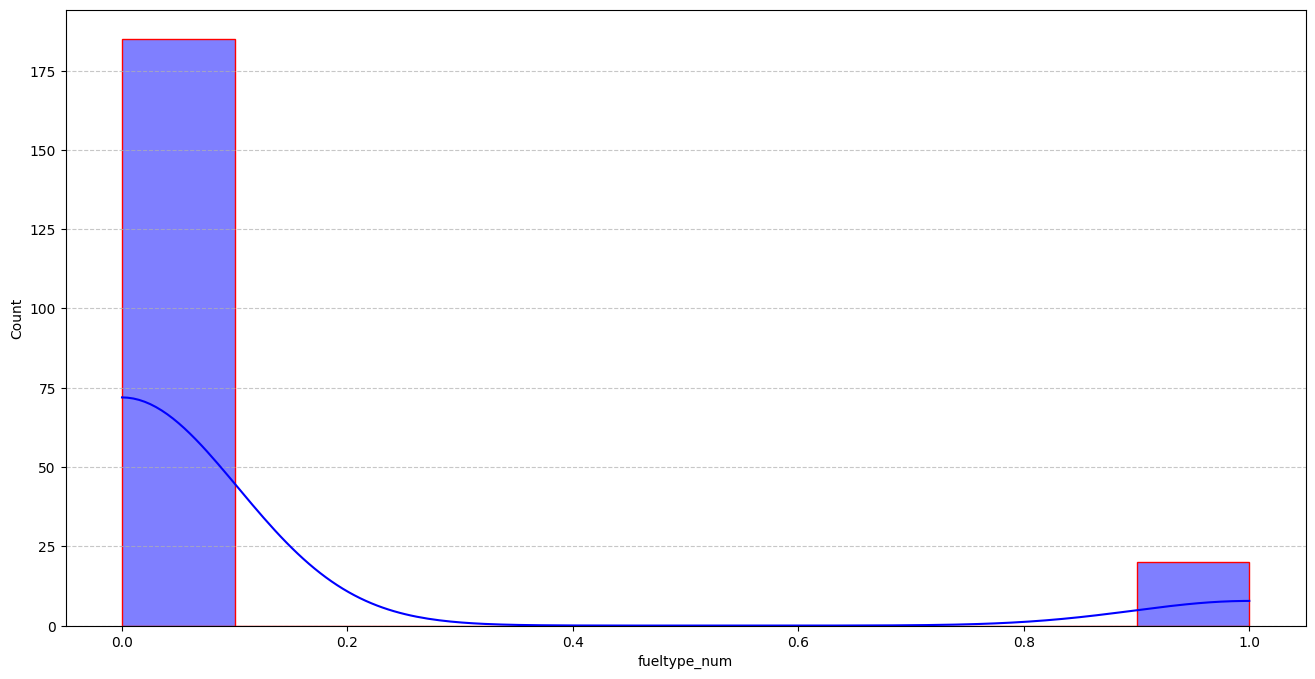

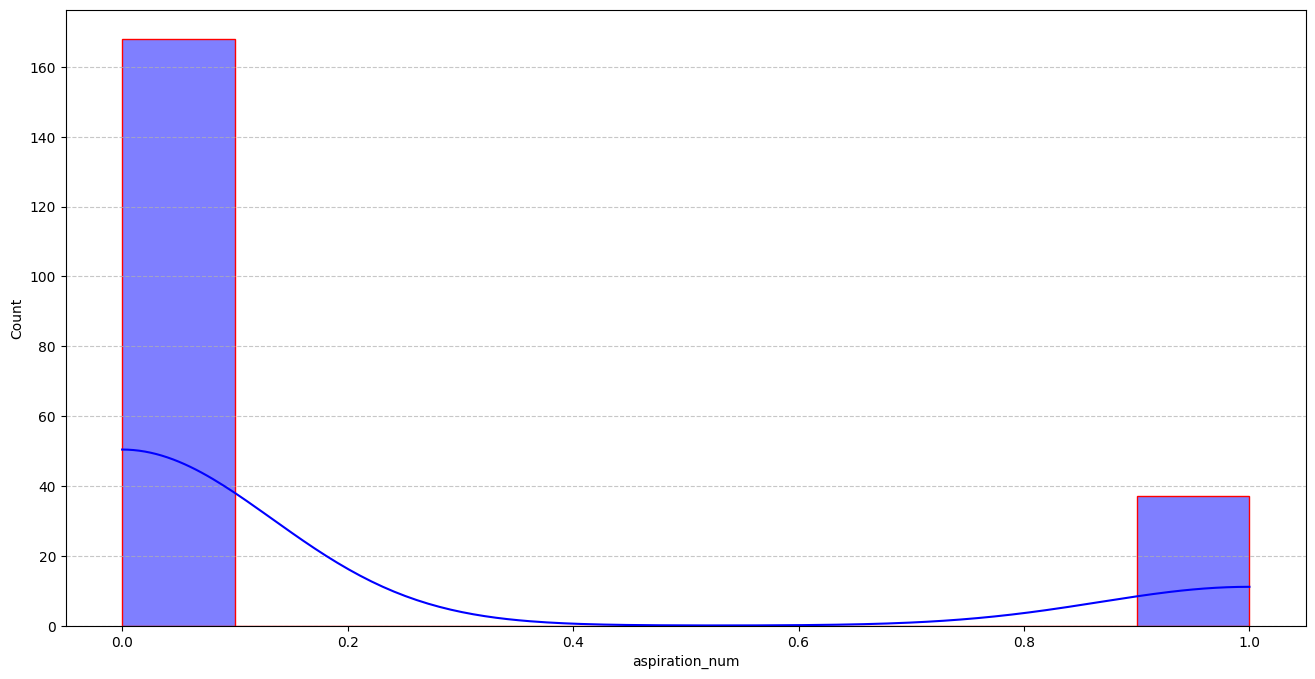

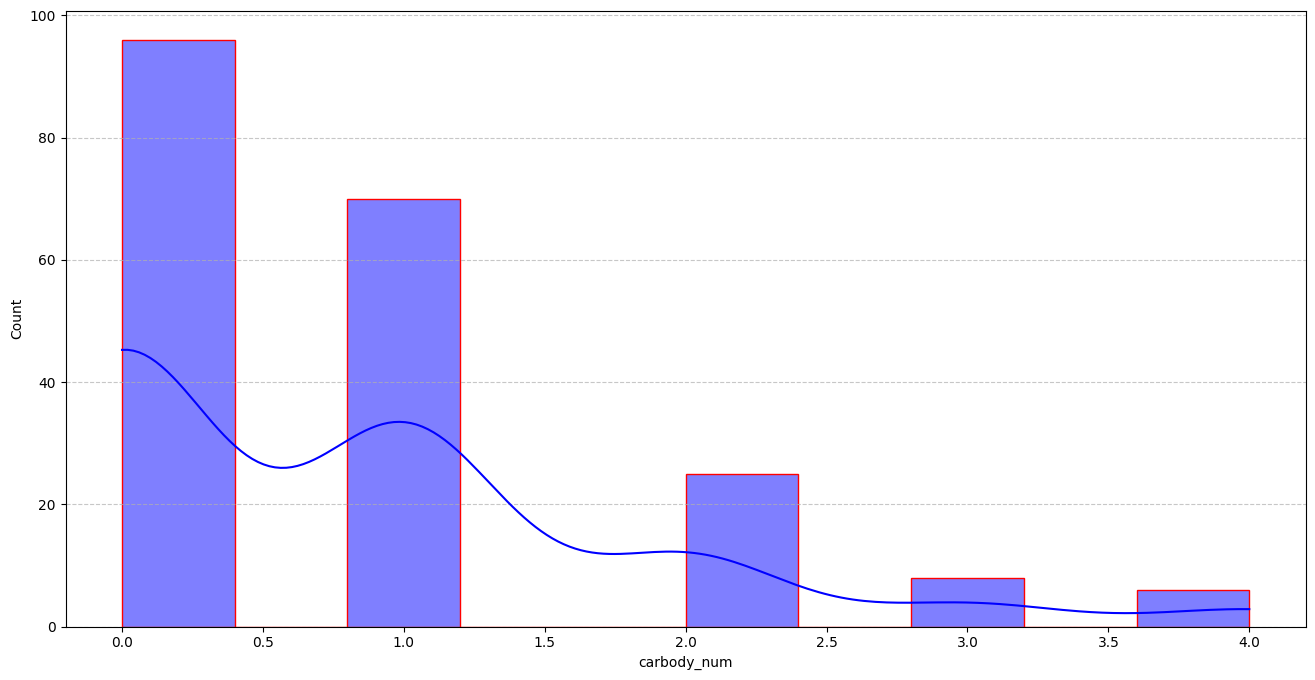

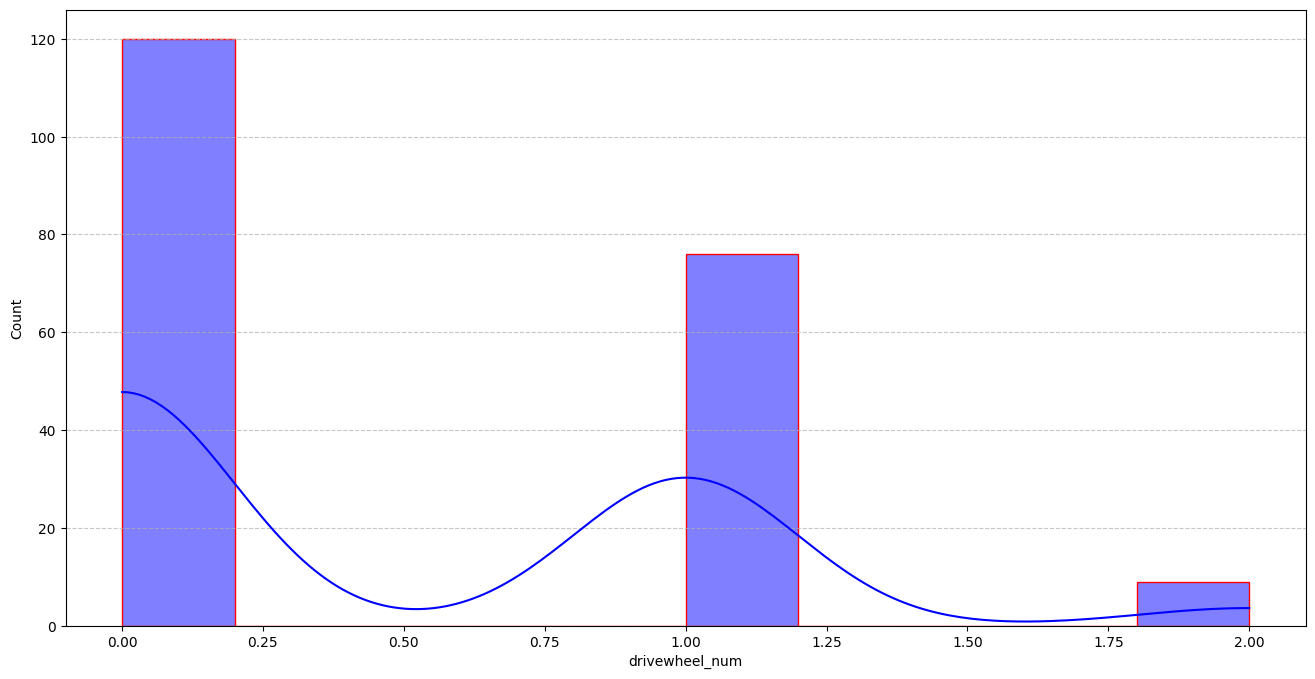

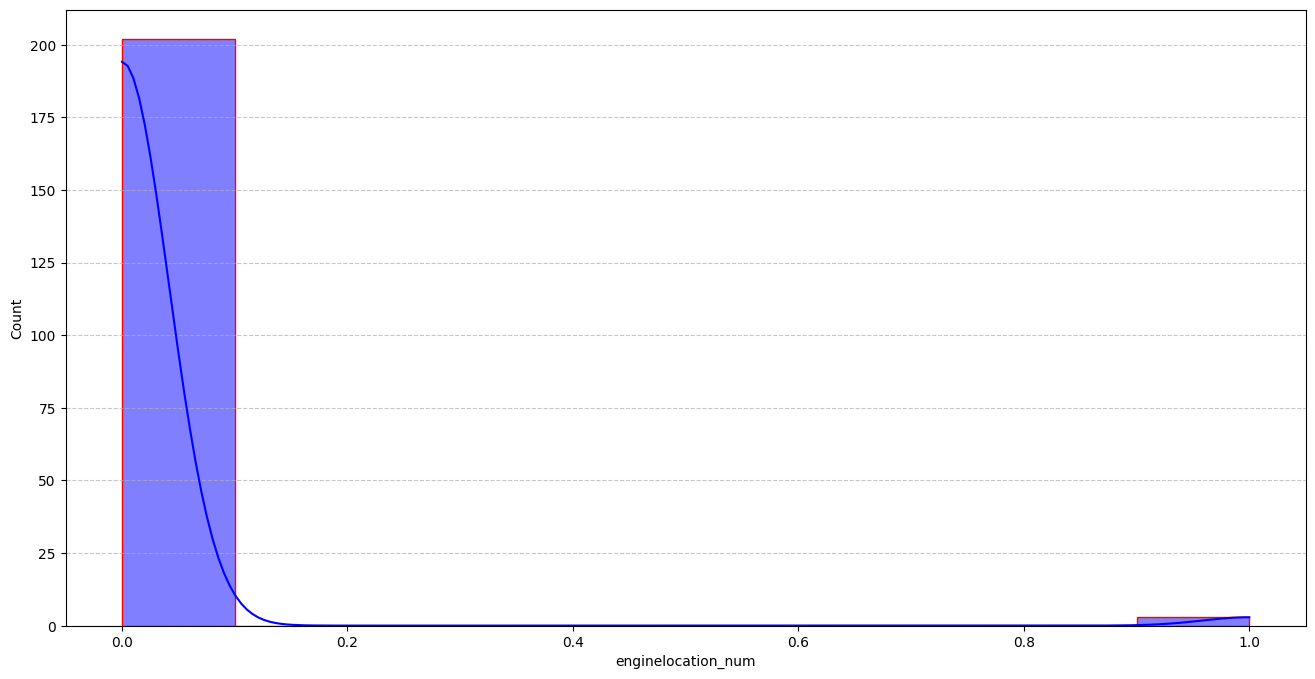

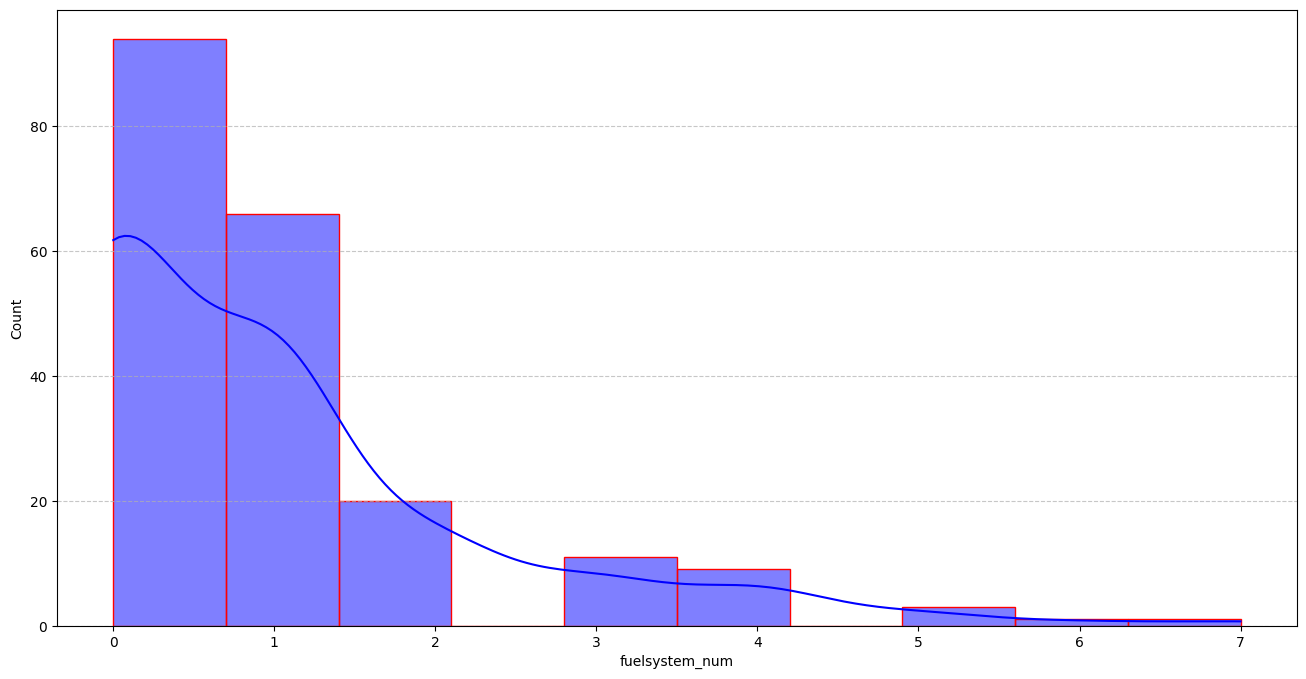

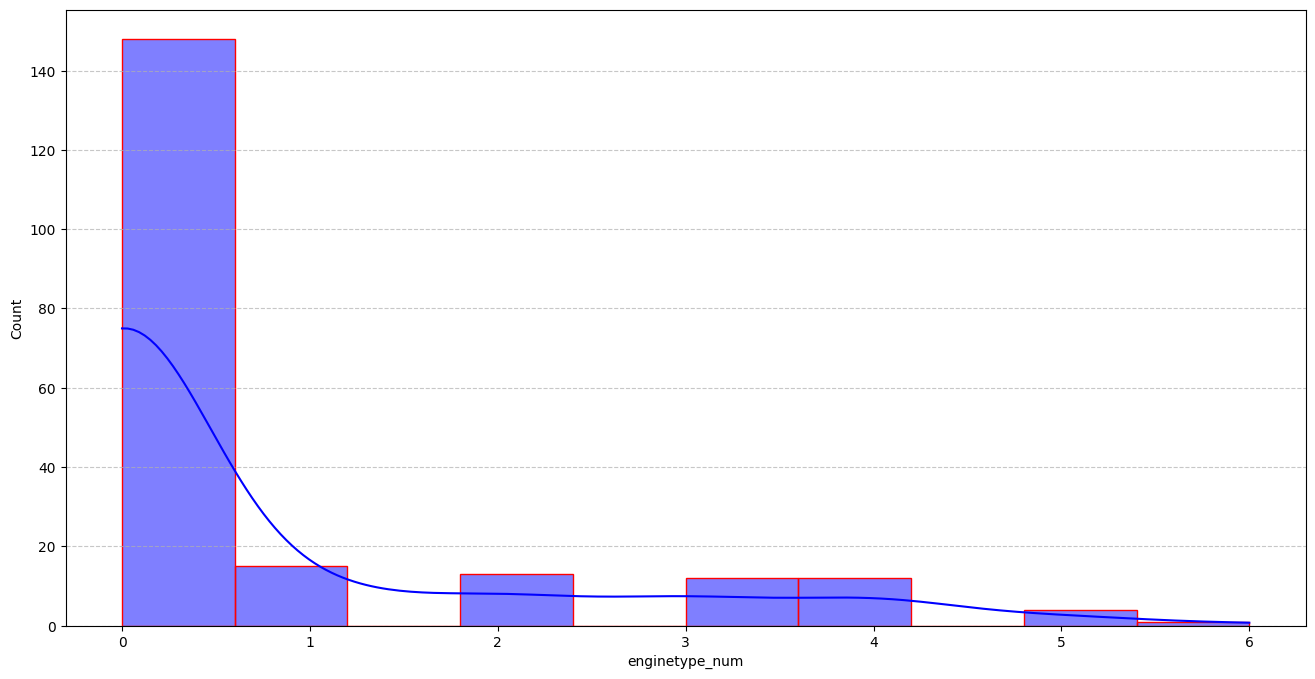

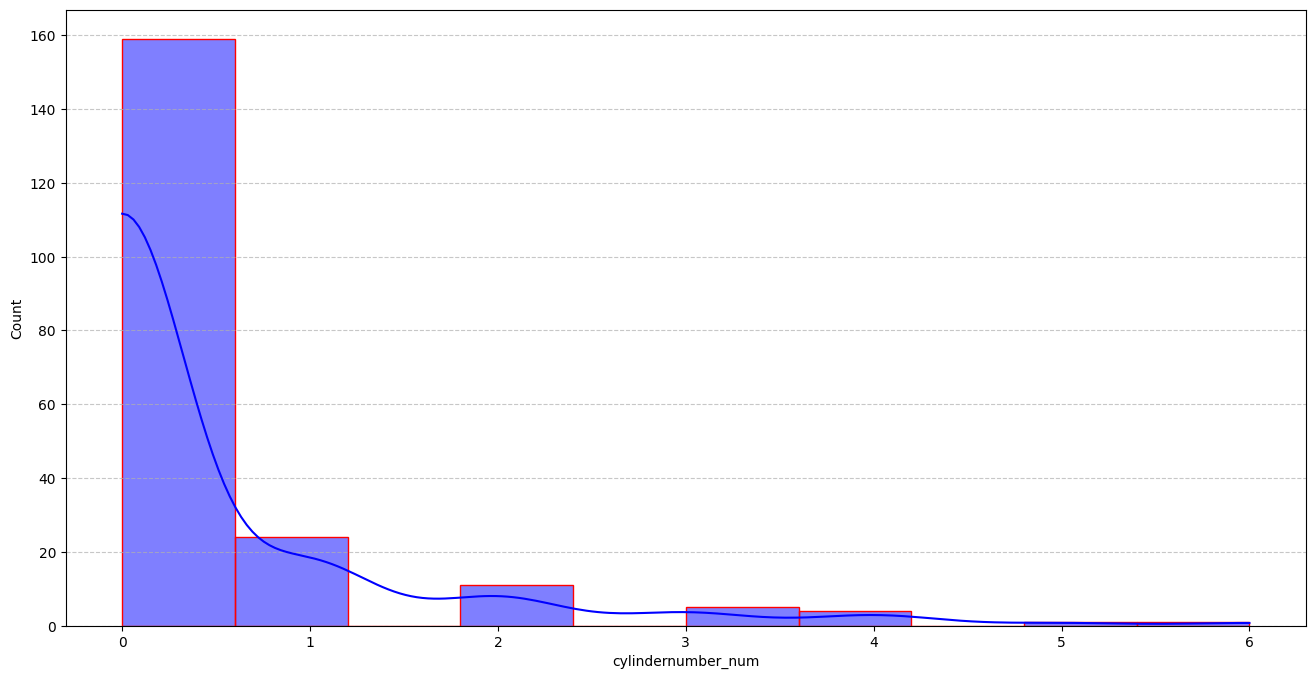

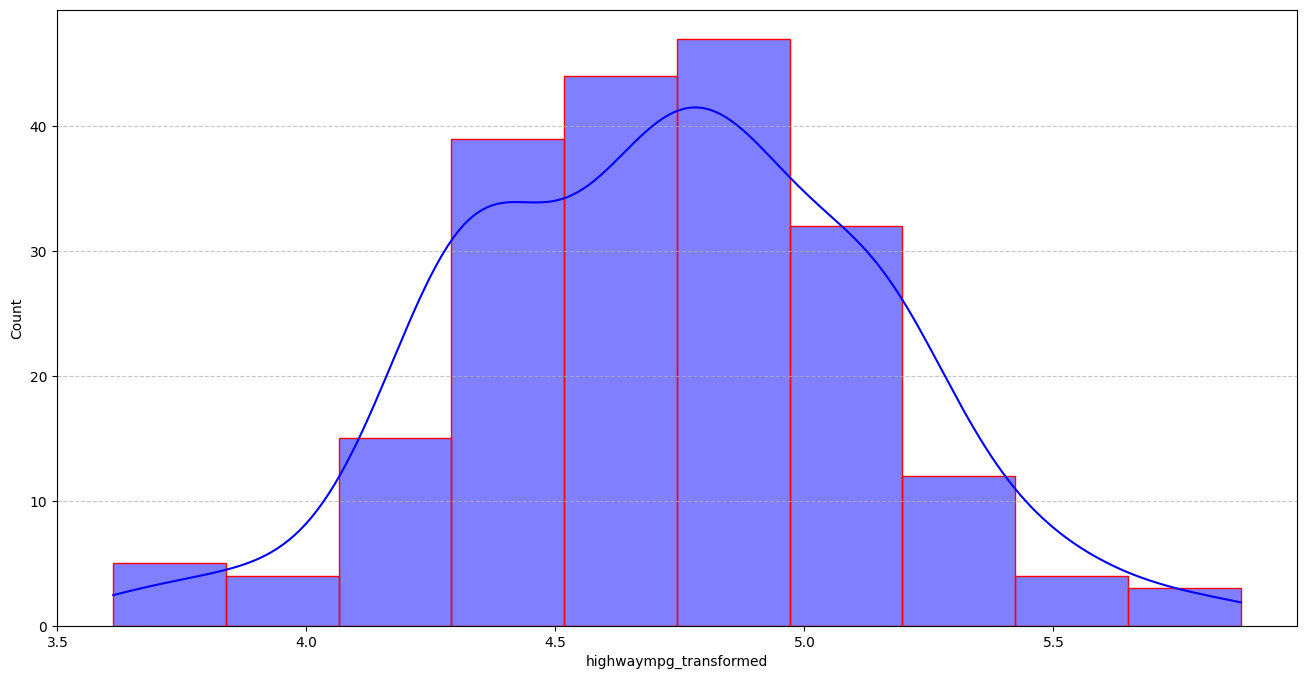

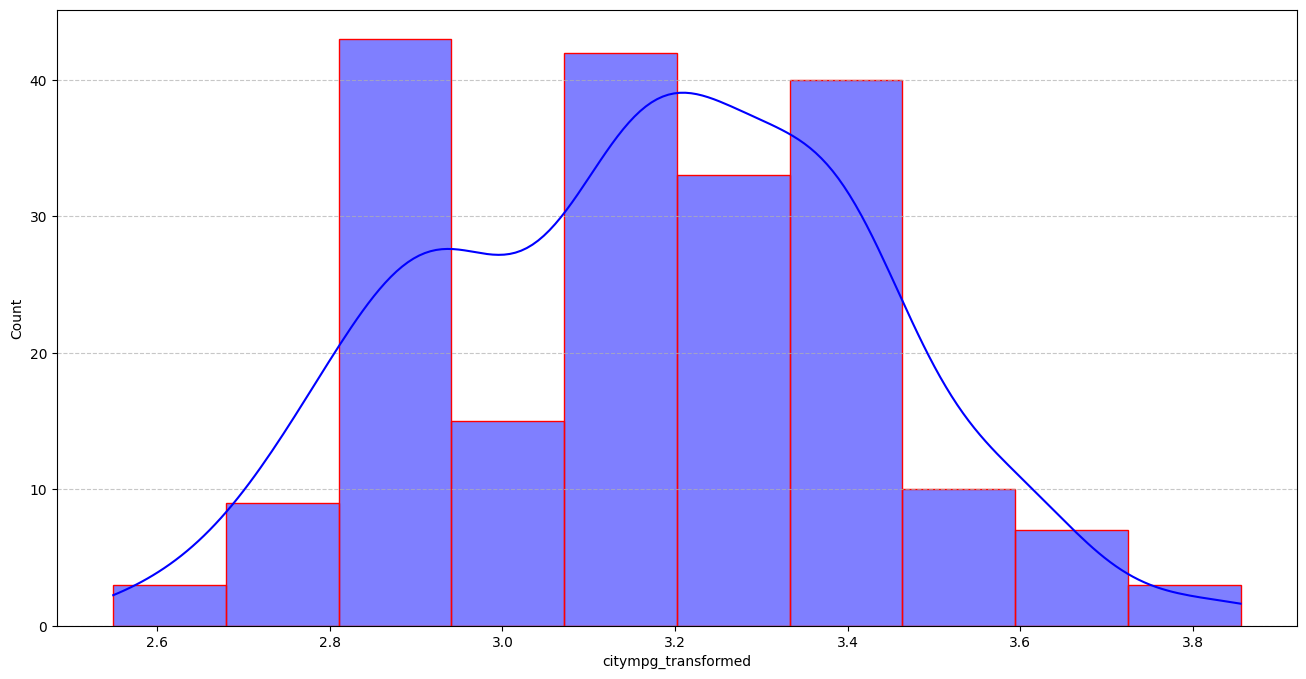

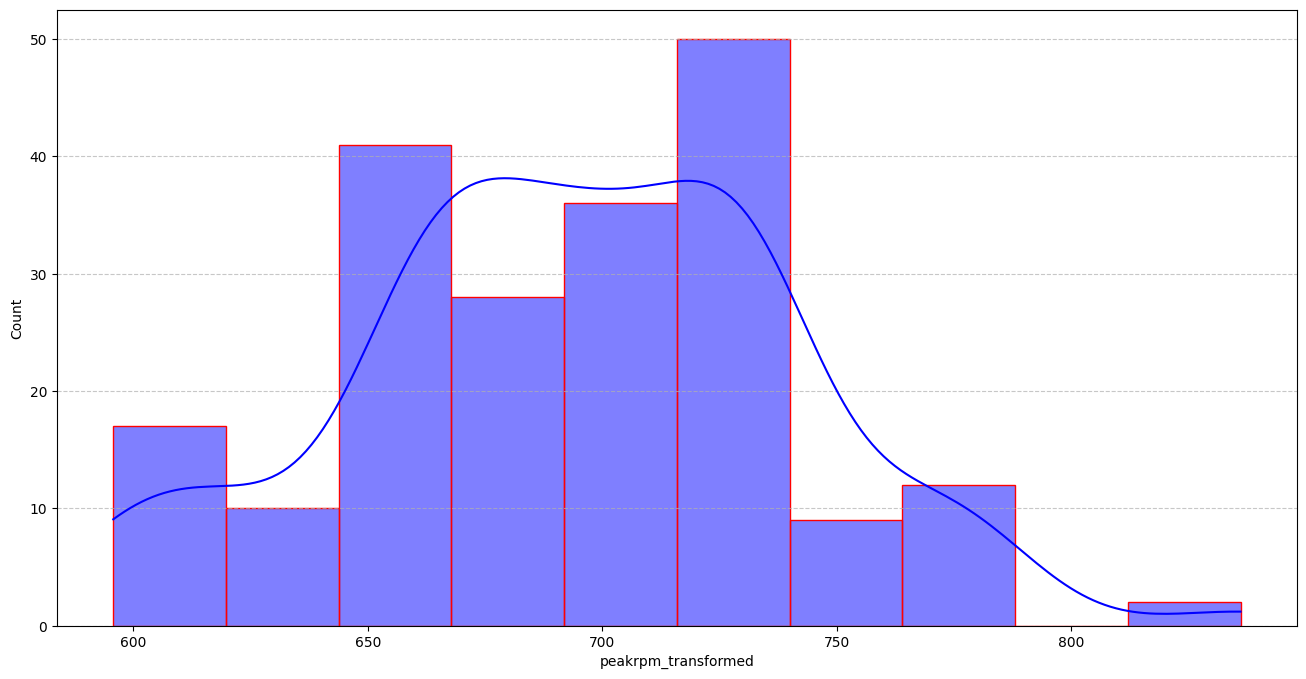

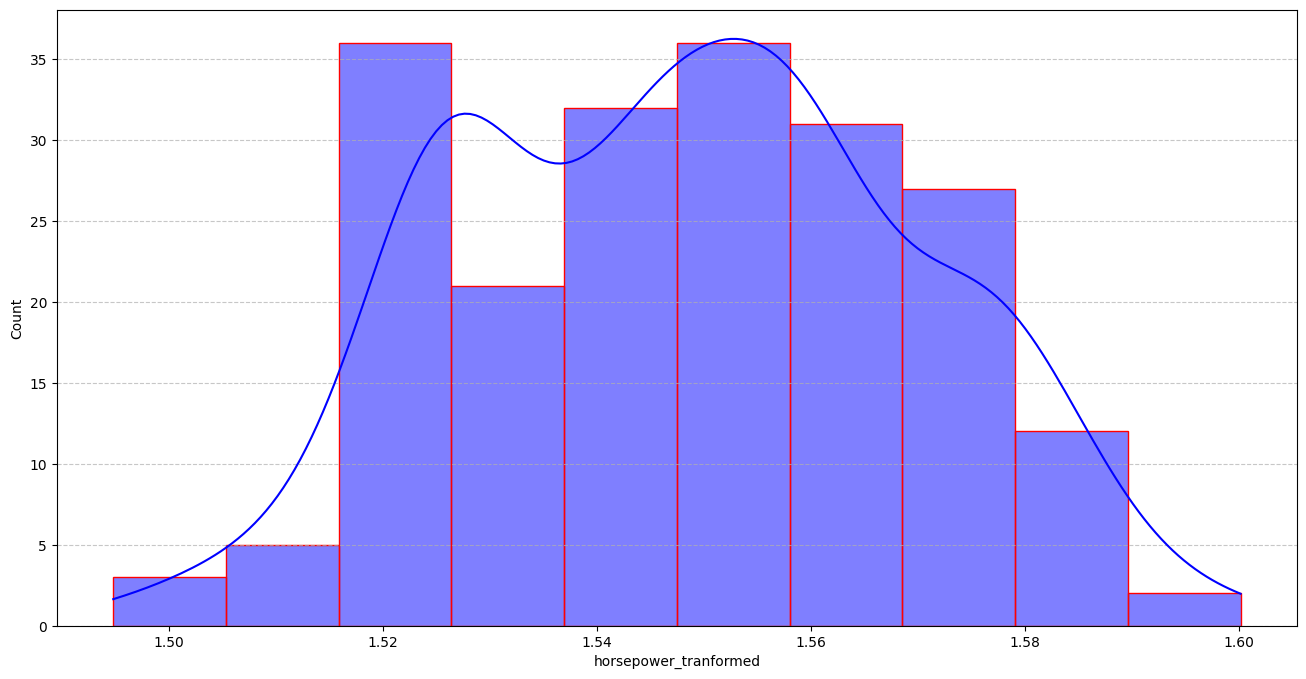

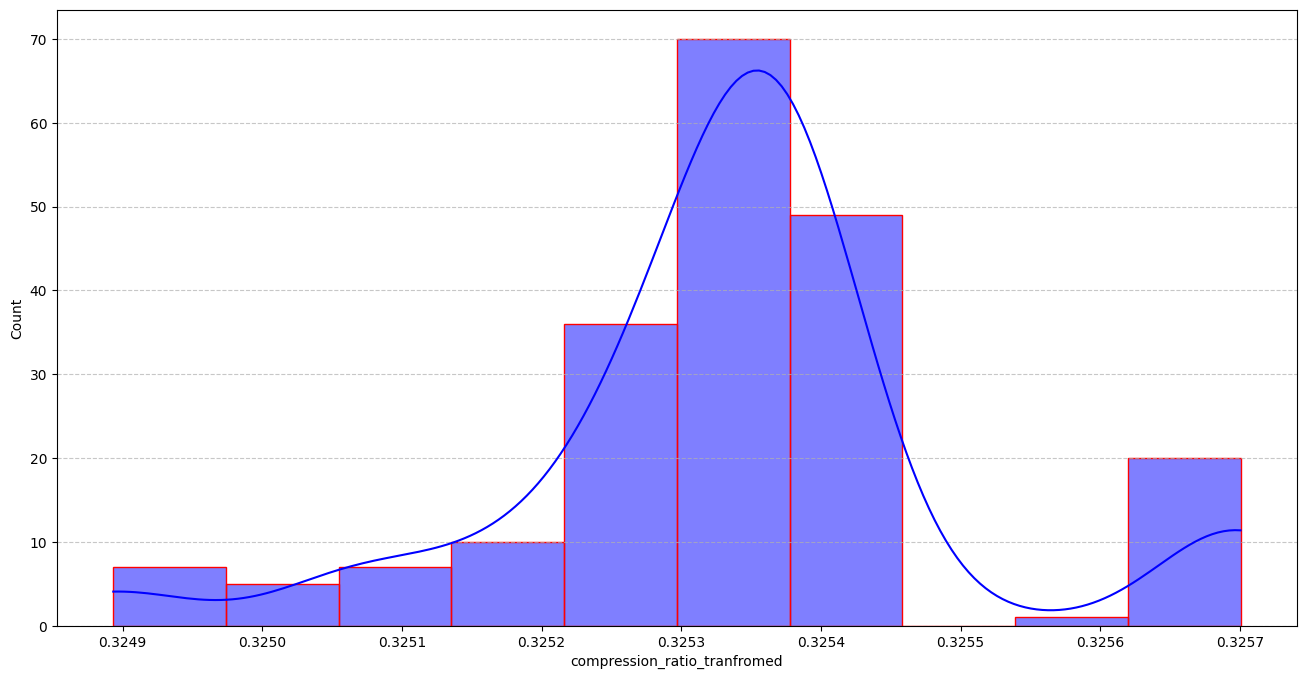

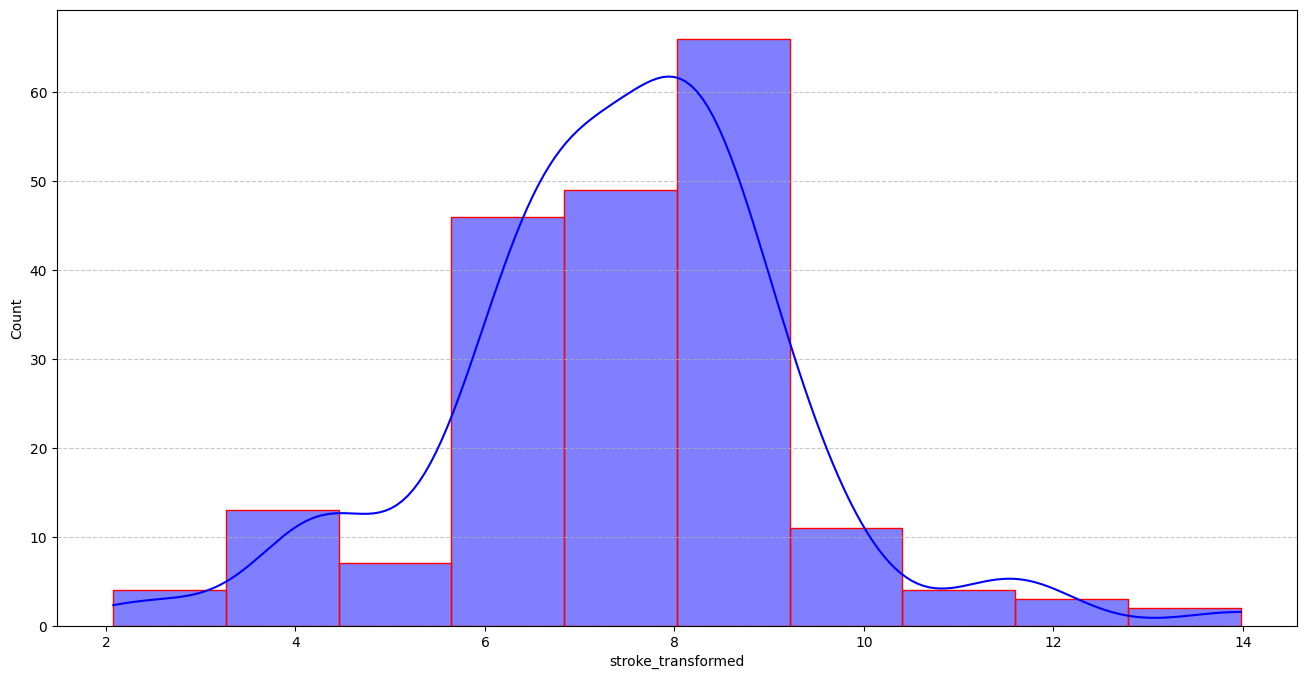

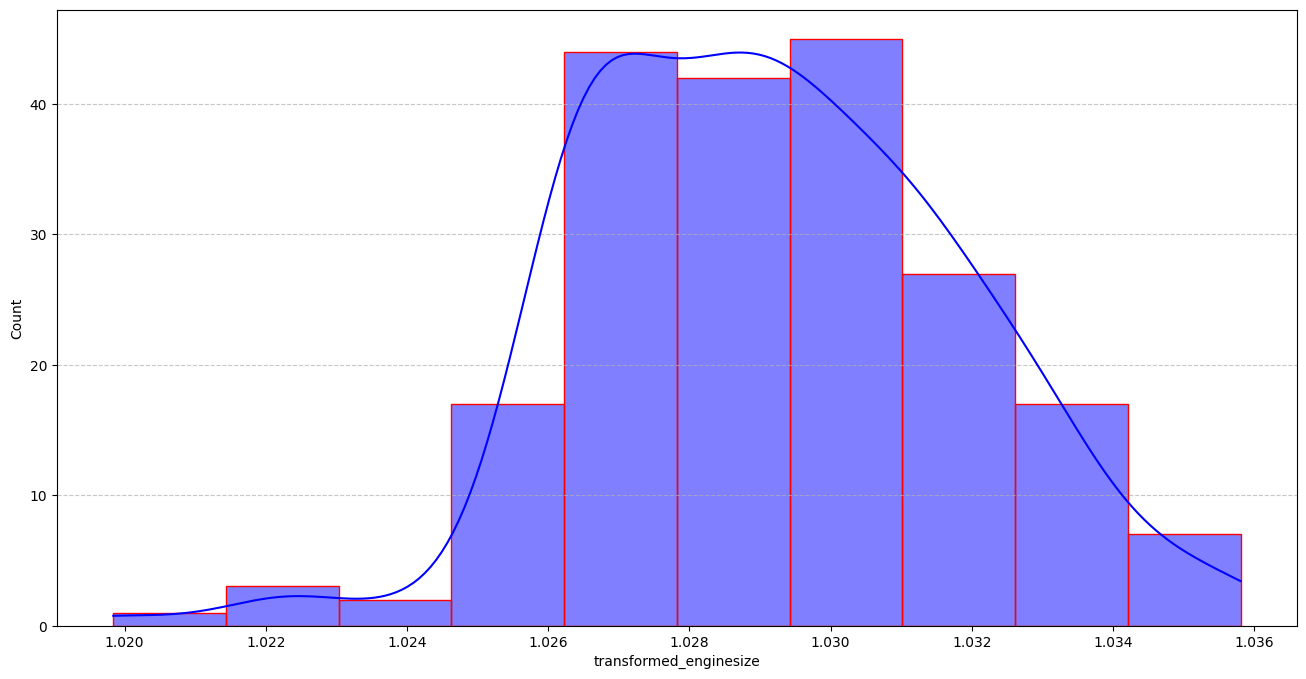

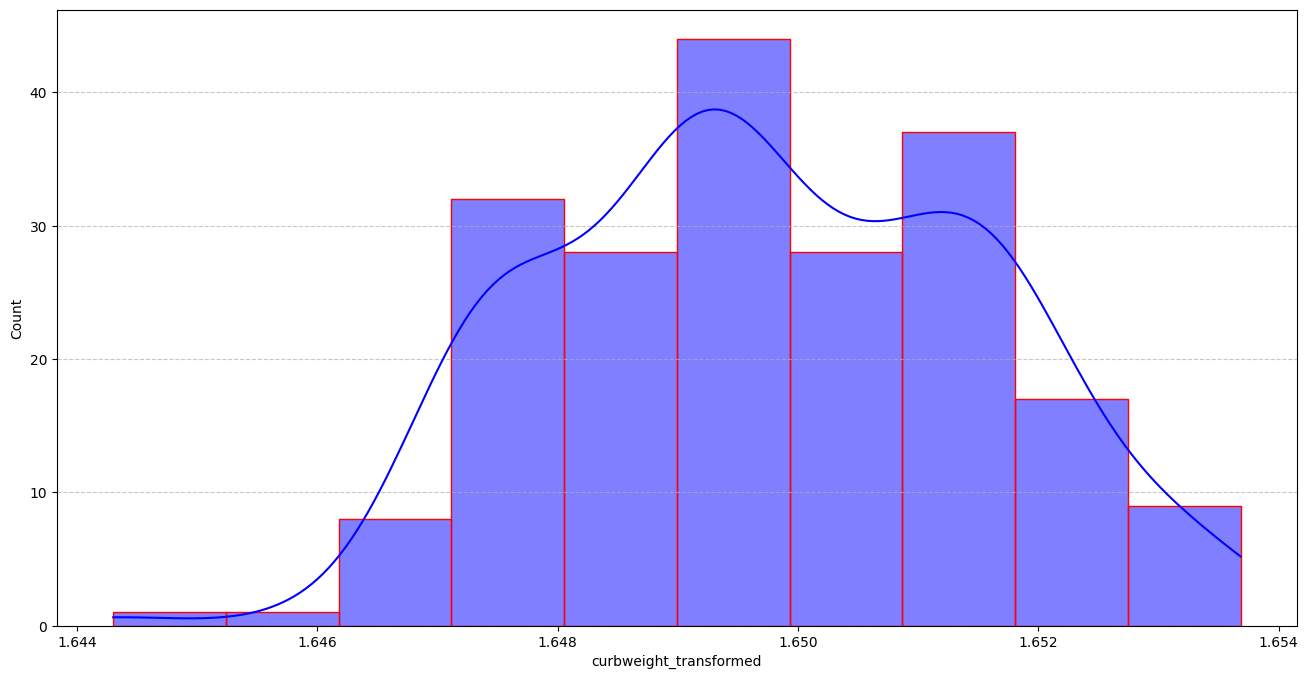

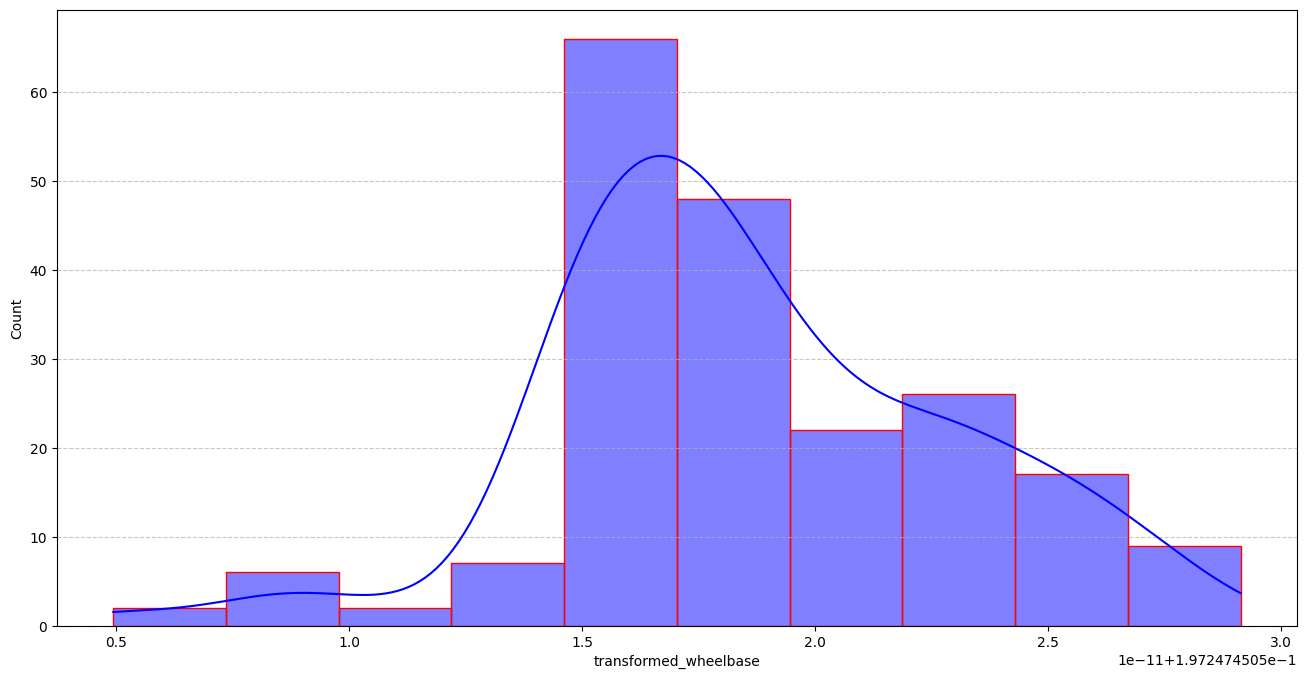

In [45]:
for x in X_BOXCOX:
  histogram(x)

In [46]:
X_BOXCOX.skew()

boreratio                       0.020156
carwidth                        0.904003
carlength                       0.155954
symboling                       0.211072
carheight                       0.063123
doornumber_num                 -0.247552
fueltype_num                    2.732619
aspiration_num                  1.673832
carbody_num                     1.346445
drivewheel_num                  0.843899
enginelocation_num              8.143531
fuelsystem_num                  1.777997
enginetype_num                  1.821598
cylindernumber_num              2.901497
highwaympg_transformed         -0.000576
citympg_transformed             0.000188
peakrpm_transformed            -0.000888
horsepower_tranformed           0.048363
compression_ratio_tranfromed    0.008026
stroke_transformed              0.120019
transformed_enginesize         -0.003189
curbweight_transformed          0.024852
transformed_wheelbase           0.000000
dtype: float64

In [47]:
X_BOXCOX_train, X_BOXCOX_test, y_BOXCOX_train, y_BOXCOX_test = train_test_split(X_BOXCOX, y_BOXCOX_transformed, test_size = 0.3, random_state = 42)
pipeline_BOXCOX = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regression', LinearRegression())
])

pipeline_BOXCOX.fit(X_BOXCOX_train, y_BOXCOX_train)
y_pred_BOXCOX = pipeline_BOXCOX.predict(X_BOXCOX_test)

mse_BOXCOX = mean_squared_error(y_BOXCOX_test, y_pred_BOXCOX)
r2_BOXCOX = r2_score(y_BOXCOX_test, y_pred_BOXCOX)
cross_val_score_train_BOXCOX = cross_val_score(pipeline_BOXCOX, X_BOXCOX_train, y_BOXCOX_train, cv = 5)
cross_val_score_test_linearboxcox = pipeline_BOXCOX.score(X_BOXCOX_test, y_BOXCOX_test)

print(f'Mean Val score on a traine data LinearRegression Boxcox: ', np.mean(cross_val_score_train_BOXCOX))
std_deviation_BOXCOX = np.std(cross_val_score_train_BOXCOX)
print(f'Std_deviation Linear Regression Boxcox: {std_deviation}')

print(f'\nMean Squared Error LinearRegression Boxcox: ', mse_BOXCOX)
print('R2 score: ', r2_BOXCOX)
print(f'cross val on a test data: ', cross_val_score_test_linearboxcox)

Mean Val score on a traine data LinearRegression Boxcox:  0.8519979513497798
Std_deviation Linear Regression Boxcox: 0.03198790031340104

Mean Squared Error LinearRegression Boxcox:  2.54847007949736e-07
R2 score:  0.8562755763774157
cross val on a test data:  0.8562755763774157


<Axes: >

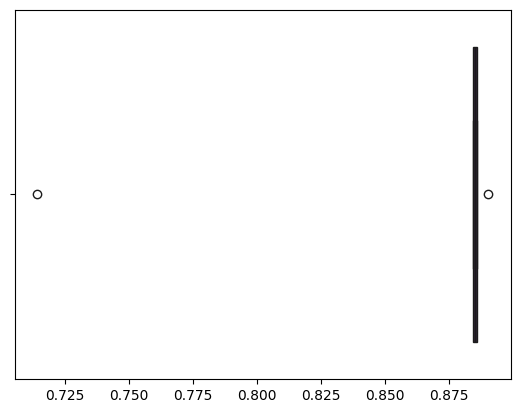

In [48]:
sns.boxplot(x = cross_val_score_train_BOXCOX)

In [64]:
X_Lasso_BOXCOX_train, X_Lasso_BOXCOX_test, y_Lasso_BOXCOX_train, y_Lasso_BOXCOX_test = train_test_split(X_BOXCOX, y_BOXCOX_transformed, test_size = 0.3, random_state = 42)

pipeline_Lasso_BOXCOX = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lasso', Lasso())
])

param_grid_Lasso_BOXCOX = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
}

grid_search_Lasso_BOXCOX = GridSearchCV(pipeline_Lasso_BOXCOX, param_grid_Lasso_BOXCOX, cv = 5, scoring = 'neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_Lasso_BOXCOX.fit(X_Lasso_BOXCOX_train, y_Lasso_BOXCOX_train)

y_Lasso_BOXCOX_pred = grid_search_Lasso_BOXCOX.predict(X_Lasso_BOXCOX_test)

cross_val_score_Lasso_BOXCOX_train = cross_val_score(pipeline_Lasso_BOXCOX, X_Lasso_BOXCOX_train, y_Lasso_BOXCOX_train, cv = 5, scoring = 'neg_mean_squared_error')
std_deviation_BOXCOX_Lasso = np.std(cross_val_score_Lasso_BOXCOX_train)
MSE_Lasso_BOXCOX = mean_squared_error(y_Lasso_BOXCOX_test, y_Lasso_BOXCOX_pred)

R2_score_BOXCOX_Lasso = r2_score(y_Lasso_BOXCOX_test, y_Lasso_BOXCOX_pred)

print(f'Best_Params_Lasso_BOXCOX: ', grid_search_Lasso_BOXCOX.best_params_)
print(f'Best MSE_Lasso_BOXCOX: ', -grid_search_Lasso_BOXCOX.best_score_)
print(f'R2 score Lasso_BOXCOX: ', R2_score_Lasso)
print(f'\nMean score on a traine data Lasso Boxcox: ', -np.mean(cross_val_score_Lasso_BOXCOX_train))
print(f'MSE Lasso Boxcox: ', MSE_Lasso_BOXCOX)
print(f'Std_crossval_Lasso_BOXCOX: ', std_deviation_BOXCOX_Lasso)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best_Params_Lasso_BOXCOX:  {'lasso__alpha': 0.001}
Best MSE_Lasso_BOXCOX:  1.8223159812976253e-06
R2 score Lasso_BOXCOX:  0.8603191422210479

Mean score on a traine data Lasso Boxcox:  1.8223159812976253e-06
MSE Lasso Boxcox:  1.7912670872358983e-06
Std_crossval_Lasso_BOXCOX:  2.6340906613862107e-07


<Axes: >

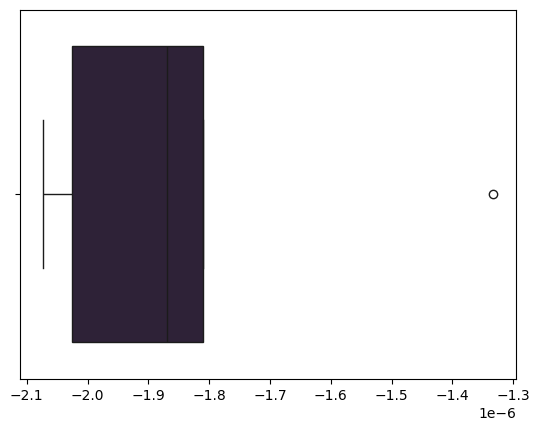

In [50]:
sns.boxplot(x = cross_val_score_Lasso_BOXCOX_train)

In [51]:
X_ridge_BOXCOX_train, X_ridge_BOXCOX_test, y_ridge_BOXCOX_train, y_ridge_BOXCOX_test = train_test_split(X_BOXCOX, y_BOXCOX_transformed, test_size = 0.3, random_state = 42)

Pipeline_Ridge_BOXCOX = Pipeline([
    ('scaler', MinMaxScaler()),
    ('ridge', Ridge())
])

param_grid_Ridge_BOXCOX = {
    'ridge__alpha' : [0.1, 1.0, 10.0],
    'ridge__solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

grid_search_Ridge_BOXCOX = GridSearchCV(Pipeline_Ridge_BOXCOX, param_grid_Ridge_BOXCOX, cv = 5, scoring = 'neg_mean_squared_error', n_jobs=-1)
grid_search_Ridge_BOXCOX.fit(X_ridge_BOXCOX_train, y_ridge_BOXCOX_train)
y_pred_ridge_BOXCOX = grid_search_Ridge_BOXCOX.predict(X_ridge_BOXCOX_test)

cross_val_score_ridge_BOXCOX_train = cross_val_score(Pipeline_Ridge_BOXCOX, X_ridge_BOXCOX_train, y_ridge_BOXCOX_train, cv = 5, scoring = 'neg_mean_squared_error')
std_deviation_ridge_BOXCOX = np.std(cross_val_score_ridge_BOXCOX_train)
mse_test_Ridge_BoxCox = mean_squared_error(y_ridge_BOXCOX_test, y_pred_ridge_BOXCOX)

r2_score_ridge_BOXCOX = r2_score(y_ridge_BOXCOX_test, y_pred_ridge_BOXCOX)

print(f'Best Params Ridge Boxcox: ', grid_search_Ridge_BOXCOX.best_params_)
print(f'Best Score Ridge Boxcox: ', -grid_search_Ridge_BOXCOX.best_score_)
print(f'\nR2 score Ridge Boxcox: ', r2_score_ridge_BOXCOX)
print(f'\nCross Val on a traine Data Ridge Boxcox: ', -np.mean(cross_val_score_ridge_BOXCOX_train))
print("MSE on test data Ridge Boxcox:", mse_test_Ridge_BoxCox)
print(f'STD Deviation cross_val Ridge Boxcox: ', std_deviation_ridge_BOXCOX)

Best Params Ridge Boxcox:  {'ridge__alpha': 0.1, 'ridge__solver': 'svd'}
Best Score Ridge Boxcox:  2.418580536371305e-07

R2 score Ridge Boxcox:  0.8633861249265162

Cross Val on a traine Data Ridge Boxcox:  2.4233682777749357e-07
MSE on test data Ridge Boxcox: 2.4223883755708133e-07
STD Deviation cross_val Ridge Boxcox:  3.967496469327138e-08


<Axes: >

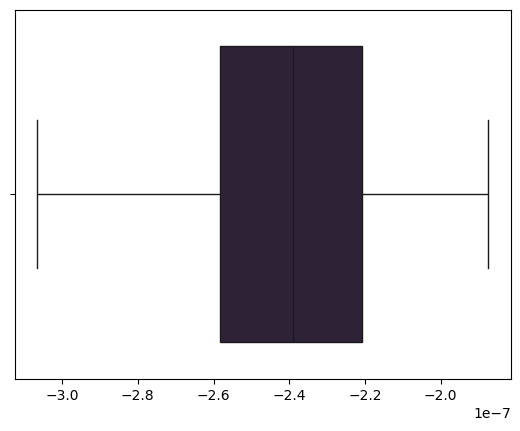

In [52]:
sns.boxplot(x = cross_val_score_ridge_BOXCOX_train)

In [53]:
X_XGboost_BOXCOX_train, X_XGBBoost_BOXCOX_test, y_XGBBoost_BOXCOX_train, y_XGBBoost_BOXCOX_test = train_test_split(X_BOXCOX, y_BOXCOX_transformed, test_size = 0.3, random_state = 42)

Pipeline_XGB_BOXCOX = Pipeline([
    ('scaler', MinMaxScaler()),
    ('xgbreg', xgb.XGBRegressor(objective='reg:squarederror'))
])

param_grid_xgb_boxcox = {
    'xgbreg__n_estimators': [100, 200],
    'xgbreg__max_depth': [3, 4, 5],
    'xgbreg__learning_rate': [0.01, 0.1],
    'xgbreg__subsample': [0.8, 1.0]
}

grid_search_XGB_boxcox = GridSearchCV(Pipeline_XGB_BOXCOX, param_grid_xgb_boxcox, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_XGB_boxcox.fit(X_XGboost_BOXCOX_train, y_XGBBoost_BOXCOX_train)
y_XGB_BOXCOX_pred = grid_search_XGB_boxcox.predict(X_XGBBoost_BOXCOX_test)

cross_val_score_XGB_BOXCOX_train = cross_val_score(Pipeline_XGB_BOXCOX, X_XGboost_BOXCOX_train, y_XGBBoost_BOXCOX_train, cv = 5)
std_deviation_XGB_BOXCOX = np.std(cross_val_score_XGB_BOXCOX_train)
mse_test_XGB_BoxCox = mean_squared_error(y_ridge_BOXCOX_test, y_pred_ridge_BOXCOX)

R2_score_XGB_BOXCOX = r2_score(y_XGBBoost_BOXCOX_test, y_XGB_BOXCOX_pred)

print(f'Best Params XGB Boxcox: ', grid_search_XGB_boxcox.best_params_)
print(f'Best Score XGB Boxcox: ', -grid_search_XGB_boxcox.best_score_)
print(f'\nCross Val on a traine Data XGB Boxcox: ', np.mean(cross_val_score_XGB_BOXCOX_train))
print(f'STD Deviation cross_val XGB Boxcox: ', std_deviation_XGB_BOXCOX)
print("MSE on test data XGB Boxcox:", mse_test_XGB_BoxCox)
print(f'\nR2 score XGB Boxcox: ', R2_score_XGB_BOXCOX)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params XGB Boxcox:  {'xgbreg__learning_rate': 0.1, 'xgbreg__max_depth': 3, 'xgbreg__n_estimators': 200, 'xgbreg__subsample': 0.8}
Best Score XGB Boxcox:  2.1765704572085556e-07

Cross Val on a traine Data XGB Boxcox:  0.8605996778245775
STD Deviation cross_val XGB Boxcox:  0.0627562088722231
MSE on test data XGB Boxcox: 2.4223883755708133e-07

R2 score XGB Boxcox:  0.8764342397831713


<Axes: >

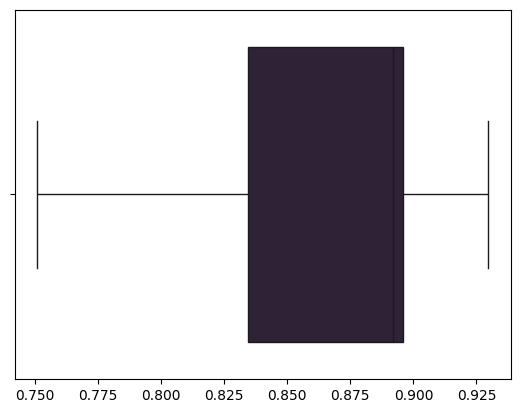

In [54]:
sns.boxplot(x = cross_val_score_XGB_BOXCOX_train)

In [55]:
print(f'Mean Val score on a traine data LinearRegression: ', np.mean(cross_val_score_train))
print(f'Mean Val score on a test data LinearRegression: ', np.mean(cross_val_score_test))
print(f'Std_deviation LinearRegression: {std_deviation}')
print(f'Mean Squared Error LinearRegression: ', mse)
print('R2 score LinearRegression: ', r2)

print(f'\nBest MSE Lasso: ', -grid_search_Lasso.best_score_)
print(f'Mean score on a traine data Lasso: ', np.mean(cross_val_score_Lasso_train))
print(f'Std_crossval_Lasso: ', std_deviation_Lasso)
print(f'MSE Lasso: ', MSE_Lasso)
print(f'R2 score Lasso: ', R2_score_Lasso)

print(f'\nBest Score Ridge: ', -grid_search_Ridge.best_score_)
print(f'Cross Val on a traine Data Ridge: ', np.mean(cross_val_score_ridge_train))
print(f'STD Deviation cross_val Ridge: ', std_deviation_ridge)
print(f'MSE Ridge: ', MSE_Ridge)
print(f'R2 score Ridge: ', r2_score_ridge)

print(f'\nBest Score XGB: ', grid_search_XGB.best_score_)
print(f'Cross Val on a traine Data XGB: ', np.mean(cross_val_score_XGB_train))
print(f'STD Deviation cross_val XGB: ', std_deviation_XGB)
print(f'MSE XGB: ', MSE_XGB)
print(f'R2 score XGB: ', R2_score_XGB )

print(f'\nMean Val score on a traine data LinearRegression Boxcox: ', np.mean(cross_val_score_train_BOXCOX))
print(f'cross val on a test data: ', cross_val_score_test_linearboxcox)
print(f'Std_deviation Linear Regression Boxcox: {std_deviation}')
print(f'Mean Squared Error LinearRegression Boxcox: ', mse_BOXCOX)
print('R2 score: ', r2_BOXCOX)

print(f'\nBest Score_Lasso_BOXCOX: ', -grid_search_Lasso_BOXCOX.best_score_)
print(f'Mean score on a traine data Lasso Boxcox: ', -np.mean(cross_val_score_Lasso_BOXCOX_train))
print(f'Std_crossval_Lasso_BOXCOX: ', std_deviation_BOXCOX_Lasso)
print(f'MSE Lasso Boxcox: ', MSE_Lasso_BOXCOX)
print(f'R2 score Lasso_BOXCOX: ', R2_score_Lasso)

print(f'\nBest Score Ridge Boxcox: ', -grid_search_Ridge_BOXCOX.best_score_)
print(f'Cross Val on a traine Data Ridge Boxcox: ', -np.mean(cross_val_score_ridge_BOXCOX_train))
print(f'STD Deviation cross_val Ridge Boxcox: ', std_deviation_ridge_BOXCOX)
print(f"MSE on test data Ridge Boxcox:", mse_test_Ridge_BoxCox)
print(f'R2 score Ridge Boxcox: ', r2_score_ridge_BOXCOX)

print(f'\nBest Score XGB Boxcox: ', -grid_search_XGB_boxcox.best_score_)
print(f'Cross Val on a traine Data XGB Boxcox: ', np.mean(cross_val_score_XGB_BOXCOX_train))
print(f'STD Deviation cross_val XGB Boxcox: ', std_deviation_XGB_BOXCOX)
print(f"MSE on test data XGB Boxcox:", mse_test_XGB_BoxCox)
print(f'R2 score XGB Boxcox: ', R2_score_XGB_BOXCOX)

Mean Val score on a traine data LinearRegression:  0.813383265907482
Mean Val score on a test data LinearRegression:  0.8688775368513598
Std_deviation LinearRegression: 0.03198790031340104
Mean Squared Error LinearRegression:  9084738.38123365
R2 score LinearRegression:  0.8688775368513598

Best MSE Lasso:  9986538.112969806
Mean score on a traine data Lasso:  0.8191608348503587
Std_crossval_Lasso:  0.02953690998078711
MSE Lasso:  9677701.435104907
R2 score Lasso:  0.8603191422210479

Best Score Ridge:  9500561.137050454
Cross Val on a traine Data Ridge:  0.840866971944758
STD Deviation cross_val Ridge:  0.025217289192079457
MSE Ridge:  11904700.044292115
R2 score Ridge:  0.8281762746104157

Best Score XGB:  -5996505.59785291
Cross Val on a traine Data XGB:  0.8909531115829754
STD Deviation cross_val XGB:  0.04159436007387772
MSE XGB:  6122812.623873649
R2 score XGB:  0.9116278049020845

Mean Val score on a traine data LinearRegression Boxcox:  0.8519979513497798
cross val on a test da

In [56]:
residuals_lr = y_test - y_pred
residuals_LinearBoxcox = y_BOXCOX_test - y_pred_BOXCOX

residuals_Lasso = y_Lasso_test - y_Lasso_pred
residual_Lasso_BOXCOX = y_Lasso_BOXCOX_test - y_Lasso_BOXCOX_pred

residual_Ridge = y_ridge_test - y_pred_ridge
residuals_Ridge_BOXCOX = y_ridge_BOXCOX_test - y_pred_ridge_BOXCOX

residuals_XGBoost = y_XGBBoost_test - y_XGB_pred
residuals_XGBoost_BOXCOX = y_XGBBoost_BOXCOX_test - y_XGB_BOXCOX_pred

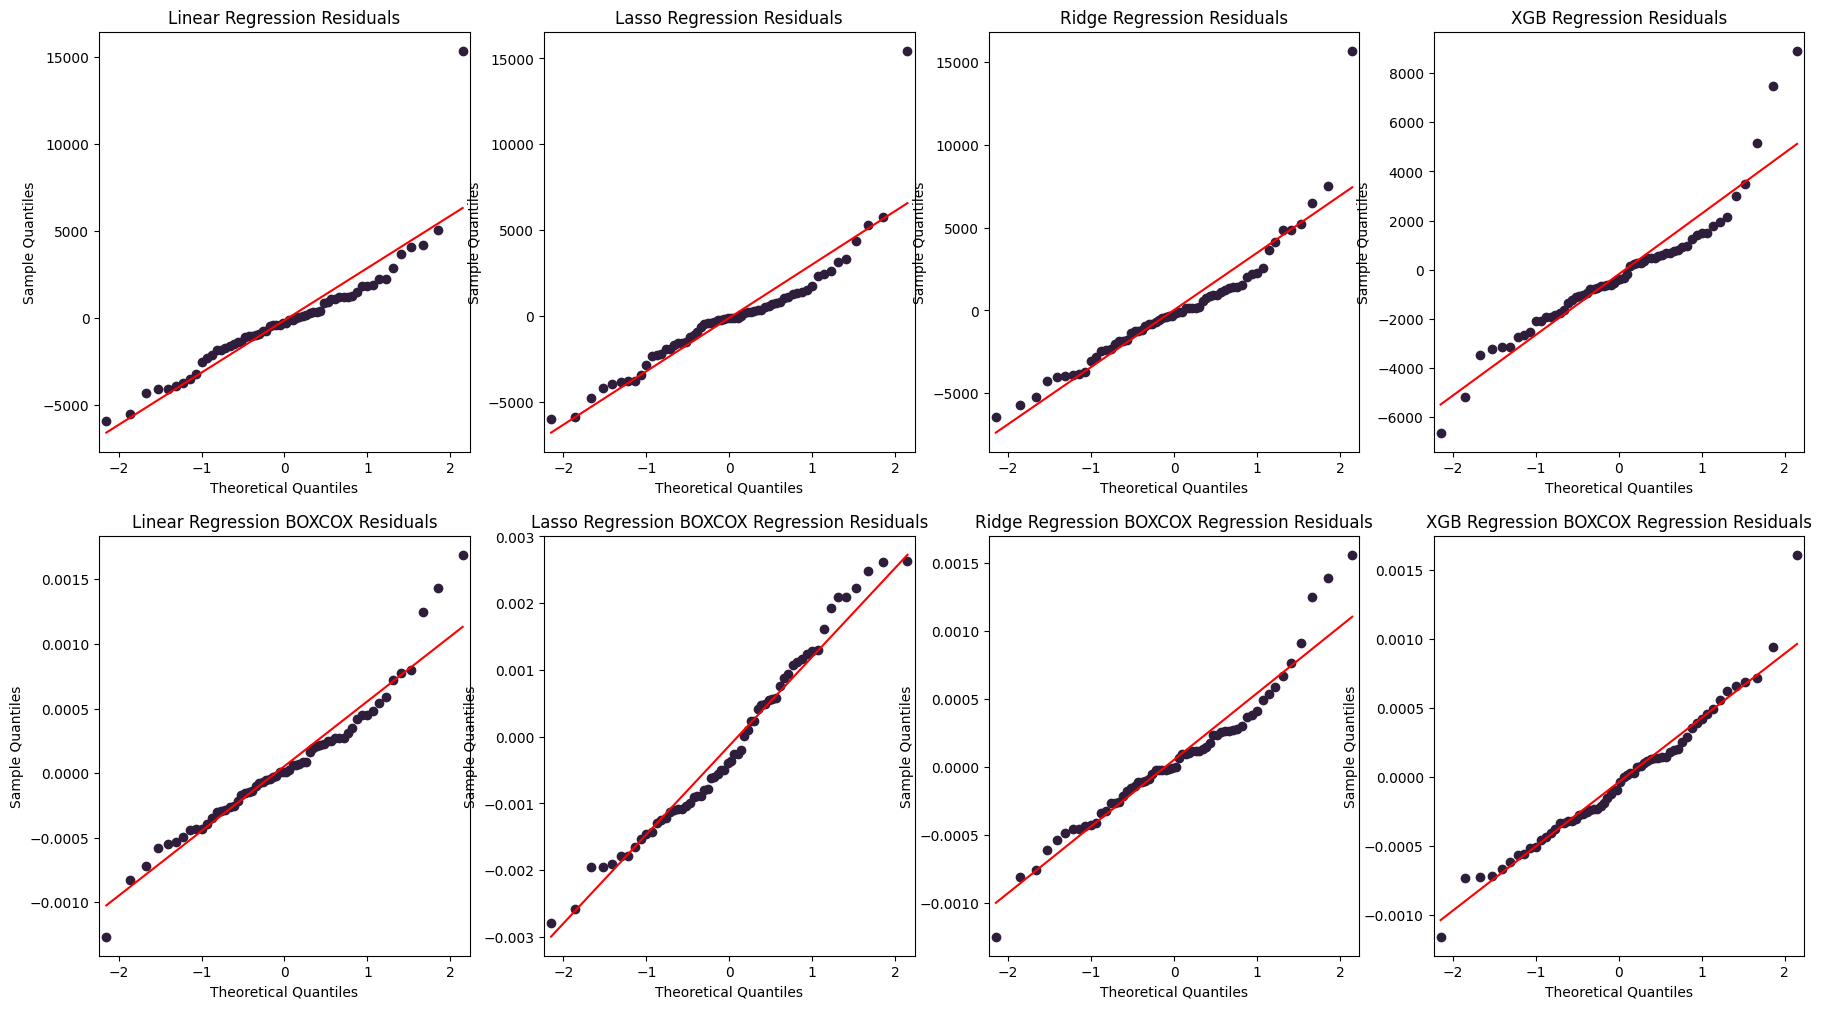

In [61]:
fig, axs = plt.subplots(2, 4, figsize=(22, 12))

#Linear Q-Q
sm.qqplot(residuals_lr, line='s', ax = axs[0,0])
axs[0, 0].set_title('Linear Regression Residuals')

#Lasso Q-Q
sm.qqplot(residuals_Lasso, line='s', ax=axs[0,1])
axs[0, 1].set_title('Lasso Regression Residuals')

#Ridge Q-Q
sm.qqplot(residual_Ridge, line='s', ax=axs[0,2])
axs[0, 2].set_title('Ridge Regression Residuals')

#XGB Q-Q
sm.qqplot(residuals_XGBoost, line='s', ax=axs[0,3])
axs[0, 3].set_title('XGB Regression Residuals')

# Linear BoxCOX Q-Q
sm.qqplot(residuals_LinearBoxcox, line='s', ax=axs[1,0])
axs[1, 0].set_title('Linear Regression BOXCOX Residuals')

#Lasso BoxCOX Q-Q
sm.qqplot(residual_Lasso_BOXCOX, line='s', ax=axs[1,1])
axs[1, 1].set_title('Lasso Regression BOXCOX Regression Residuals')

#Ridge BoxCOX Q-Q
sm.qqplot(residuals_Ridge_BOXCOX, line='s', ax=axs[1,2])
axs[1, 2].set_title('Ridge Regression BOXCOX Regression Residuals')

#XGB BoxCOX Q-Q
sm.qqplot(residuals_XGBoost_BOXCOX, line='s', ax=axs[1,3])
axs[1, 3].set_title('XGB Regression BOXCOX Regression Residuals')

plt.show()